**Deep Learning for Asset Prediction**<br>

# Table of Contents
1. [Introduction](#Introduction)
2. [Technical Information](#Technical-Information)
   - 2.1. [Import Libraries](#Import-Libraries)
     
4. [Techincal Indicators](#Technical-Indicators)
    - 3.1. [Momentum](#Momentum)
    - 3.2. [Exponential Moving Average (EMA)](#Exponential-Moving-Average-(EMA))
    - 3.3. [Logarithmic Return](#Logarithmic-Return)
    - 3.4. [Stochastic Functions](#Stochastic-Functions)
    - 3.5. [Relative Strength Index (RSI)](#Relative-Strength-Index-(RSI))
    - 3.6. [On-Balance Volume](#On-Balance-Volume)
    - 3.7. [Commodity Channel Index (CCI)](#Commodity-Channel-Index-(CCI))    
    - 3.8. [Average True Range (ATR)](#Average-True-Range-(ATR))
    - 3.9. [Trading Envelopes](#Trading-Envelopes)
    - 3.10. [Bollinger Bands](#Bollinger-Bands)
    - 3.11. [Additional Data](#Additional-Data)
    - 3.12. [Fama & French Three Factor Model Data](#Fama-&-French-Three-Factor-Model-Data)
    - 3.13. [Financial Data](#Financial-Data)
5. [Pre-Processing](#Pre-Processing)
6. [Exploritary Data Analysis (EDA)](#Exploritary-Data-Analysis-(EDA))
    - 5.1. [Correlation Analysis](#Correlation-Analysis)
    - 5.2. [Scatter Plot Analysis](#Scatter-Plot-Analysis)
7. [Dimensional Reduction Methods](#Self-Organizing-Maps-(SOM))
    - 6.1. [Self-Organizing Maps (SOM)](#Self-Organizing-Maps-(SOM))
    - 6.2. [Uniform Manifold Approximation and Projection (UMAP)](#Uniform-Manifold-Approximation-and-Projection-(UMAP))
    - 6.3. [K-Means Clustering](#K-Means-Clustering)
8. [Modelling](#Long-Short-Term-Memory-Models)
    - 7.1. [Long Short-Term Memory Models](#Long-Short-Term-Memory-Models)
    - 7.2. [Prepare the Data with Dimensionality Reduction](#Prepare-the-Data-with-Dimensionality-Reduction)
    - 7.3. [Train the Models with Dimensionality-Reduced Data](#Train-the-Models-with-Dimensionality-Reduced-Data)
    - 7.4. [Base Models](#Base-Models)
    - 7.5. [Hyperparameter Tuning: Random Search](#Hyperparameter-Tuning:-Random-Search)
    - 7.6. [Hyperparameter Tuning: Hyperband](#Hyperparameter-Tuning:-Hyperband)
    - 7.7. [Hyperparameter Tuning: Bayesian Optimization](#Hyperparameter-Tuning:-Bayesian-Optimization)
9. [Final Evaluation](#Final-Evaluation:-Base-&-Tuned-Comparison)
    - 8.1. [Base & Tuned Comparison](#Final-Evaluation:-Base-&-Tuned-Comparison)
    - 8.2. [Tensorboard](#Tensorboard)
    - 8.3. [Performance Classifiers](#Performance-Classifiers)
    - 8.4. [Backtest](#Backtest)
10. [Conclusion](#Conclusion)
11. [References](#References)

# Introduction

Deep learning for asset predictions has become a popular trend among the financial industry. In this project, the objective is to create a Long Short Term Memory Network (Or LSTM model for short) to predict upward price movements. We limit the prediction to be a binomial classification problem where we utilize a dependent variable labeled as [0,1] as the classes. Given the complexity around deep learning, the paper is organized in a structured manner in which information can be added or subtracted for future use cases.

 The asset of choice for price prediction is Coca Cola which utilized Yahoo Finance to pull historical information such as open, high, lose, close price and volume. After, relevant technical indicators which are common such as momentum, exponential moving average, on-balance volume and more are created to further help in the forecasting of the securities future movement. These indicators are common ones found on the Bloomberg terminal and are constructed based on Bloomberg’s definition on them. While technicals are helpful: VIX, Fama and French, CDS spreads, implied option volatility, dividend yield and financial ratios of Coca Cola historical are curated and used as well. Many of these valuations can be found in the csv ‘KO Financial Data’ which has been cleaned and verified beforehand. As more advanced information such as CDS spreads was needed, Yahoo Finance and Bloomberg API in combination are used.
  
Once data has been carefully selected and validated for the time series information, capturing different lookback periods is a must. To do this, the technical indicators are made as definition functions which allow us to create a range of period dates (1, 10, 50, 200, etc). It’s important that for the model we do not use too many or little for the total dataset on features used. For this reason, 483 features were an intentional amount for research done in the paper. Inspection of data behavior is critical at every step through the model building process. As generation across periods resulted in NaN values, a three-step data cleaning approach was taken to ensure the model was fed proper information. Additionally, exploratory data analysis (EDA) was used to further help in understanding the relationships between features and underlying structures.
 
There are many different ways to reduce a dataset, but before choosing feature reduction methodologies, understanding the data relationship is a must. Techniques such as multi-collinearity and multi-scatter plotting are presented and analyzed to better determine the type of dimensional reduction implementation should be taken. After, three different methods are evaluated such as: Self Organizing Maps (SOM), Uniform Manifold Approximation and Projection (UMAP), and K-Means Clustering. Once visualized and completed, we start on the creation of the LSTM models.

As a design choice, we created two different LSTM architectures and compare to a base model. The construction of these models was done after exhaustive research and are planned such that hyperparameter optimization can be done in an easy manner. Finally, when the optimal architecture is found based on the highest accuracy and lowest loss: Tensorboard, performance classifiers and a backtest is used to determine the consistency and overall performance of the best model.

# Technical Information

In this document, we outline the libraries and hardware used for the assignment. The project involved data manipulation, visualization, dimensionality reduction and modelling to determine stock price upward predictions. Below is a summary of the packages, additional files and hardware specifications used throughout the paper. This assignment was designed and created in Jupyter Notebook using Python 3.12.4. Below is a summary what was used:

**Data Manipulation:**

-	**Numpy:** Implemented for calculations and pre-processing tasks which are critical for the LSTM Model.
  
-	**Pandas:** Used for manipulation of data ensuring information was properly handled, cleaned and maintained. 
  
**Data Visualization:**

-	**Matplotlib:** Utilized for static graphs and plots to understand the relationship and behavior of the dataset.
  
-	**Seaborn:** An additional library using Matplotlib for more granular information such as a correlation matrix.
  
**Dimensional Reduction:**

-	**Minison (Self Organized Maps):** The first dimensional reduction technique used for lowering the amount of features in the dataset.
  
-	**Umap (Uniform Manifold Approximation and Projection):** The second dimensional reduction technique used which preserves the underlying structure of the dataset. 
  
-	**Kmeans and kneed (K-Means Clustering):** The third dimensional reduction method used in the paper for partitioning data and finding the optimial amount of clusters.
  
**Modeling:**

-	**Sklearn (Scikit-learn):** This is a standard package for data science used for modelling.
  
-	**Tensorflow:** Used for deep learning and further implements Keras functionality for training the neural networks on the LSTM model. 
  
-	**Tensorboard:** Implemented for understanding the structure, performance and behavior of the underlying model. 
  
-	**Pyfolio-Reloaded:** Applied for backtesting to understand the trading performance of the best LSTM model found.

**Additional Files Required:**

To successfully run the code, the following csv files are necessary:

- **Fama and French.csv:** The file has Fama and French data used for additional information to help stock predictions. The data is from dartmouth.edu.
- **KO Financial Data.csv:** Includes Coca Cola fundamentals, CDS spread, fundamental analytics, option implied volatility, and dividend yield. The data is from Bloomberg API.
- **Logs:** While not required to run the code independently, you can find additional files containing my logs for 'bayesian', 'Hyperband', 'random_search','logs' and 'best_model.5' which was obtained during my run process.
  
**Hardware Specifications:**


-	**Device:** Microsoft Windows, 2019 Surface Pro 7
  
-	**Processor:** Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz   1.50 GHz
  
-	**Ram:** 16.0 GB

# Import Libraries

First, we import critical libraries such as numpy and pandas which will be used throughout the paper. In addition, we import warnings which will be used to hide additional details from the outputs to clean up the analysis.

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Using Yahoo Finance, we download Coca Cola prices from 2010-01-04 to 2024-05-31. It's important to note these dates also match the csv import file 'KO Financial Data' which will be used later on in the paper to bring in additional data from Bloomberg API.

In [5]:
import yfinance as yf
start_date = '2010-01-04'
end_date = '2024-05-31'
df = yf.download("KO", start=start_date, 
                 end=end_date, period='1d') 
df

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  28.580000  28.610001  28.450001  28.520000  18.209932  13870400
2010-01-05  28.424999  28.495001  28.070000  28.174999  17.989656  23172400
2010-01-06  28.174999  28.219999  27.990000  28.165001  17.983265  19264600
2010-01-07  28.165001  28.184999  27.875000  28.094999  17.938576  13234600
2010-01-08  27.730000  27.820000  27.375000  27.575001  17.606556  28712400
...               ...        ...        ...        ...        ...       ...
2024-05-23  62.490002  62.880001  62.049999  62.090000  61.611931   9834300
2024-05-24  62.220001  62.419998  61.970001  62.000000  61.522625   8200700
2024-05-28  61.790001  62.130001  61.400002  61.820000  61.344009  12347000
2024-05-29  61.470001  61.880001  61.070000  61.700001  61.224934  11861800
2024-05-30  61.849998  62.080002  61.599998  61.970001  61.492855   9436800

[3626 rows x 6 columns]

# Technical Indicators

Now that the data has been imported for Coca Cola (KO), we create and document 10 technical indicators. Each one is created as a function which is well documented and will later be used for various periods:

- Momentum
- Exponential Moving Average (EMA)
- Logarithmic Return
- Stochastic Functions
- Relative Strength Index (RSI)
- On-Balance Volume
- Commodity Channel Index (CCI)
- Average True Range (ATR)
- Trading Envelopes
- Bollinger Bands


# Momentum

We define momentum as the difference between a price at time 't' and time 't-n'. Our period (n) is the look back where we have the function defaulting at '1'. From a workflow perspective, you can derive meaning of this metric when you compare it to another such as a simple moving average. A buy signal is typically indicated when the momentum line corsses above the moving average and likewise, a sell signal is created when the momentum crosses below the moving average.

In [7]:
def momentum(data: pd.DataFrame, out_series_name: str, input_col: str, period: int = 1, data_frame: bool = False):
    """
    Calculates the difference between a value at time 't' and a value at time 't-n' where 'n' is our period.
    
    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        input_col [str]: Name of the column to operate our calculations on.
        period [int, optional]: Look back period where we have the default set to 1.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.
    
    Returns:
        If data_frame is set to ‘False’, returns computed values for our momentum indicator. 
        If data_frame is set to ‘True’, returns the original data with an added column.. 
    """
    
    mom = data[input_col].diff(period)
    out_col_name = f'mom_{out_series_name}_{period}'
    
    if data_frame:
        return data.assign(**{out_col_name: mom})
    else:
        return mom.rename(out_col_name)

# Exponential Moving Average (EMA)

The exponential moving average (EMA) is a moving average which has weights on the most recent data points. This means that when comparing to simple moving average (SMA), we will have a faster response to price changes. The calculations for EMA can be seen below:

\begin{equation}
EMA_t(p) = \alpha \cdot p_t + (1 - \alpha) \cdot EMA_{t-1}
\end{equation}

where the degree of decreasing weighting $\alpha$ can be defined as:

\begin{equation}
\alpha = \frac{2}{n+1}
\end{equation}

In [9]:
def ema(data: pd.DataFrame, out_series_name: str, input_col: str, period: int = 21, data_frame: bool = False):
    """
    Over a defined period, we compute the values for Exponential Moving Average (EMA). Our version of EMA is
    coded based off the defined formula:
    
    EMA_t = α * p_t + (1 - α) * EMA_{t-1}
    where α = 2 / (period + 1)

    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        input_col [str]: Name of the column to operate our calculations on.
        period [int, optional]: Number of days for EMA where the default is set to 21.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.

    Returns:
        If data_frame is set to ‘False’, returns computed values for our momentum indicator. 
        If data_frame is set to ‘True’, returns the original data with an added column..
    """
    alpha = 2 / (period + 1)
    prices = data[input_col]
    
    ema = pd.Series(index=prices.index, dtype=float)
    ema.iloc[:period] = np.nan
    ema.iloc[period] = prices.iloc[:period+1].mean()
    
    for i in range(period + 1, len(prices)):
        ema.iloc[i] = alpha * prices.iloc[i] + (1 - alpha) * ema.iloc[i-1]
    
    out_col_name = f'ema_{out_series_name}_{period}'
    
    if data_frame:
        return data.assign(**{out_col_name: ema})
    else:
        return ema.rename(out_col_name)

# Logarithmic Return

The logarithmic return computes the logarithmic differences between a price at time 't' and time 't-n'. Our period (n) is the look back where we have the function defaulting at '1'. The purpose of our indicator is to help analyze the proportional differences between our various points in time.

In [11]:
def log_ret(data: pd.DataFrame, out_series_name: str, input_col: str, period: int = 1, data_frame: bool = False):
    """
    Calculates the logarithmic difference between a value at time 't' and a value at time 't-n' where 'n' 
    is our lookback period.
    
    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        input_col [str]: Name of the column to operate our calculations on.
        period [int, optional]: Look back period where we have the default set to 1.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.
    
    Returns:
        If data_frame is set to ‘False’, returns computed values for our momentum indicator. 
        If data_frame is set to ‘True’, returns the original data with an added column.. 
    """
    
    log_ret = np.log(data[input_col] / data[input_col].shift(period))
    out_col_name = f'log_ret_{out_series_name}_{period}'
    
    if data_frame:
        return data.assign(**{out_col_name: log_ret})
    else:
        return log_ret.rename(out_col_name)

# Stochastic Functions

The Stochastic Function is a measurement for the velocity of our securities' price movement. Our indicator helps to measure if a stock's price has been overbought or oversold by measuring the current price relative to its highs and lows over time. We can define our function by the following formulas:

$$
\%K = 100 \times \frac{\text{Closing Range}}{\text{Total Range}}
$$

where:

$$
\text{Closing Range} = \text{Close} - \text{Range Minimum}
$$

$$
\text{Total Range} = \text{Range Maximum} - \text{Range Minimum}
$$

The extent of the Range is determined by the \%K period parameter.

$$
\%D = \text{N-period moving average of } \%K
$$

where $N$ is the \%D period parameter.

Within Stochastics, we can further define them as ‘Fast Stochastic’ and ‘Slow Stochastics’. These additional studies have further calculations and parameters such as the type of moving average used. They default to ‘Smoothed Moving Average’ compared to Stochastic indicator using ‘Simple Moving Average’. Further, ‘Fast’ and ‘Slow’ functions also include ‘Ratio of Moving Average’ which is used instead of ‘Moving Average of the Ratio’. As the 3 stochastics will have similarities between each of them, it’s a design choice to use slow stochastic for this paper given it'll help further the smoothing of our values. The additional calculations required are:

**Algorithm 1: Moving Average of the Ratio**

$$
\text{Slow } \%K = \text{Moving Average} \left( \frac{\text{Closing Range}}{\text{Total Range}} \right)
$$

**Algorithm 2: Ratio of Moving Averages**

$$
\text{Slow } \%K = \frac{\text{Moving Average} (\text{Closing Range})}{\text{Moving Average} (\text{Total Range})}
$$

$$
\text{Slow } \%D = \text{Moving Average} (\text{Slow } \%K)
$$

where:

$$
\text{Closing Range} = \text{Close} - \text{Range Minimum}
$$

$$
\text{Total Range} = \text{Range Maximum} - \text{Range Minimum}
$$


In [13]:
def slow_stochastic(data: pd.DataFrame, out_series_name: str, high_col: str = 'High', low_col: str = 'Low', 
                    close_col: str = 'Adj Close', k_period: int = 14, d_period: int = 3, 
                    ds_period: int = 3, sma_type: str = 'SMA', data_frame: bool = False):
    """
    Computes the Slow Stochastic K and D indicators.

    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        high_col [str, optional]: Column containing high prices which defaults to using ‘High’.
        low_col [str, optional]: Column containing low prices which defaults to using ‘low’.
        close_col [str, optional]: Column containing close prices which defaults to using ‘Adj Close'.
        k_period [int, optional]: Number of days for Slow Stochastic K calculation which will default to 14.
        d_period [int, optional]: Number of days for Slow Stochastic D calculation which will default to 3.
        ds_period [int, optional]: Number of days for additional smoothing of Slow Stochastic D which will default to 3.
        sma_type [str, optional]: Types of moving averages allowing 'SMA' or 'EMA' which will default to 'SMA'.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.

    Returns:
        If data_frame is set to ‘False’, returns computed values for our Slow Stochastic K and D values. 
        If data_frame is set to ‘True’, returns the original data with an added column..
    """
    
    low_min = data[low_col].rolling(window=k_period).min()
    high_max = data[high_col].rolling(window=k_period).max()
    k_fast = 100 * (data[close_col] - low_min) / (high_max - low_min)
    
    if sma_type == 'EMA':
        k_slow = k_fast.ewm(span=d_period, adjust=False).mean()
        d_slow = k_slow.ewm(span=ds_period, adjust=False).mean()
    else:
        k_slow = k_fast.rolling(window=d_period).mean()
        d_slow = k_slow.rolling(window=ds_period).mean()
    
    k_col_name = f'slow_s_k_{out_series_name}_{k_period}'
    d_col_name = f'slow_s_d_{out_series_name}_{d_period}_{ds_period}'
    
    if data_frame:
        return data.assign(**{k_col_name: k_slow, d_col_name: d_slow})
    else:
        return pd.DataFrame({k_col_name: k_slow, d_col_name: d_slow})

# Relative Strength Index (RSI)

The Relative Strength Index (RSI) measures our speed and change of price. It’s a momentum-based oscillator which uses equal weights from the Weighted Moving Average (WMA) in order to have a smoothening impact on our gains and losses. Equivalently, to Exponential Moving Average (EMA) we use $\alpha = \frac{1}{n}$. From a trading perspective, RSI is a good way for recognizing potential on entry and exit decisions. Typically, a buy signal is indicated when RSI crosses 30 from below as it shows that the stock has been oversold. Likewise, as an RSI value greater than 70 indicates an overbought condition, a sell signal is shown when RSI crosses 70 from above. 

$$
RSI = 100 - \left( \frac{100}{1 + \frac{\text{Avg Up}}{\text{Avg Down}}} \right)
$$

where:

$$
\text{Avg Up} = \frac{\sum \text{Up Closes}}{n}
$$

$$
\text{Avg Down} = \frac{\sum \text{Down Closes}}{n}
$$

In [15]:
def wwma(values: pd.Series, n: int):
    """
    Using the same weighting as Exponential Moving Average (EMA) with alpha = 1/n,
    we calculate Weighted Moving Average (WMA) which has equal weights.
    
    Parameters:
        values [pd.Series]: A series to get our Weighted Moving Average.
        n [int]: Weighted Moving Average period.
    
    Returns:
        A series of values for Weighted Moving Average.
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def rsi(data: pd.DataFrame, out_series_name: str, period: int = 14, input_col: str = 'Adj Close', data_frame: bool = False):
    """
    Computes Relative Strength Index (RSI).

    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        input_col [str]: Name of the column to operate our calculations on where the default is 'Adj Close'.
        period [int, optional]: Number of days for RSI where the default is set to 14.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.

    Returns:
        If data_frame is set to ‘False’, returns computed values for our momentum indicator. 
        If data_frame is set to ‘True’, returns the original data with an added column..
    """
    close_price = data[input_col]
    
    # Compute price changes
    delta = close_price.diff()

    # Separate gains (up) and losses (down)
    gains = delta.where(delta > 0, 0.0)
    losses = -delta.where(delta < 0, 0.0)

    # Compute smoothed moving averages
    avg_gains = wwma(gains, period)
    avg_losses = wwma(losses, period)

    # Compute RS and RSI
    rs = avg_gains / avg_losses
    rsi = 100 - (100 / (1 + rs))

    out_col_name = f'rsi_{out_series_name}_{period}'
    
    if data_frame:
        return data.assign(**{out_col_name: rsi})
    else:
        return rsi.rename(out_col_name)

# On-Balance Volume

On-Balance Volume (OBV) is a different indicator than the previous where instead of finding trends through price directions, it’s a momentum indicator that uses price and volume. We accumulate volume given the direction of changes in the price, such that we add up volume to OBV when the closing price is greater than the previous closing price. Likewise, when the current closing price is lower than the previous, we subtract creating down volume. If the current closing price and previous are the same, OBV remains the same as well. We can use OBV by observing potential shift in market sentiment given divergences between price and volume. 

The formula for our volume based indicator can be calculated as:

$$
\text{OBV}_t =
\begin{cases} 
\text{OBV}_{t-1} + \text{Volume}_t & \text{if Close}_t > \text{Close}_{t-1} \\
\text{OBV}_{t-1} - \text{Volume}_t & \text{if Close}_t < \text{Close}_{t-1} \\
\text{OBV}_{t-1} & \text{if Close}_t = \text{Close}_{t-1}
\end{cases}
$$


In [17]:
def on_balance_volume(data: pd.DataFrame, out_series_name: str, 
                      close_col: str = 'Adj Close', volume_col: str = 'Volume', 
                      data_frame: bool = False):
    """
    Calculates On-Balance Volume (OBV) using close prices and volume.

    The OBV is calculated as:
    - If the current close > previous close, then OBV = previous OBV + current volume
    - If the current close < previous close, then OBV = previous OBV - current volume
    - If the current close = previous close, then OBV = previous OBV

    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        close_col [str, optional]: Column containing close prices which defaults to using ‘Adj Close’.
        volume_col [str, optional]: Column containing volume prices which defaults to using ‘Volume’.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.

    Returns:
        If data_frame is set to ‘False’, returns computed values for our OBV values. 
        If data_frame is set to ‘True’, returns the original data with an added column..
    """
    
    obv = [0]
    for i in range(1, len(data)):
        if data[close_col][i] > data[close_col][i - 1]:
            obv.append(obv[-1] + data[volume_col][i])
        elif data[close_col][i] < data[close_col][i - 1]:
            obv.append(obv[-1] - data[volume_col][i])
        else:
            obv.append(obv[-1])
    
    obv = pd.Series(obv, index=data.index, name=f'OBV_{out_series_name}')
    
    if data_frame:
        return data.assign(**{obv.name: obv})
    else:
        return obv

# Commodity Channel Index (CCI)

The Commodity Channel Index (CCI) calculates the price variation of a security to its mean value. We can use this indicator to measure if a stock was overbought or oversold. From a workflow perspective, if CCI cross -100 from below, it signals a buy condition but would signal sell if crossing 100 from above. The formula can be defined as: 
$$ \text{CCI} = \frac{(HLC3 - \text{SMA}_{N} (HLC3))}{0.015 \times \text{Mean Deviation}_{N} (HLC3)} $$

where:

$$ HLC3 = \frac{\text{High} + \text{Low} + \text{Close}}{3} $$

$$ \text{SMA}_{N} (HLC3) = \text{Simple Moving Average of } HLC3 \text{ over } N \text{ periods} $$

$$ \text{Mean Deviation}_{N} (HLC3) = \text{Mean Absolute Deviation of } HLC3 \text{ over } N \text{ periods} $$


In [19]:
def cci(data: pd.DataFrame, out_series_name: str, period: int = 10, 
        close_col: str = 'Adj Close', high_col: str = 'High', low_col: str = 'Low', 
        data_frame: bool = False):
    """
    Computes Commodity Channel Index (CCI).

    The formula used is:
    CCI = (TP - SMA(TP)) / (0.015 * MAD)

    Where:
    TP (Typical Price) = (High + Low + Close) / 3
    SMA(TP) = Simple Moving Average of TP over the period
    MAD = Mean Absolute Deviation of TP over the period

    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        period [int, optional]: Number of periods for our calculation which will default to 10.
        close_col [str, optional]: Column containing close prices which defaults to using ‘Adj Close’.
        high_col [str, optional]: Column containing high prices which defaults to using ‘High’.
        low_col [str, optional]: Column containing low prices which defaults to using ‘Low’.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.

    Returns:
        If data_frame is set to ‘False’, returns computed values for our CCI values. 
        If data_frame is set to ‘True’, returns the original data with an added column..
    """

    
    # Compute typical price
    tp = (data[high_col] + data[low_col] + data[close_col]) / 3
    
    # Compute SMA of typical price
    sma_tp = tp.rolling(window=period).mean()
    
    # Compute Mean Absolute Deviation
    mad = tp.rolling(window=period).apply(lambda x: np.abs(x - x.mean()).mean(), raw=True)
    
    # Compute CCI
    cci = (tp - sma_tp) / (0.015 * mad)
    
    out_col_name = f'CCI_{out_series_name}_{period}'
    
    if data_frame:
        return data.assign(**{out_col_name: cci})
    else:
        return cci.rename(out_col_name)

# Average True Range (ATR)

The Average True Range (ATR) is a volatility indicator. Unlike others defined before which provided insight into price direction, ATR gives price volatility. Computationally, we take the high and low prices in our true range (TR) and calculate it as an exponential moving average using our function ‘wwma’. 
The True Range (TR) is calculated as follows:

$$
\text{TR} = \max(\text{High} - \text{Low}, |\text{High} - \text{Previous Close}|, |\text{Low} - \text{Previous Close}|)
$$

The Average True Range (ATR) is calculated as the Weighted Moving Average (WMA) of the True Range over a specific period:

$$
\text{ATR} = \text{WMA}(\text{TR}, \text{period})
$$

where the Weighted Moving Average (WMA) is the same as the Exponential Moving Average (EMA) with $\alpha = \frac{1}{\text{period}}$.


In [21]:
def wwma(values: pd.Series, n: int):
    """
    Using the same weighting as Exponential Moving Average (EMA) with alpha = 1/n,
    we calculate Weighted Moving Average (WMA) which has equal weights.
    
    Parameters:
        values [pd.Series]: A series to get our Weighted Moving Average.
        n [int]: Weighted Moving Average period.
    
    Returns:
        A series of values for Weighted Moving Average.
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr(data: pd.DataFrame, out_series_name: str, period: int = 14,
        close_col: str = 'Adj Close', high_col: str = 'High', low_col: str = 'Low',
        data_frame: bool = False):
    """
    Computes Average True Range (ATR) over a given period using close, high, and low prices.

    The formula used is:
    TR = max(high - low, |high - previous close|, |low - previous close|)
    ATR = WMA(TR, period)

    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        period [int, optional]: Number of periods for our calculation which will default to 14.
        close_col [str, optional]: Column containing close prices which defaults to using ‘Adj Close’.
        high_col [str, optional]: Column containing high prices which defaults to using ‘High’.
        low_col [str, optional]: Column containing low prices which defaults to using ‘Low’.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.

    Returns:
        If data_frame is set to ‘False’, returns computed values for our ATR values. 
        If data_frame is set to ‘True’, returns the original data with an added column..
    """
    
    # Compute True Range
    tr1 = data[high_col] - data[low_col]
    tr2 = np.abs(data[high_col] - data[close_col].shift())
    tr3 = np.abs(data[low_col] - data[close_col].shift())
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    
    # Compute ATR
    atr = wwma(tr, period)
    
    out_col_name = f'atr_{out_series_name}_{period}'
    
    if data_frame:
        return data.assign(**{out_col_name: atr})
    else:
        return atr.rename(out_col_name)

# Trading Envelopes

We use Trading Envelopes to signal possible buy and sell signals from the volatility of our price. The calculations for these envelopes are based on the Simple Moving Average (SMA) and the Standard Deviation (STD) of the price. We derive the formula for the upper band (TE UB) by adding the factor of the difference from the standard deviation and the SMA to the SMA itself. On the other side, for the lower band (TE LB), we subtract the same factor of the difference from the SMA. From a trading perspective, the envelopes help in understanding when there’s instability and extremism in price levels.

The formulas for the Trading Envelopes are:

Upper Band (TE UB):
$$
\text{TE UB} = \text{SMA} + (\text{UB Factor} \times (\text{STD}(\text{price}) - \text{SMA}))
$$

Lower Band (TE LB):
$$
\text{TE LB} = \text{SMA} - (\text{LB Factor} \times (\text{STD}(\text{price}) - \text{SMA}))
$$

where:
- $\text{SMA}$ is the Simple Moving Average of the price over the specified period.
- $\text{STD}(\text{price})$ is the standard deviation of the price over the specified period.
- $\text{UB Factor}$ is the factor used to calculate the upper band.
- $\text{LB Factor}$ is the factor used to calculate the lower band.


In [23]:
def trading_envelopes(data: pd.DataFrame, out_series_name: str, input_col: str = 'Adj Close', 
                      period: int = 20, ub_factor: float = 2.0, lb_factor: float = 2.0, 
                      data_frame: bool = False):
    """
    Computes Trading Envelopes.

    The formulas used are:
    TE UB = SMA + (UB Factor * (STD(price) - SMA))
    TE LB = SMA - (LB Factor * (STD(price) - SMA))

    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        input_col [str, optional]: Column containing close prices which defaults to using ‘Adj Close’.
        period [int, optional]: Number of periods for our calculation which default to using 20.
        ub_factor [float, optional]: Factor for the upper band which defaults to using 2.0.
        lb_factor [float, optional]: Factor for the lower band which defaults to using 2.0.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.

    Returns:
        If data_frame is set to ‘False’, returns computed values for our Upper and Lower Bands. 
        If data_frame is set to ‘True’, returns the original data with an added column..
    """
    
    price = data[input_col]
    sma = price.rolling(window=period).mean()
    std = price.rolling(window=period).std()

    upper_band = sma + ub_factor * (std - sma)
    lower_band = sma - lb_factor * (std - sma)

    upper_col_name = f'TE_UB_{out_series_name}_{period}'
    lower_col_name = f'TE_LB_{out_series_name}_{period}'

    if data_frame:
        return data.assign(**{
            upper_col_name: upper_band,
            lower_col_name: lower_band
        })
    else:
        return (upper_band.rename(upper_col_name), lower_band.rename(lower_col_name))

# Bollinger Bands

Finally, bollinger bands are another indicator which instead of measuring price direction, it provides investors insight into price volatility by defining ‘bands’ calculated on the standard deviation of our Simple Moving Average (SMA). We’re able to identify periods of higher and lower volatility by plotting our bands above and below the moving average at specified standard deviations. The bands become more narrow during times of less volatility and likewise, become wider when volatility increases. Our indicator requires us to have two additional parameters. One parameter is the period to calculate the Simpe Moving Average (SMA) and the other is for the number of standard deviations in order to know the width of our bands.
The Upper Bollinger Band (UBB) and Lower Bollinger Band (LBB) are calculated as follows:

$$
\text{Upper Band (UBB)} = \text{SMA}(\text{Price}, N) + \text{UB Factor} \times \text{StdDeviation}(\text{Price}, N)
$$

$$
\text{Lower Band (LBB)} = \text{SMA}(\text{Price}, N) - \text{LB Factor} \times \text{StdDeviation}(\text{Price}, N)
$$

The Middle Band (BollMA) is the Simple Moving Average (SMA) of the Price over \(N\) periods:

$$
\text{Middle Band (BollMA)} = \text{SMA}(\text{Price}, N)
$$

The Bandwidth (BollW) is calculated as:

$$
\text{Bandwidth (BollW)} = 100 \times \left( \frac{\text{UBB} - \text{LBB}}{\text{BollMA}} \right)
$$

The %B is calculated as:

$$
\%B = \left( \frac{\text{Price} - \text{LBB}}{\text{UBB} - \text{LBB}} \right)
$$

where:
- $\text{Price}$ is typically the closing price.
- $\text{N}$ is the number of periods for the SMA.
- $\text{UB Factor}$ and $\text{LB Factor}$ are the number of standard deviations, typically set to 2.


In [25]:
def bollinger_bands(data: pd.DataFrame, out_series_name: str, input_col: str = 'Adj Close', 
                    period: int = 20, num_of_std: int = 2, 
                    data_frame: bool = False):
    """
    Computes Bollinger Bands over a given period.

    The formulas used are:
    Middle Band = SMA(price, period)
    Upper Band = Middle Band + (num_of_std * Standard Deviation(price, period))
    Lower Band = Middle Band - (num_of_std * Standard Deviation(price, period))

    Parameters:
        data [pd.DataFrame]: Contains our time-series.
        out_series_name [str]: Designated name of the output for our series.
        input_col [str, optional]: Column containing close prices which defaults to using ‘Adj Close’.
        period [int, optional]: Number of periods for our calculation which default to using 20.
        num_of_std [int, optional]: Number of standard deviations for band width which defaults to using 2.
        data_frame [bool, optional]: Defines the output format where we have the default set to False.

    Returns:
        If data_frame is set to ‘False’, returns computed values for our Upper and Lower Bands. 
        If data_frame is set to ‘True’, returns the original data with an added column..

    """
    
    price = data[input_col]
    rolling_mean = price.rolling(window=period).mean()
    rolling_std = price.rolling(window=period).std()

    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)

    upper_col_name = f'upper_BB_{out_series_name}_{period}'
    lower_col_name = f'lower_BB_{out_series_name}_{period}'

    if data_frame:
        return data.assign(**{
            upper_col_name: upper_band,
            lower_col_name: lower_band
        })
    else:
        return (upper_band.rename(upper_col_name), lower_band.rename(lower_col_name))

# Additional Data

While techincial indicators and stocks historical prices are a good start to feeding information into a model, we work on adding additional information such as Fama and French data, Financial Ratios, VIX and more. We use a combination of resources for this. Yahoo finance is utalized to pull VIX information; Bloomberg API provides CDS spread, Option Implied Volatility, Financial Ratios and Dividend Yield; dartmouth.edu provides Fama & French data set.

# Fama & French Three Factor Model Data

Fama and French Three-Factor model data is an additive to Capital Asset Pricing Model (CAPM) by including a few factors to help provide additional insight into stock returns. The factors included are:

- Market Risk Premium (Mkt-RF) which is the excess return of the market over the risk free rate (RF)

- Small Minus Big (SMB) which is the size factor and shows the difference between returns for small cap and large cap stocks.

- High Minus Low (HML) which is our value factor that shows the difference between returns for high book to market stocks and low book to market stocks.

The data we're using for Fama and French can be found available on Kenneth French's website and is widely used across academic research papers and financial analysis for portfolio performance. The csv used will be named 'Fama and French.csv'.

# Financial Data

To better understand any company, it's important to have not only technical indicators, but financial ones as well. Using Bloomberg data, we are leveraging their API in order to pull the following ratio's:

- Enterprise Value to EBITDA
- Price to Cashflow
- Price to Sales
- Price to Earnings
- Price to EBITDA

By using these 5 ratios, we should have a better understanding of financial direction the company may go towards. 

In addition to these ratios, I've also added Coca Cola's dividiend yield, historical 5 year implied CDS spread along with the implied volatility on a 3 month call option. These data points are provided by Bloomberg API and will be found in 'KO Financial Data' csv file. Lastly to gather additional data on volatility, we will call VIX Index information. The reason we use VIX data is so we can track the expected volatility of the S&P 500.

To ensure the dataset is robust, I verified that all dates are aligned with one another. This means we will not have NaN values or misalignment which would be inappropriate to put into our model. In addition, the dates in our CSV also align to the data used in Yahoo Finance ensuring uniformity.

In [27]:
# Upload KO Financial data and process ratios
KO_Financials = pd.read_csv('KO Financial Data.csv', parse_dates=['Date'], index_col='Date')

# Upload Fama & French data
Famma_French = pd.read_csv('Fama and French.csv', parse_dates=['Date'], index_col='Date')

# VIX Index Data and Implied Volatility Extraction
VIX = yf.download("^VIX", start=start_date, 
                  end=end_date, period = '1d')
df['VIX'] = VIX['Adj Close']

[*********************100%%**********************]  1 of 1 completed


Now that we have our data, we need to aggregate it into a single pandas DataFrame. As time was spent on the csv files in order to thoroughly organize the information, we can use pandas concatenation in order to combine multiple DataFrames for unification. using "join='inner'", we take all features and merge them into a singular list on the 'Date' column. 

In [29]:
# Combine Yahoo Finance, KO Financial data, and Famma & French data
df = pd.concat([df, KO_Financials, Famma_French], axis=1, join='inner')

Now that we've merged our data set, we can start working on generating a list of features.  Using all features previously created, we generate various periods to get these features across different levels. Given the variety created, we will be able to get further insight into predictive capabilities than using a singular period. In order to be tactical about the design of range, we will manually generate this range over a short, median and longer range up to one year's worth for the lag. This is so we can capture a wide range of valuations which can later be filtered out if deemed redunant. First, we look at generating these valuations for Coca Cola Adj Close prices.

In [31]:
# Create custom periods to look at Coca Cola technicals
lags_tech = [5, 6, 7, 10, 20, 25, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400]

# Create custom periods to look at Coca Cola technicals for momentum, log_ret and ema specifically
lags_tech_Additional  = [1, 2, 3, 4, 5, 6, 7, 10, 20, 25, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400]

# Range of periods for Coca Cola
for lag in lags_tech_Additional:
    df = momentum(df, 'KO', 'Adj Close', period=lag, data_frame=True)
    df = log_ret(df, 'KO', 'Adj Close', period=lag, data_frame=True)
    df = ema(df, 'KO', 'Adj Close', period=lag, data_frame=True)
    
for lag in lags_tech:
    df = slow_stochastic(df, 'KO', k_period=lag, d_period=3, ds_period=3, sma_type='SMA', data_frame=True)
    df = rsi(df, 'KO', period=lag, data_frame=True)
    df = cci(df, 'KO', period=lag, data_frame=True)
    df = atr(df, 'KO', period=lag, data_frame=True)
    df = trading_envelopes(df, 'KO', period=lag, ub_factor=2.0, lb_factor=2.0, data_frame=True)
    df = bollinger_bands(df, 'KO', period=lag, num_of_std=2, data_frame=True)
    
    
df = on_balance_volume(df, 'KO', close_col='Adj Close', volume_col='Volume', data_frame=True)

We can also apply many of these features onto CDS Spreads and VIX Index. Out of the 10 presented, we will leave out Slow Stochastic, Average True Range (ATR), Commodity Channel Index (CCI) and On-Balance Volume (OBV). The reason is both stochastics and CCI are best used to help identify cycical trends in price movement, rather than volatility movements. OBV on the other hand is created to find the relationship between price and volume which is not directly related to implied volatility measures.

The reasons we use momentum, trading envelopes, bollinger bands, and exponential moving average is to help identify the strength of movement in VIX and CDS Spreads along with potential breakout points. Log return will be useful in capturing percentage changes overtime while relative strength index will provide insight into sentimental levels that the VIX and CDS Spreads undergoes.

Generally in financial markets, it's less common to use funamental ratio's in these technical indicators. For this reason, it's by design to not include these additional measurements in our features.

In [33]:
# Create custom periods to look at VIX & CDS technicals
lags_tech = [5, 6, 7, 10, 20, 25, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400]

# Create custom periods to look at VIX & CDS technicals for momentum, log_ret and ema specifically
lags_tech_Additional  = [1, 2, 3, 4, 5, 6, 7, 10, 20, 25, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400]

for lag in lags_tech_Additional:
    df = momentum(df, 'VIX', 'VIX', period=lag, data_frame=True)
    df = log_ret(df, 'VIX', 'VIX', period=lag, data_frame=True)
    df = ema(df, 'VIX', 'VIX', period=lag, data_frame=True)
   
for lag in lags_tech:
    df = rsi(df, 'VIX', period=lag, input_col = 'VIX', data_frame=True)
    df = bollinger_bands(df, 'VIX', input_col = 'VIX', period=lag, num_of_std=2, data_frame=True)
    df = trading_envelopes(df, 'VIX', input_col = 'VIX', period=lag, ub_factor=2.0, lb_factor=2.0, data_frame=True)
 
# Range of periods for 5 Year CDS

for lag in lags_tech_Additional:
    df = momentum(df, 'CDS', '5Y_CDS_Spread', period=lag, data_frame=True)
    df = log_ret(df, 'CDS', '5Y_CDS_Spread', period=lag, data_frame=True)
    df = ema(df, 'CDS', '5Y_CDS_Spread', period=lag, data_frame=True)
    
for lag in lags_tech:
    df = rsi(df, 'CDS', period=lag, input_col = '5Y_CDS_Spread', data_frame=True)
    df = trading_envelopes(df, 'CDS', input_col = '5Y_CDS_Spread', period=lag, ub_factor=2.0, lb_factor=2.0, data_frame=True)
    df = bollinger_bands(df, 'CDS', input_col = '5Y_CDS_Spread', period=lag, num_of_std=2, data_frame=True)
    


Given we've created a range of features using lagging periods, this will create many NaN values in our dataset. In order to ensure that our data is correct, we will proceed with 3 measures. First, we will drop the first 400 rows of the dataset. This is due to our longest lagging period being 400 and will not impact the data set overall. Next, we will use interpolation techniques to fill in unknown values that fall between known values. This is done based on a straight line between two values next to our NaN. Finally, in order to make sure there are no missing values, backfilling will also be used which is done by replacing NaN with the next forward looking value.

In [35]:
# Drop initial rows with all NaNs
df = df.dropna(thresh=1)

# Manually drop the first 400 rows
df = df.iloc[400:]

df.reset_index(inplace=True)

# Linear interpolation of our NaN Values
df.interpolate(method='linear', inplace=True)

# Backfill any remaining NaN Values
df.bfill(inplace=True)

Now that our data is cleaned, We will use the label $ y $ which will be our predictive object based off the adjusted close price 'Adj Close'. If we have an adjusted closing price larger than 99.75% compared to the current day, the label will be 1 as it shows a positive return as 0.25%. If however, we have an amount less than this, we will have a label as 0.

$$
y_t = 
\begin{cases} 
1, & \text{if } p_{t+1} > 0.9975 \times p_t \\
0, & \text{otherwise}
\end{cases}
$$

In [37]:
df['y'] = np.where(df['Adj Close'].shift(-1) > 0.9975 * df['Adj Close'], 1, 0)

Now that we have our DataFrame set up, we perform one more check to ensure that there's no missing values. Having a dataset which is clean ensures that the model used later in the paper is fed proper information.

In [39]:
df.isna().sum().sum()

0

One problem that always arises is class imbalances. For binary labels for $ y $ this means that the amount of one particular class may be higher than the other class. For neural networks, this creates an issue where one class is predicted simply because of the frequency of our values being higher. By using weightings, we can ensure that both classes have equal importances in our training setups.

In [41]:
# Class Amoutns
c = df['y'].value_counts()
c

y
1    2123
0    1103
Name: count, dtype: int64

Given our class frequency is heavily favored towards our value of 1, we will perform weighting balances in order to ensure that we have an equal fit between the two classes.

In [43]:
# class weight function
def cwts(df):
    c0, c1 = np.bincount(df['y'])
    w0 = (1/c0)*(len(df))/2
    w1 = (1/c1)*(len(df))/2
    return{0: w0, 1:w1}

In [44]:
class_weights = cwts(df)
class_weights

{0: 1.4623753399818675, 1: 0.7597739048516251}

In [45]:
round(class_weights[0] * c[0]), round(class_weights[1] * c[1])

(1613, 1613)

Now that we have our class weight defined and verified, we will finally create a DataFrame dropping less relevant information such as open, high, low, and close to only focus on our features, label and other important information aggregated until this point.

In [47]:
# Object to predict
y = df['y']

# Feature data set
total_df = df.drop(columns=['Open', 'Volume','High', 'Low', 'Close','Adj Close','y'], axis = 1)

Finally, we observe the shape of our DataFrame with all features, VIX and fundamentals.

In [49]:
print("Number of rows is %d. Number of columns is %d" \
      % (total_df.shape[0], total_df.shape[1]))

Number of rows is 3226. Number of columns is 483


For our observations, we have **3226** days worth of data, **483** features. To ensure stability in the code, we store our label in variable $ y $.

# Pre-Processing

The purpose behind pre-processing is to break our dataset into three sections: **Training**, **Development**, and **Testing**. This step is critical to build a robust model. The training set will be used to train our model. During this part, the model learns patterns and relationships from our dataset. Development is for tuning the hyperparameters in order to select the best model. Here, we evaluate the performance on the validation set which in turn will avoid accurate predictions for the training data, but inaccurate for the new data. This concept is called overfitting and is important to create steps to avoid. Finally, our testing set is used to evaluate the final model performance. The set will give an unbiased valuation of the models ability to understand new and unseen data.

A common practice in splitting the data set  is:

- Training set: 60-70%
- Development (Validation) set: 15-20%
- Testing set: 15-20%

It's of design and choice that for this paper, we will use the following to provide a strong balance:

- Training set: 60%
- Development (Validation) set: 20%
- Testing set: 20%

By using these ratio's there will be enough data to train the model, tune the hyperparameters, and generalize new data.

After splitting our samples, we perform scaling which ensures that all features in the dataset are of similar scale. This enhances the performance of gradient algorithms such as neural networks by increasing speed and stability for the convergence. Additionally, It’ll help stop larger values suspiciously influence the model. Some scaling methodologies include MinMaxScaler and StandardScaler which are both used to normalize the dataset. MinMaxScaler fixes the data range between [0,1]. This is crucial for Self-Organizing Maps (SOM) along with k-means clustering given the algorithms are sensitive to the features scaling. In addition, this method to normalize the data is typically preferred as it keeps the relationship between the original data points. StandardScaler however makes the dataset have a mean of 0 and a standard deviation of 1 which is helpful for algorithms which use normally distributed data. Ultimately, as later there will be exploration into SOM and k-means clustering, MinMaxScaler will be the choice used to help improve convergence speed and accuracy for the models.

Something important to tackle is information leakage. This is when numbers outside of the training dataset is used to create the model. At times, the additional information can cause increased performance estimations leading to incorrect conclusions. Preventing leakage occurring is vital to ensure that the model’s valuations are based on unused data which will ultimately give the most accurate measures of how well it executed. The way the code will be structured during the process is by fitting the MinMaxScaler **only** on the training data. After, the same transformation will be used for development and test sets which will ensure scaling is consistent and will not impact the training process. Overall, this will stabilize the integrity of the evaluation by making sure that no additional information is used for development or tests leaking into the training phase. Given 'y' is a binary classification which already is in the range (0 and 1), we do not need to apply scaling to this variable.

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Convert datetime to numerical values
datetime_cols = total_df.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    total_df[col] = total_df[col].astype('int64')

# Split the data
train_share = 0.60
dev_share = 0.20
test_share = 0.20

X_train, X_temp, y_train, y_temp = train_test_split(total_df, y, test_size=(dev_share + test_share), random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=(test_share / (dev_share + test_share)), random_state=42)

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Scale the data
scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_dev_scaled = X_dev.copy()
X_dev_scaled[numeric_cols] = scaler.transform(X_dev[numeric_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(f"Training set size: {X_train_scaled.shape[0]}")
print(f"Development set size: {X_dev_scaled.shape[0]}")
print(f"Test set size: {X_test_scaled.shape[0]}")

Training set size: 1935
Development set size: 645
Test set size: 646


# Exploritary Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical component to the neural networking process as it will exfoliate underlying patterns, anomalies, and relationships within the dataset. To achieve this, graphs, multi-collinearity, and multi-scatter plots will be used to garner a deeper understanding in the data. By visualizing trends, there will also be better understanding of what feature selections should be used to capture the most critical data. As an example, if the data is linearly separable, then using Principal Component Analysis (PCA) which transforms the variables into a new set of uncorrelated ones would be impactful. However, if the data is non linearly separable, then Self-Organizing Maps (SOM) and k-means clustering may be more applicable. Before proceeding to dimensional reduction where appropriate techniques will be described in detail, visual inspection of the data will be required.

First, we look into the target label $ y $ for training, development and test to look into the imbalanced data.

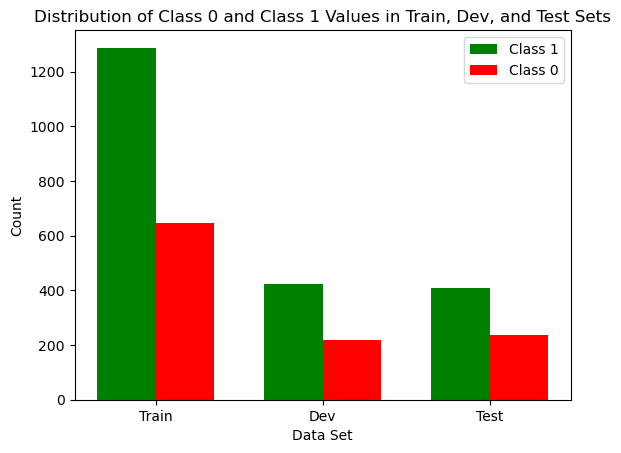

In [53]:
import matplotlib.pyplot as plt

train_1 = sum(y_train == 1)
train_0 = sum(y_train == 0)

dev_1 = sum(y_dev == 1)
dev_0 = sum(y_dev == 0)

test_1 = sum(y_test == 1)
test_0 = sum(y_test == 0)

labels = ['Train', 'Dev', 'Test']
class_1_counts = [train_1, dev_1, test_1]
class_0_counts = [train_0, dev_0, test_0]

x = range(len(labels))

fig, ax = plt.subplots()

bar_width = 0.35
class_1_bars = ax.bar(x, class_1_counts, bar_width, label='Class 1', color='g')
class_0_bars = ax.bar([p + bar_width for p in x], class_0_counts, bar_width, label='Class 0', color='r')

ax.set_xlabel('Data Set')
ax.set_ylabel('Count')
ax.set_title('Distribution of Class 0 and Class 1 Values in Train, Dev, and Test Sets')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Given the bar chart, there's a clear imbalance between our two classes. This is expected however and during the model training portion, usage of the custom function $ cwts $ will be implemented to address this concern.

During the early parts of the paper, time series company fundamental analytics was uploading through the csv file 'KO Financial Data'. Lets visually inspect the following 5 equity ratio's, along with Coca Colas Adj Close to see if there's any relationship:
- Enterprise Value to EBITDA
- Price to Cashflow
- Price to Sales
- Price to Earnings
- Price to EBITDA

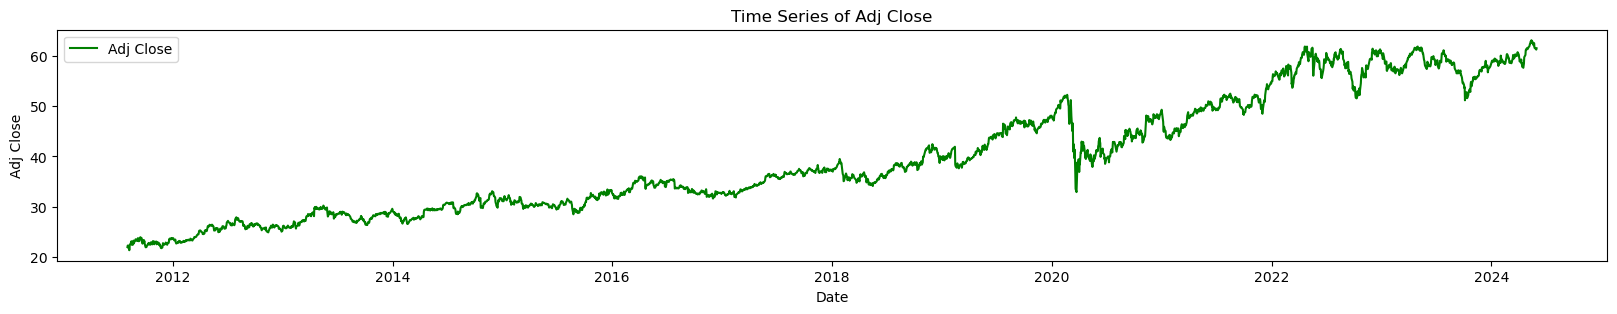

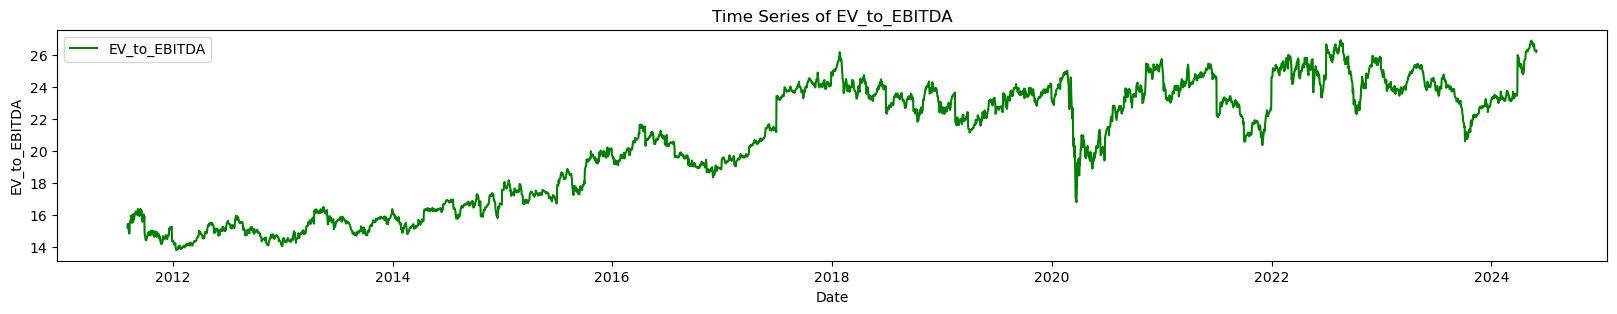

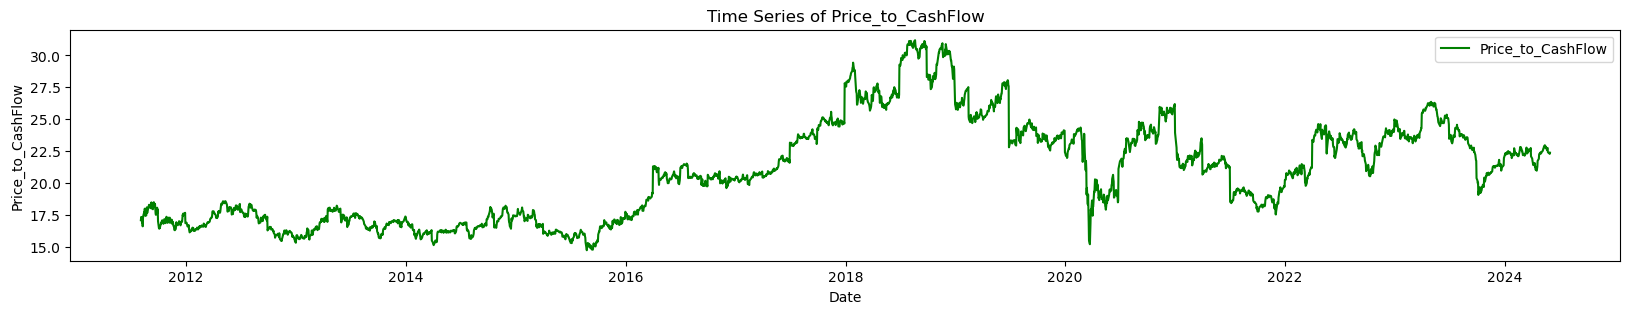

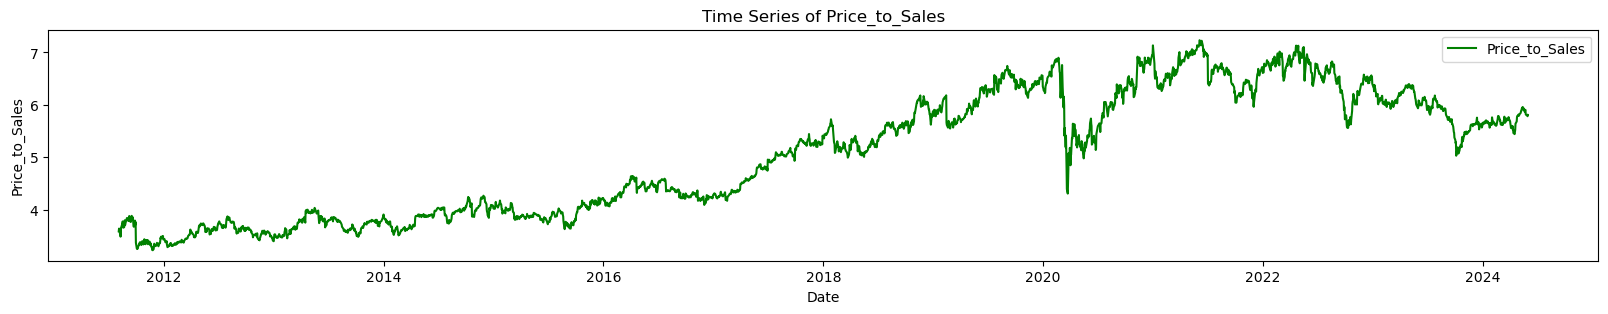

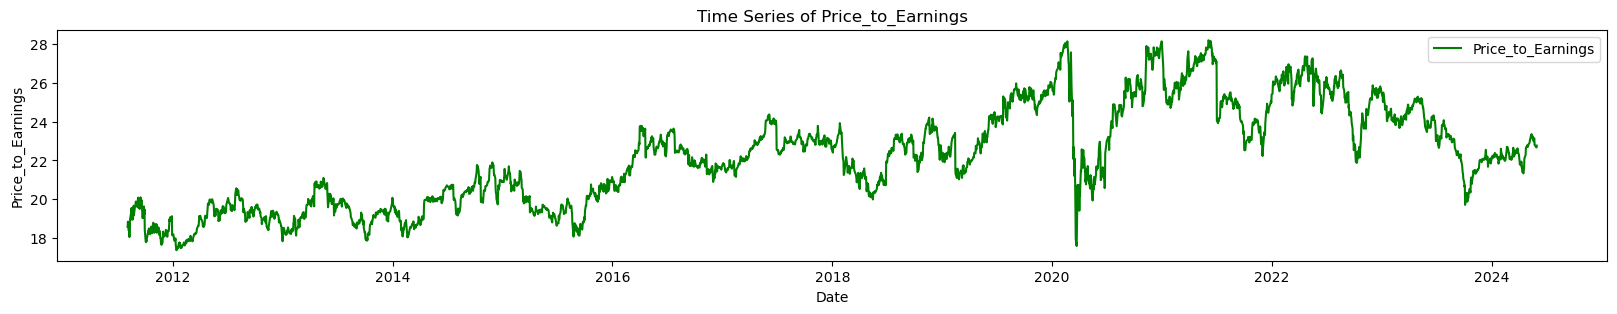

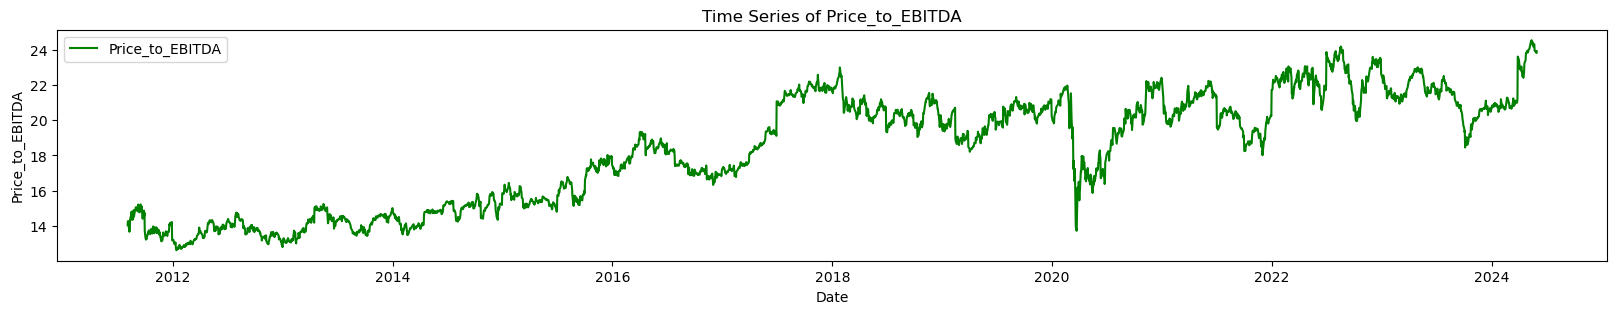

In [55]:
df['date_column'] = pd.to_datetime(df['Date'])
df.set_index('date_column', inplace=True)

columns_to_plot = ['Adj Close','EV_to_EBITDA', 'Price_to_CashFlow', 'Price_to_Sales', 'Price_to_Earnings', 'Price_to_EBITDA']

for column in columns_to_plot:
    plt.figure(figsize=(20, 3))
    plt.plot(df.index, df[column], label=column, color='g')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series of {column}')
    plt.legend()
    plt.show()

Across all equity ratio’s, there’s clear similarities between various dates. Some of the relations can be seen such as in 2011 the year starts concave down, 2016 increases followed by slight declines in 2017, significant downward trajectories in 2020 and similar concave down shapes for the end of the data. While there may be many reasons that would lead to these ratio’s behaving in a similar fashion, one clear cause is due to the adjusted closing price of Coca Cola. KO’s stock price is a strong indicator on the performance of the company. Whether there’s cyclical patterns, political laws, or global economic shutdowns, Adj Close will show investors sentimental values and future prospective beliefs towards Coca Cola. As most of the ratio’s depend on the stock price to calculate them, it is no surprise here that there should be some meaningful relationship and correlation.

Another interesting metric that should be inspected is volatility. In the dataset, there's VIX Index, Coca Cola implied volatility on a 3 month call option and 5 year CDS Spread which will be plotted as graphs for visual inspection. While CDS Spread is not directly a metric of volatility, is may be an interesting look into if the spread has some type of relationship to this data.

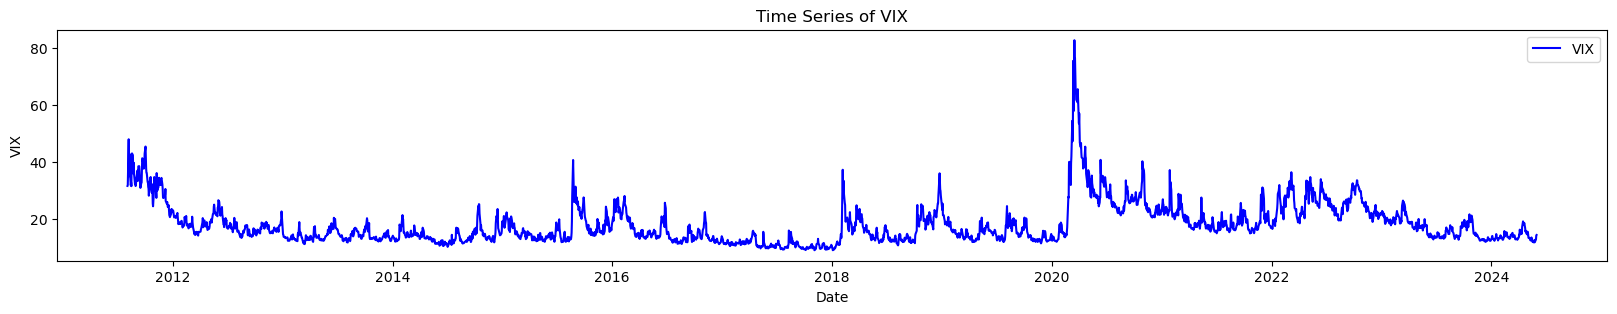

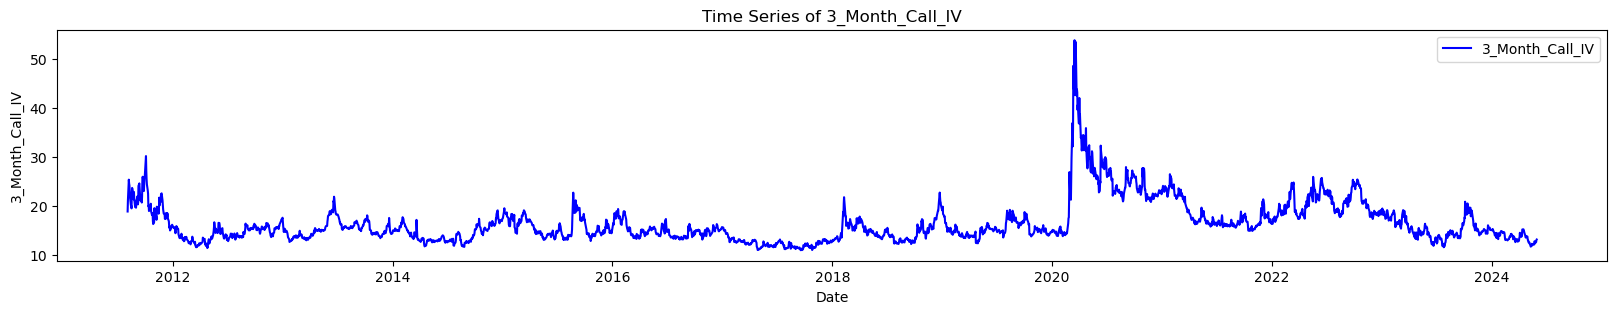

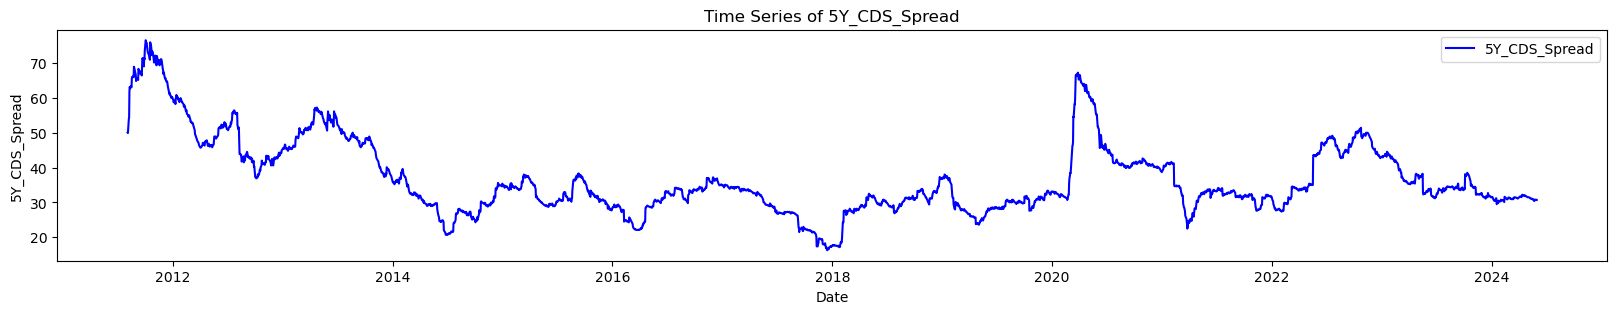

In [57]:
columns_to_plot = ['VIX', '3_Month_Call_IV','5Y_CDS_Spread']

for column in columns_to_plot:
    plt.figure(figsize=(20, 3))
    plt.plot(df.index, df[column], label=column, color='b')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series of {column}')
    plt.legend()
    plt.show()

While it's expected that the implied volatility of the 3-month option and VIX Index are correlated, there's clear distinct dates where CDS Spreads also have meaningful relations. Across all 3 graphs, 2011 to 2013 was a period where all metrics had a period of decline. Likewise, 2018 and 2020 saw rapid spikes in an upward direction. Most certainly, these fluctuations were cause from macro economic headlines. In 2011 as an example, there was a debt crisis in Europe which given uncertainty in the markets, explains the rapid increase in CDS Spread along with volatility measures. Additionally, 2020 was the year of COVID creating economic lockdowns in turn spiking uncertainty which resulted in CDS and volatility to have a rapid incline.

Moving forward, lets further inspect our data using multi-collinearity and multi-scatter plots to understand technical and statistical relationships.

# Correlation Analysis

Given feature selection process is integral to reduce complexity, increase model performance and in handling high dimensionality, we first look at constructing data sets that may have linear or non-linear dependencies. This is done so proper feature modeling can be picked to enhance our neural network later. We select a range of features to see if a linear relationship exists between the target label $ y $ and the dataset. If findings present the relationship has linearity, using Principal Component Analysis would be beneficial to the modeling process. Likewise, scatter plots will follow suit after the correlation process to understand if non linearity exists. Note that that there are 483 features, picking ones for cross comparison will be done by selecting datasets with a range of periods. This is done to reduce the amount of interpretation needed on the information and can lead to more meaningful actions for the modeling process.

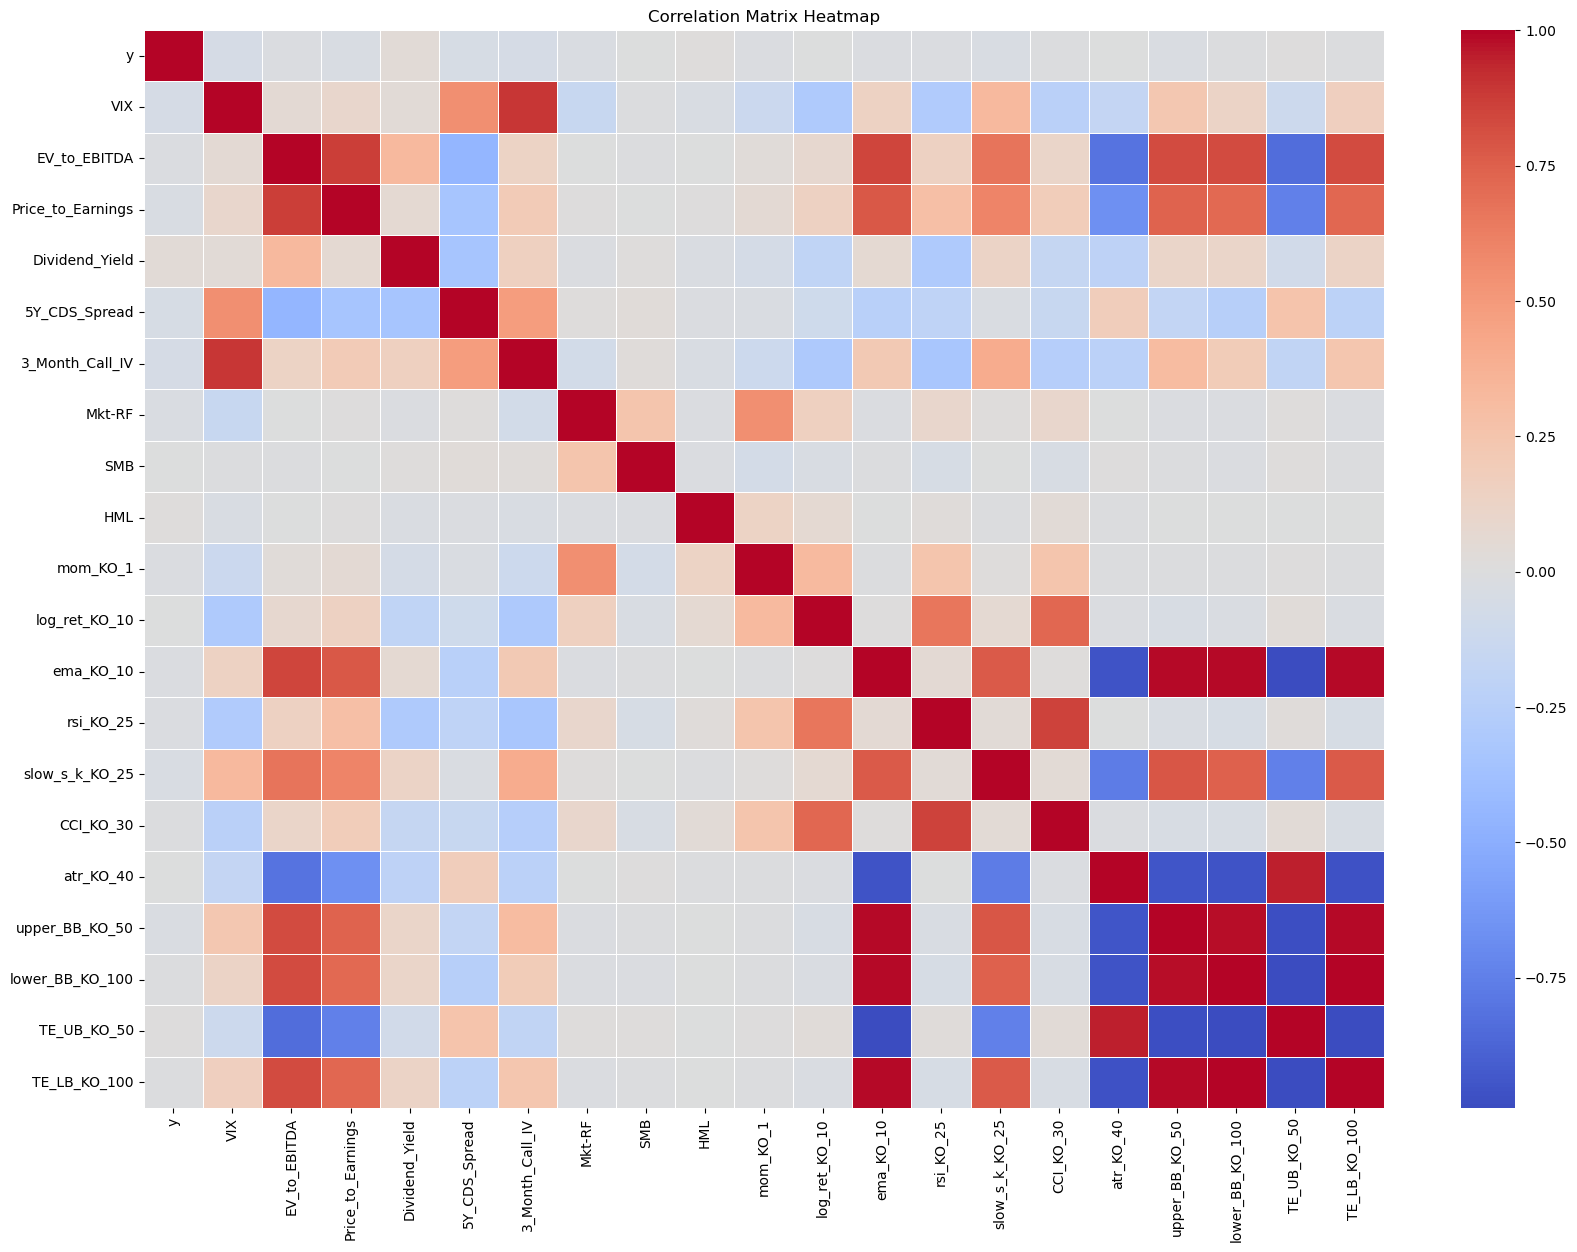

In [59]:
import seaborn as sns

columns = ['y', 'VIX', 'EV_to_EBITDA', 'Price_to_Earnings', 'Dividend_Yield', '5Y_CDS_Spread', 
           '3_Month_Call_IV', 'Mkt-RF', 'SMB', 'HML', 'mom_KO_1', 'log_ret_KO_10', 'ema_KO_10', 
           'rsi_KO_25', 'slow_s_k_KO_25', 'CCI_KO_30', 'atr_KO_40', 'upper_BB_KO_50', 'lower_BB_KO_100', 
           'TE_UB_KO_50', 'TE_LB_KO_100']

df_selected = df[columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Correlation matrix heatmap
plt.figure(figsize=(20, 14))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation coefficients signal both the strength and direction of how two variables may have a linear relationship where ranges are from -1 to 1. For interpretation, the following ranges on how we can bring meaning into the matrix are:

-  0.9 to 1.0 (-0.9 to -1.0): Very strong positive (negative) correlation
-  0.7 to 0.9 (-0.7 to -0.9): Strong positive (negative) correlation
-  0.5 to 0.7 (-0.5 to -0.7): Moderate positive (negative) correlation
-  0.3 to 0.5 (-0.3 to -0.5): Weak positive (negative) correlation
-  0.0 to 0.3 (-0.0 to -0.3): Very weak positive (negative) correlation

It’s important to note that while there can be a strong positive correlation, there also may be a strong negative one as well. To understand if the predictive label has any correlation to the rest of the fields, we pull the top and bottom 5 most correlated fields to see if a relationship exists on the entire data set.


In [61]:
correlation_matrix = df.corr()

y_correlations = correlation_matrix['y'].drop('y').sort_values(ascending=False)

top_5_y_correlations = y_correlations.head(5)
bottom_5_y_correlations = y_correlations.tail(5)

top_5_df = pd.DataFrame(top_5_y_correlations).reset_index()
bottom_5_df = pd.DataFrame(bottom_5_y_correlations).reset_index()

top_5_df.columns = ['Variable', 'Top 5 Correlation Coefficients with y']
bottom_5_df.columns = ['Variable', 'Bottom 5 Correlation Coefficients with y']

top_5_df.index += 1
bottom_5_df.index += 1

top_5_df

Variable  Top 5 Correlation Coefficients with y
1       TE_UB_VIX_7                               0.050981
2       TE_UB_VIX_6                               0.050775
3       TE_UB_VIX_5                               0.049577
4      TE_UB_VIX_10                               0.045357
5  lower_BB_VIX_250                               0.042719

In [62]:
bottom_5_df

Variable  Bottom 5 Correlation Coefficients with y
1         ema_VIX_4                                 -0.055358
2         ema_VIX_3                                 -0.055407
3    upper_BB_VIX_5                                 -0.056384
4   upper_BB_VIX_50                                 -0.056389
5  upper_BB_VIX_100                                 -0.056621

From the two tables shown, the top and bottom 5 correlated coefficients have very weak positive and negative valuations. The significance of this finding shows that the data set does not have linear relationships and most certainly, dimensionality reduction models should be based off non linearity. While we proceed to observing relationships through scatter plots, multi-collinearity analysis presents that there should be absence in using  models such as Principal Component Analysis (PCA).

# Scatter Plot Analysis

As the total number of features is 483 with a target variable of 1, creating a scatter plot for all datasets would not be feasible. Given the correlation analysis provided 10 features which do not have a linear relationship, we will use 9 of the same features to test for non-linearity instead.

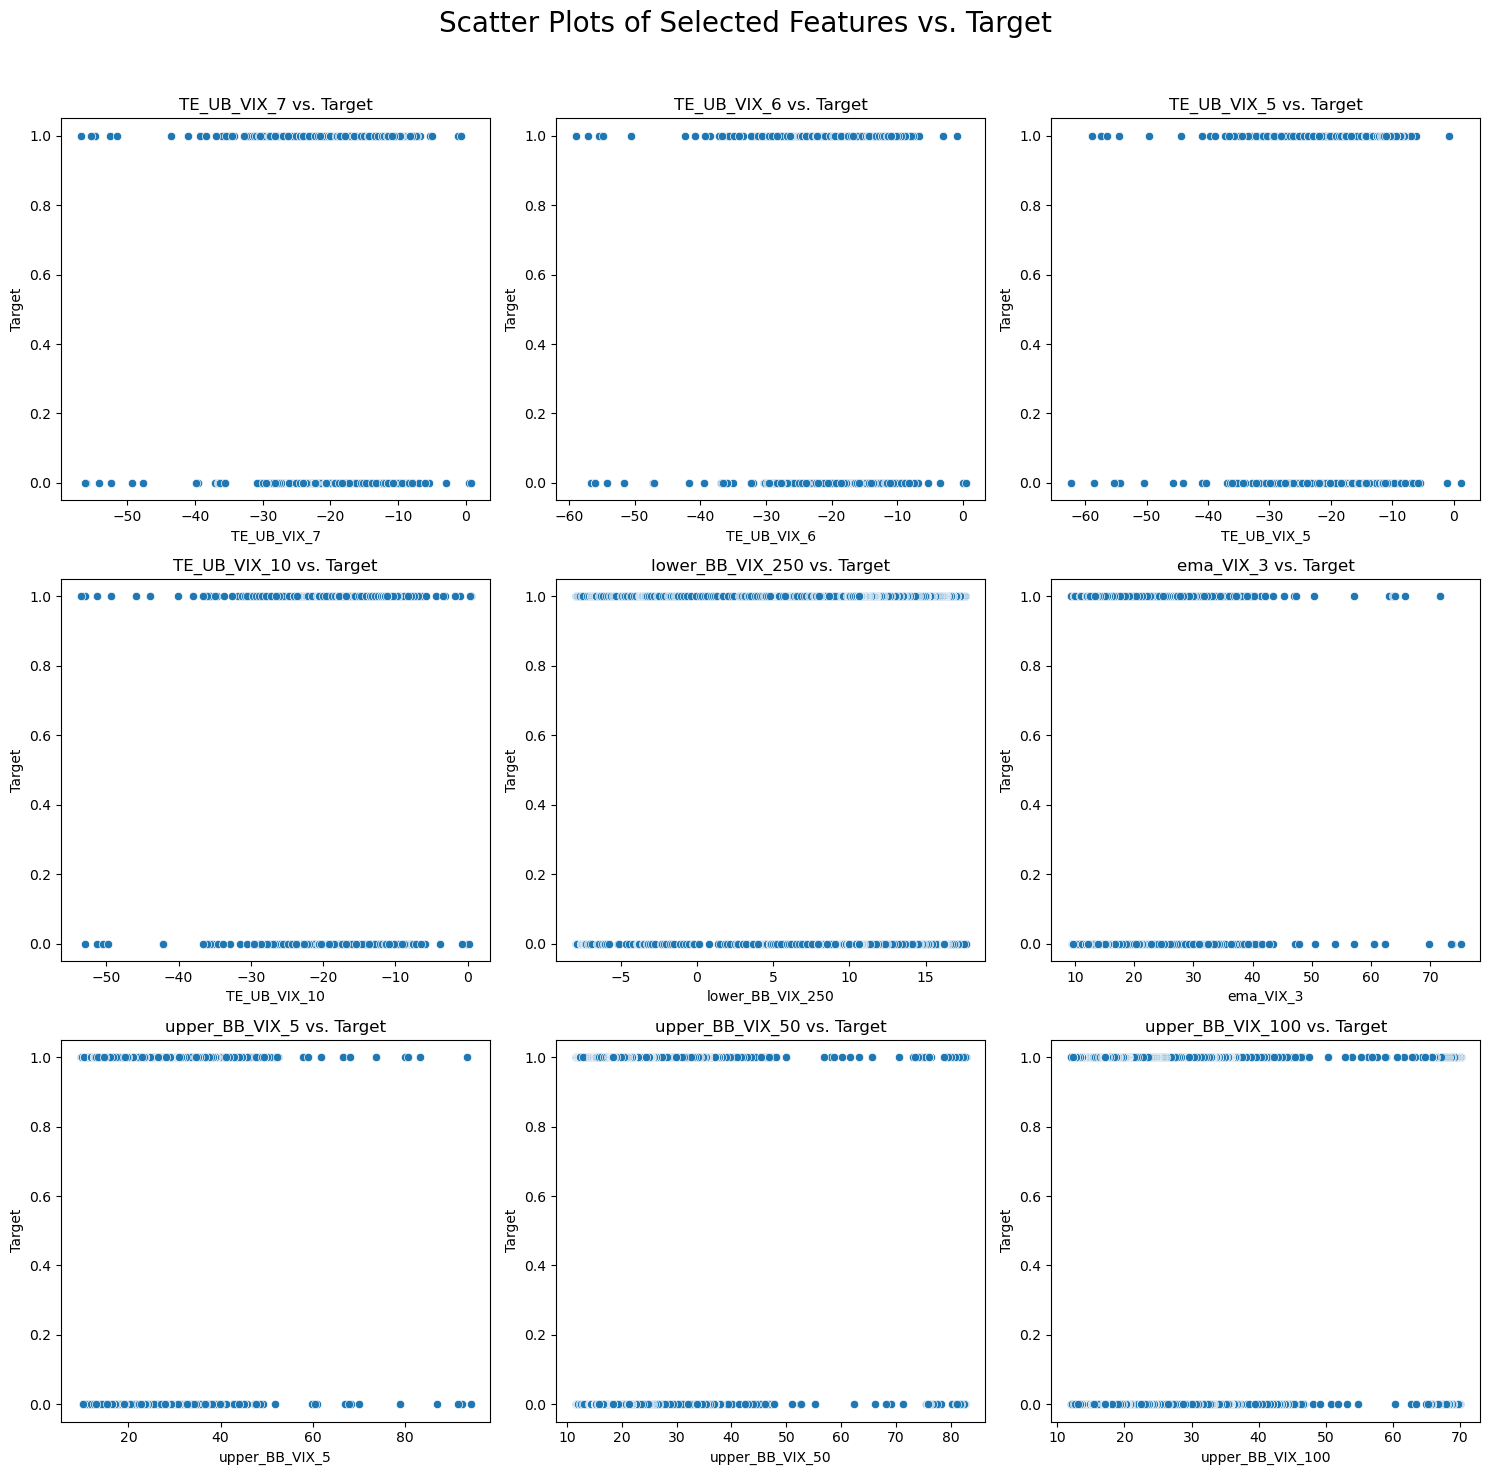

In [64]:
selected_features = ['TE_UB_VIX_7', 'TE_UB_VIX_6', 'TE_UB_VIX_5', 'TE_UB_VIX_10', 'lower_BB_VIX_250',
                     'ema_VIX_3', 'upper_BB_VIX_5', 'upper_BB_VIX_50', 'upper_BB_VIX_100']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Scatter Plots of Selected Features vs. Target', fontsize=20)

axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.scatterplot(x=total_df[feature], y=y, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

From the scatter plots, the data point clustering’s are always at the top when y=1, or at the bottom when y=0 which is expected given the predictive variable ‘y’ is binary. A point to note is values are spread along the x-axis without showing any clear direction or pattern. Because of this, we can infer that the relationship between the feature set and the target variable are most likely non-linear. Analysis during the pre-processing portion of the paper was done such that MinMaxScaler was used when splitting the data. As this scaler is well suited for Self-Organizing Maps (SOM) and k-means clustering which will be used for dimensional reduction from EDA findings, we will keep this as the choice for feature scaling. Now that we can understand the type of feature reduction techniques that are appropriate, we proceed with using three different methods: Self Organizing Maps, Uniform Manifold Approximation and Projection and K-Means Clustering.

# Self-Organizing Maps (SOM)

Within the neural network space for unsupervised learning, Self-Organizing Maps (SOM) is a popular and effective method for dimensionality reduction. The reason for SOM’s being efficient is they’re able to take high dimensional non-linear data, and transform it into a lower dimensional (typically two-dimensional) grid. This is done without altering the data’s original topological properties creating an impactful method on visualizing the dataset while also finding new patterns. For details on the steps involved in the SOM process:

- **1) Initialization:** As the data is non-linear which was found during EDA, the weights of the neurons are initialized randomly. A neuron (or node) represents for the SOM grid, a specific location within the map. This is done to not assume specific linear structuring.

- **2) Input Vector Presentation:** Provide the training data to the network.

- **3) Distance Calculation:** A core component to first break down is input vector and weight vector. An input vector is simply the data point from the original dataset that is used for SOM. We denote the input vector as $ x $. A weight vector on the other hand is each neuron within SOM. It’s adjusted during our training process to be similar to the input vector and has the same dimensionality as well. We use the syntax $ w_i $, as our weight vector. Given this information, calculations are done using Euclidean distance between the input vector and weight vector within the SOM. This is done by the following:
  
  $
   d(i) = \sqrt{\sum_{j=1}^{n} (x_j - w_{ij})^2}
  $
  
   where $ d(i) $ is the distance between the input vector $ x $ and the weight vector $ w_i $, and $ n $ is the number of features.

- **4) Best Matching Unit (BMU):** BMU is a node which has a weight vector closest to the input vector.

- **5) Weight Adjustments:** Much like where weight vectors are adjusted to be similar to input vectors, the weights of BMU and nearby neurons are also updated to be similar to input vectors. The way this is done is by altering the learning rate and using a neighborhood function which decreases over time. Parameters are adjusted by decreasing the learning rate and neighborhood radius over time.

     $
     W_v(i+1) = W_v(i) + \theta(i, u, v) \cdot \alpha(i) \cdot (D(t) - W_v(i))
     $
     
     Where:
     - $ W_v(i) $: Weight vector of neuron $ v $ at iteration $ i $
     - $ \theta(i, u, v) $: Neighborhood function that decreases with distance from the BMU
     - $ \alpha(i) $: Learning rate that decreases over time
     - $ D(t) $: Input vector at time $ t $
     
First, we initialize the SOM using class weights to ensure the data is balanced. There’s two key metrics to verify the performance of Self organizing maps: Quantization error and Topographic error. 

**Quantization error** measures the average distance between each data point and its BMU. A low error shows that the model is effective in illustrating the data (where data points are close to their BMU’s). A high error on the other hand shows that SOM did not capture the data structure properly (where data points are far from their BMU). Given the value found in the python output below, it’s relatively low showing that the SOM model is presenting a strong representation of the data.

$
\text{Quantization Error} = \frac{1}{N} \sum_{i=1}^{N} \| \mathbf{x}_i - \mathbf{w}_{\text{BMU}_i} \| 
$

where:
- $N$ is the total number of data points.
- $\mathbf{x}_i$ is the $i$-th data point.
- $\mathbf{w}_{\text{BMU}_i}$ is the weight vector of the BMU for the $i$-th data point.
- $\| \cdot \|$ denotes the Euclidean distance.

**Topographic error** shows the proportion of data points for which the first and second BMU’s are not adjacent. For adjacency, we define if this occurs when two BMU’s are immediate neighbors within the SOM grid. A low score demonstrates that the SOM is properly preserving the spatial arrangement and relationships of the neurons on our map (also known as the topography). A high value demonstrates that the model did not capture the topological structure. In the case of our error value, SOM generally preserved the data topology well.

$
\text{Topographic Error} = \frac{1}{N} \sum_{i=1}^{N} \delta_i 
$

where:
- $N$ is the total number of data points.
- $\delta_i$ is 1 if the first and second BMUs of $\mathbf{x}_i$ are not adjacent, and 0 otherwise.


In [66]:
from minisom import MiniSom

som_grid_size = 15
som = MiniSom(x=som_grid_size, y=som_grid_size, input_len=len(numeric_cols), sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_train_scaled[numeric_cols].values)

num_iteration = 100
for i in range(num_iteration):
    for x in X_train_scaled[numeric_cols].values:
        som.update(x, som.winner(x), i, num_iteration)

quantization_error = som.quantization_error(X_train_scaled[numeric_cols].values)
topographic_error = som.topographic_error(X_train_scaled[numeric_cols].values)

print(f'Quantization Error: {quantization_error}')
print(f'Topographic Error: {topographic_error}')

Quantization Error: 0.8474276526180734
Topographic Error: 0.09198966408268734


The Unified Distance Matrix (also known as U-Matrix) is a means of visualizing SOM to show the distance between the neighboring neurons on the map. Some of the helpful aspects of using the tool is to see clustering’s, topology preservations, and additional insight into the structure of the data. For clusterings, darker areas show larger distances between neurons indicating cluster boundaries. Areas that are lighter however, the distance is smaller representing regions where data points are similar. When there’s a smooth transition of color, this indicates strong topological preservation.

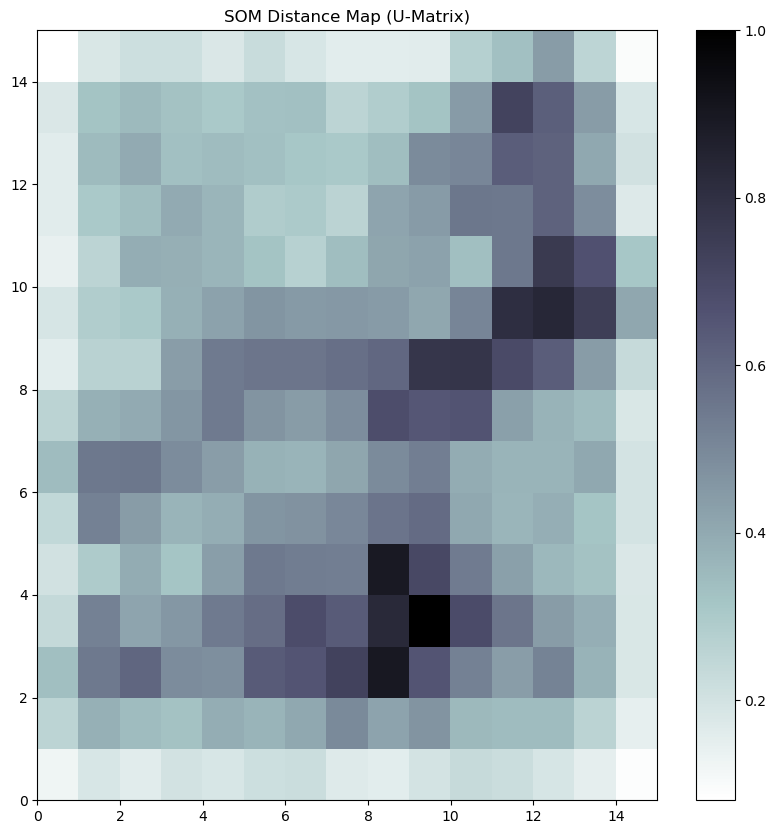

In [68]:
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('SOM Distance Map (U-Matrix)')
plt.show()

Another tool we can use is a Hit Map which provides further insight into clustering and classifications that SOM used. Markers (which are presented as circles or squares) shows the data points that is mapped to a specific neuron. These represent one class (Class 0 and class 1). High density is exposed when there’s a concentration of markers in an area, while lower density regions have less markers. From the map below, distinct areas of circles or squares shows strong class separations. Saying that, for the mixed grid plots, they are suggesting similarity between the classes. 

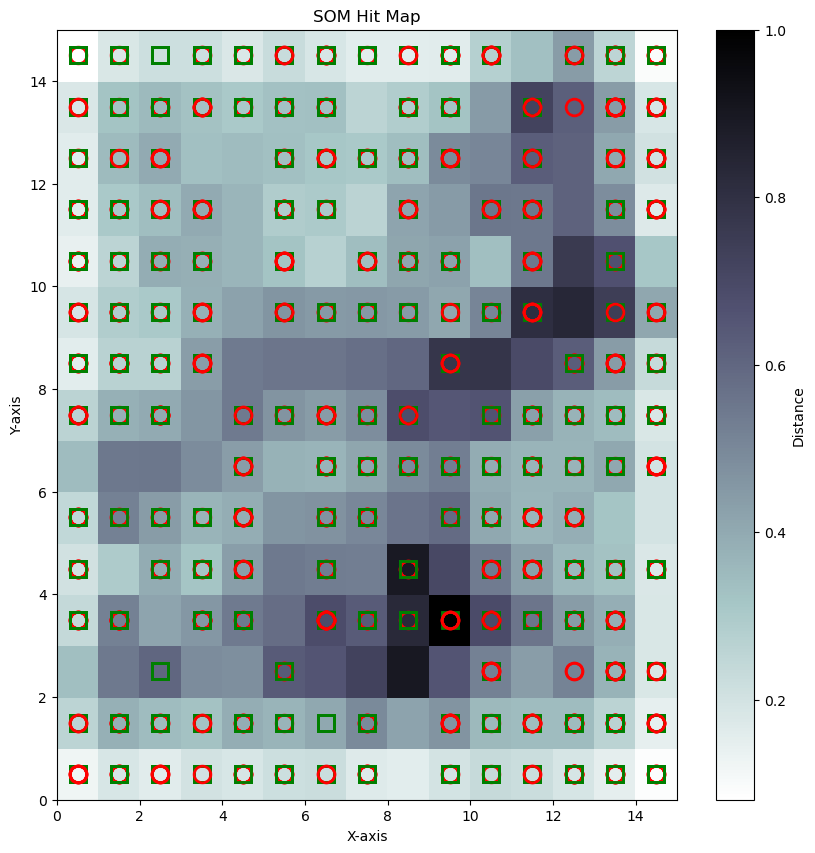

In [70]:
plt.figure(figsize=(10, 10))
plt.title('SOM Hit Map')
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='Distance')
markers = ['o', 's']
colors = ['r', 'g']
for cnt, xx in enumerate(X_train_scaled[numeric_cols].values):
    w = som.winner(xx)  # Getting the winner
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[y_train.values[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y_train.values[cnt]], markersize=12, markeredgewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

While SOM is a powerful tool for dimensionality reduction, it doesn’t explicitly remove features during reduction, but rather condenses high dimensional data into a lower dimensional grid. All is done while preserving the topological aspects of the initial dataset. The process has SOM being trained with the starting data, with adjustments to the weightings of the specific neurons to represent the data properly. In order to analyze what features are designated as important, we first extract the weights from SOM and calculate the variance of each feature. A point to note is that the variances are normalized to give us a relative importance score for the individual features. Next, we designate the features importance as either high, medium or low which is based on quantile thresholds. Below is the visualization of how many features are labeled as one of the three scores stated:

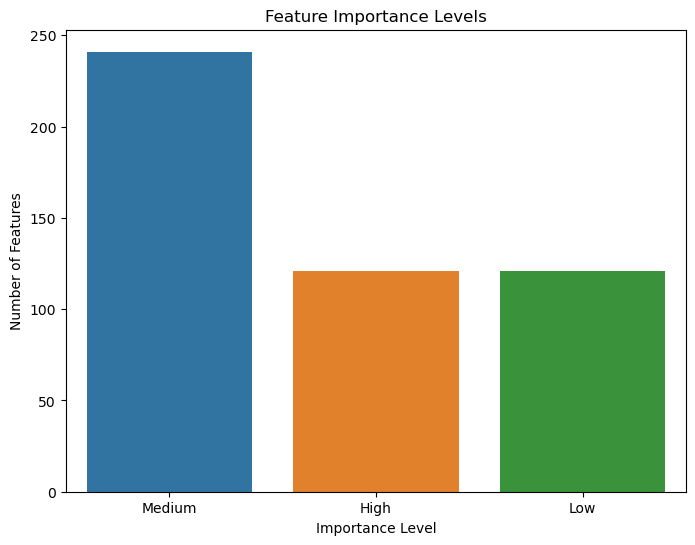

In [72]:
Weights = som.get_weights()

# Get the variance of each feature in the SOM weights
feature_variances = np.var(Weights, axis=(0, 1))

feature_importance_df = pd.DataFrame({
    'Feature': numeric_cols,
    'Variance': feature_variances
}).sort_values(by='Variance', ascending=False)

# Normalization for the variance
feature_importance_df['Importance'] = feature_importance_df['Variance'] / feature_importance_df['Variance'].sum()

# Quantiles
high_importance_threshold = feature_importance_df['Importance'].quantile(0.75)
medium_importance_threshold = feature_importance_df['Importance'].quantile(0.25)

# Classify features
def classify_importance(row):
    if row['Importance'] >= high_importance_threshold:
        return 'High'
    elif row['Importance'] >= medium_importance_threshold:
        return 'Medium'
    else:
        return 'Low'

feature_importance_df['Importance_Level'] = feature_importance_df.apply(classify_importance, axis=1)

importance_counts = feature_importance_df['Importance_Level'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=importance_counts.index, y=importance_counts.values)
plt.title('Feature Importance Levels')
plt.xlabel('Importance Level')
plt.ylabel('Number of Features')
plt.show()

Using the classifications to find which features are designated as high importance, below is a plot feature map for the top 12 features. The color scale shows the values of the features, where blue represents low values and red are high values. The grid cells are the neurons in the SOM model where the colors that are presented show the weights of these neurons for the individual feature. For an example of how to interpret the map on “upper_BB_KO_300”, red regions suggest clusters where the feature has high values, while the blue areas have clusters which are low values. In this way, analyzing the data’s topological properties and importance for the features used in SOM becomes much easier.

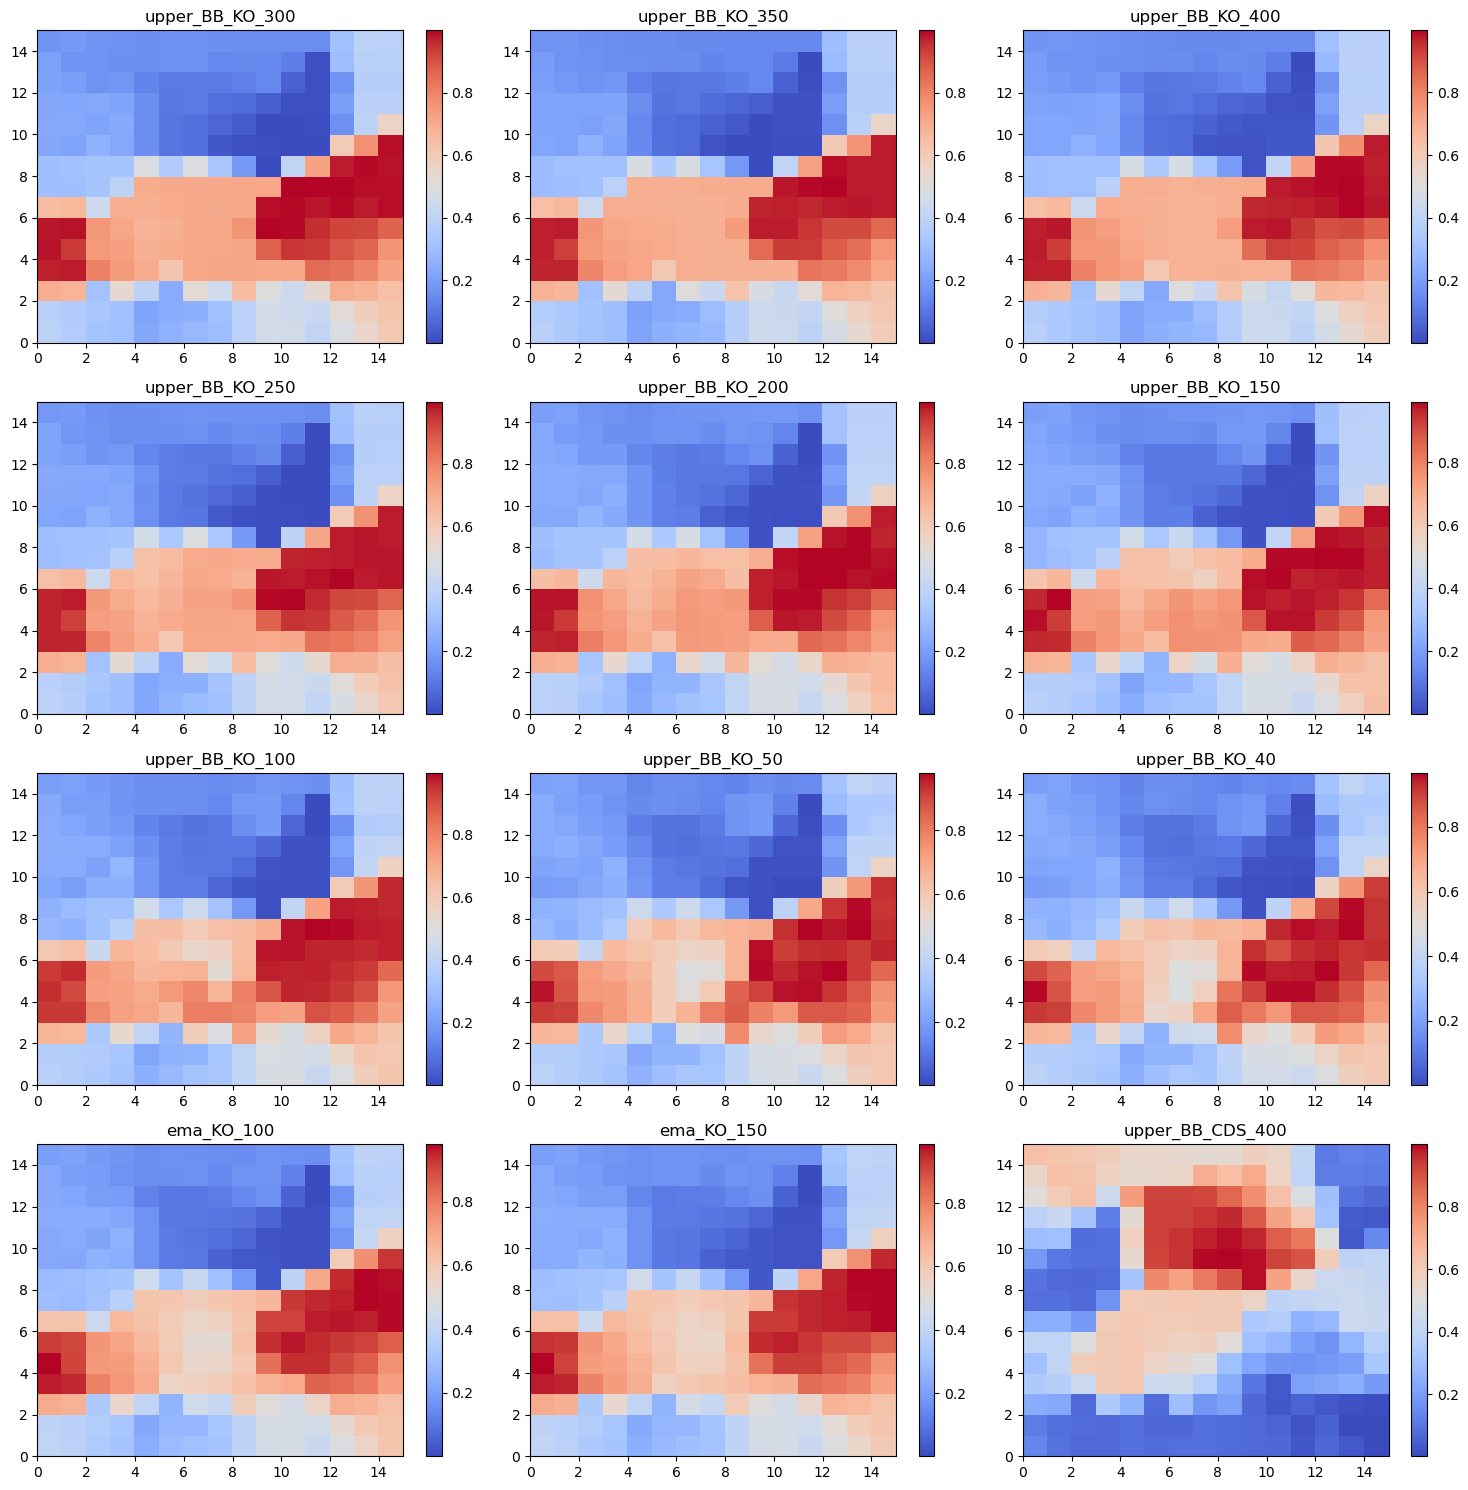

In [74]:
top_features = feature_importance_df[feature_importance_df['Importance_Level'] == 'High']['Feature'].tolist()[:12]

def plot_feature_maps(som, feature_names):
    plt.figure(figsize=(15, 15))
    for i, feature_name in enumerate(feature_names):
        plt.subplot(4, 3, i+1)
        plt.title(feature_name)
        plt.pcolor(som.get_weights()[:, :, numeric_cols.get_loc(feature_name)].T, cmap='coolwarm')
        plt.colorbar()
    plt.tight_layout()
    plt.show()

plot_feature_maps(som, top_features)

Finally, we extract all features labeled as high importance that SOM designated and display them below. For later LSTM modeling, while we can use this method to filter out features, we will use SOM’s ability to preserve the topographic qualities so that data is not fully lost (and is instead weight adjusted to reflect importance). Mirely, the code below is a representation of a different path that could be done in this paper for a different approach of implementation.

In [76]:
high_importance_features = feature_importance_df[feature_importance_df['Importance_Level'] == 'High']

high_importance_feature_names = high_importance_features['Feature'].tolist()

num_high_importance_features = len(high_importance_feature_names)

print(f"High Importance Features: {high_importance_feature_names}")
print(f"Number of High Importance Features: {num_high_importance_features}")

High Importance Features: ['upper_BB_KO_300', 'upper_BB_KO_350', 'upper_BB_KO_400', 'upper_BB_KO_250', 'upper_BB_KO_200', 'upper_BB_KO_150', 'upper_BB_KO_100', 'upper_BB_KO_50', 'upper_BB_KO_40', 'ema_KO_100', 'ema_KO_150', 'upper_BB_CDS_400', 'TE_LB_KO_100', 'TE_LB_KO_50', 'ema_KO_200', 'ema_KO_50', 'TE_LB_KO_150', 'upper_BB_KO_30', 'ema_KO_40', 'TE_LB_KO_40', 'upper_BB_CDS_350', 'upper_BB_KO_20', 'Price_to_Sales', 'upper_BB_KO_25', 'ema_KO_30', 'ema_KO_250', 'Date', 'upper_BB_KO_10', 'ema_KO_25', 'TE_LB_KO_30', 'lower_BB_KO_50', 'TE_UB_KO_50', 'TE_LB_KO_200', 'upper_BB_CDS_300', 'TE_LB_KO_250', 'ema_KO_20', 'ema_KO_300', 'ema_VIX_400', 'upper_BB_CDS_250', 'lower_BB_KO_100', 'TE_UB_KO_100', 'upper_BB_KO_5', 'ema_VIX_350', 'upper_BB_KO_6', 'TE_LB_KO_25', 'ema_KO_350', 'TE_UB_KO_40', 'lower_BB_KO_40', 'upper_BB_KO_7', 'TE_LB_KO_20', 'ema_KO_10', 'EV_to_EBITDA', 'ema_KO_400', 'ema_VIX_300', 'TE_UB_KO_150', 'lower_BB_KO_150', 'ema_KO_7', 'upper_BB_VIX_400', 'ema_KO_6', 'TE_UB_KO_30', 'low

# Uniform Manifold Approximation and Projection (UMAP)

UMAP is another nonlinear dimensionality technique that will be used for this paper. Much like SOM, it’ll reduce high dimensional datasets while still preserving the original relationships. From a local and global data structure standpoint, UMAP will be able to maintain them well while allowing visualization of the clusters and individual patterns within the data. Here’s the process for how UMAP operates:

- 1) **Initialization:** First, the model constructs a k-nearest neighbor graph. More specifically, the construction is using a specified number of nearest neighbors (k) so that the local structure of the dataset can be preserved as much as UMAP can do. Euclidean distance is used to find the nearest neighbors.

- 2) **High-Dimensional Construction:** Next, UMAP calculates the distance between points and converts these distances into probabilities. This is done to build a weighted graph for high dimensional data.

- 3) **Low-Dimensional Embedding:** For low dimensional data, the model works on optimizing it by minimizing the difference between high and low dimensional graphs. This is an iterative process using gradient descent to adjust the low dimensional points. The reason for this process is to keep the distances and relationships between points as much as UMAP can. For the process around representing both low and high dimensional structures, the model uses a concept called fuzzy simplicial sets. Here, the goal is to optimize the cross entropy between the two dimensions. Below is the optimization objective formula:

$$ 
C = \sum_{(i,j) \in E} w_{ij} \log \frac{w_{ij}}{d_{ij}} 
$$

where:

- $ w_{ij} $ are the weights in the high-dimensional graph 

- $ d_{ij} $ are the distances in the low-dimensional embedding 

- $ E $ is the set of edges in the graph.

Some further optimization can be done through different parameters for tuning such as number of neighbors (m_neighbors), minimum distant (min_dist), or Metric. The purpose behind number of neighbors is to control the balance between local and global structuring. The smaller the value, the more local the structure. Minimum distance on the other hand controls the spacing between points in the low dimensional space. The smaller the value, the closer together points will be which will then create tighter clusters. Finally, metric allows one to determine the distance metric used to contrast the k-nearest neighbor graph. Options include Euclidean, Manhattan or Cosine. For consistency to SOM, Euclidean will be used here.

For data visualizing and set up on UMAP: Training, development and test datasets are properly transformed with the appropriate scaling. After, we create a 3D UMAP projections of the datasets which are pictured by red and blue dots representing their classes. The way the 3D image is used is to see the structure of the data, along with how separable the data has become under UMAP in a lower dimensional space.

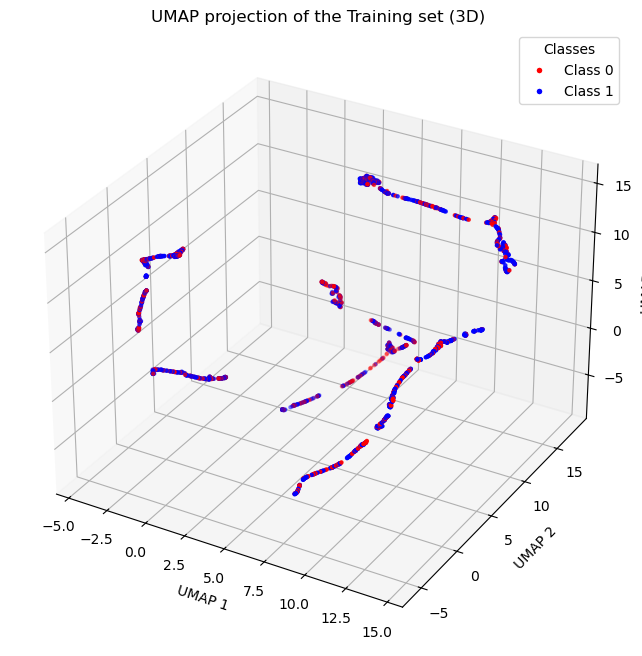

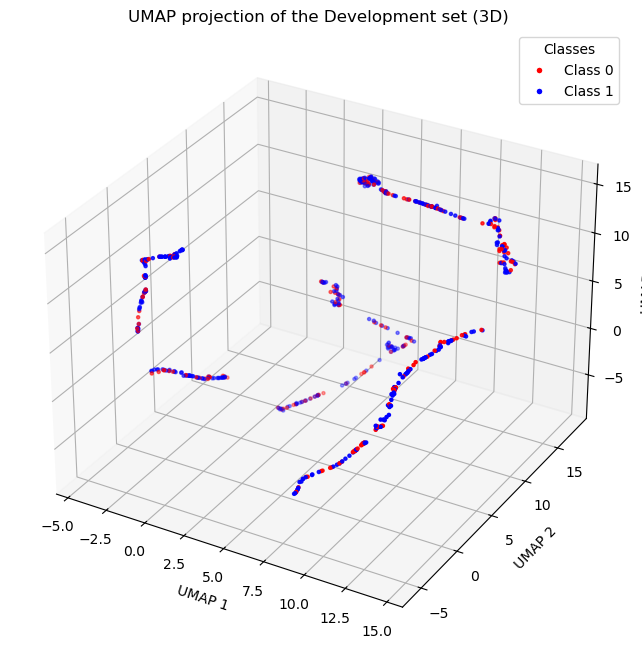

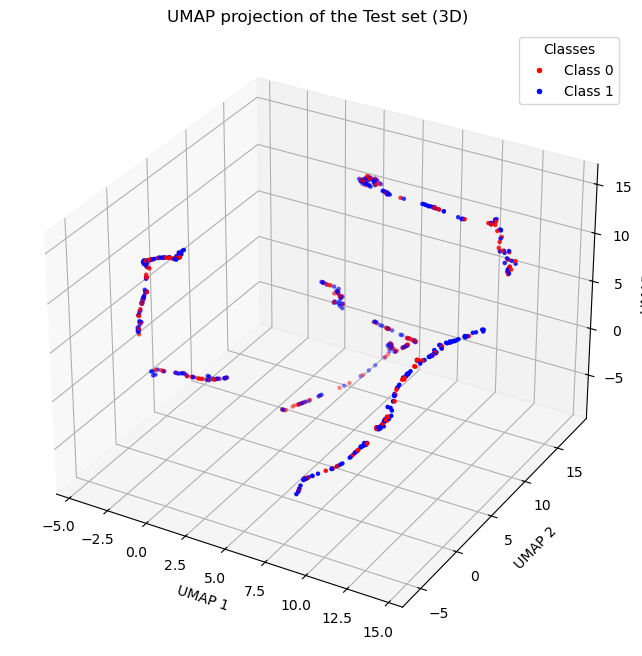

In [78]:
import umap

umap_reducer = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_train_umap = umap_reducer.fit_transform(X_train_scaled)
X_dev_umap = umap_reducer.transform(X_dev_scaled)
X_test_umap = umap_reducer.transform(X_test_scaled)

# Function to plot UMAP results in 3D
def plot_umap_3d(embedding, labels, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = ['red' if label == 0 else 'blue' for label in labels]
    
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=colors, s=5)
    
    red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='Class 0')
    blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='Class 1')
    ax.legend(handles=[red_patch, blue_patch], title="Classes")
    
    ax.set_title(title)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_zlabel('UMAP 3')
    plt.show()

plot_umap_3d(X_train_umap, y_train, 'UMAP projection of the Training set (3D)')
plot_umap_3d(X_dev_umap, y_dev, 'UMAP projection of the Development set (3D)')
plot_umap_3d(X_test_umap, y_test, 'UMAP projection of the Test set (3D)')


Next for further analysis on UMAP, a density distribution in a 2D space is used. The contour lines are the level of density in which regions of higher or lower density points can be visualized. Concentration of the lines indicates regions where there is higher density. For the below plot, there are distinct regions which is expected given class separation. One notable point however is there’s some overlap seen between classes demonstrating that separation is not perfect in the 2D UMAP space which could impact performance on the trained data.

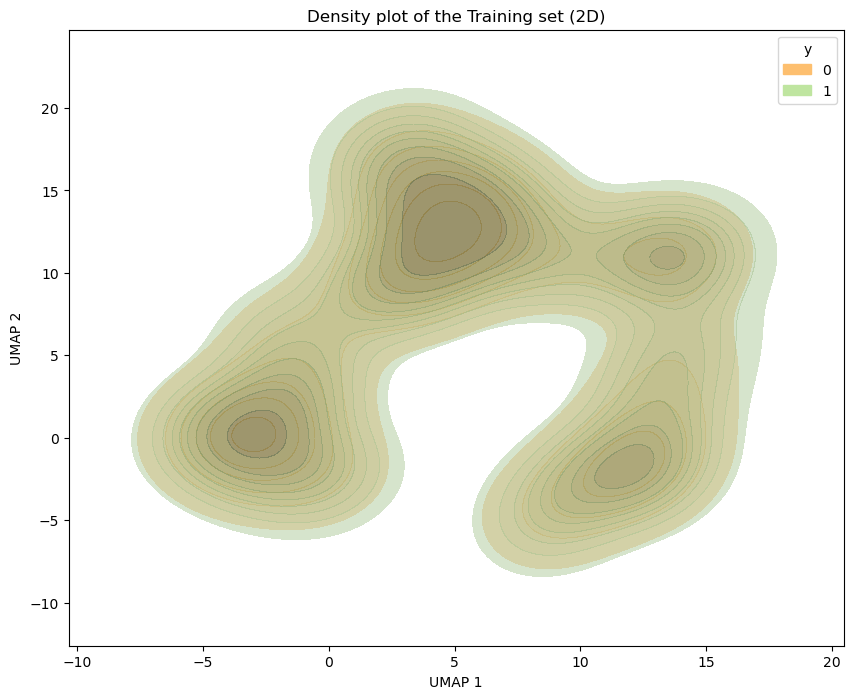

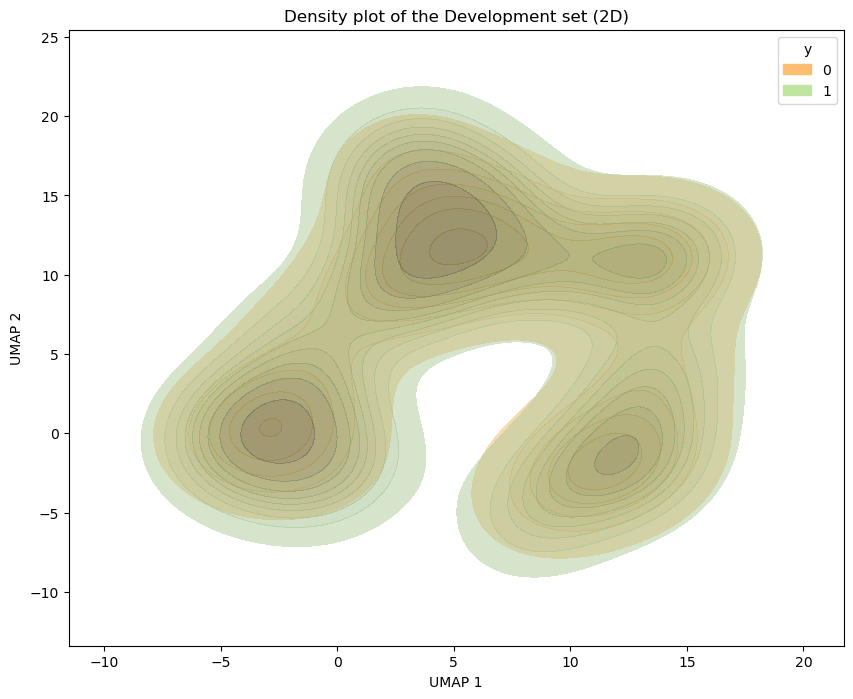

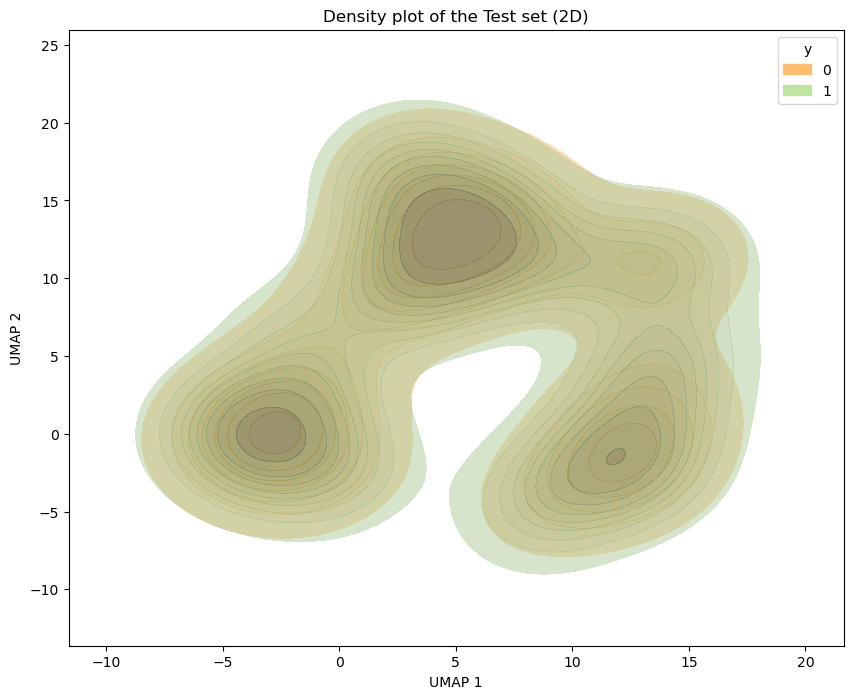

In [80]:
# Plot density in 2D
def plot_density_2d(embedding, labels, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.kdeplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, fill=True, palette='Spectral', alpha=0.5, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    plt.show()

plot_density_2d(X_train_umap, y_train, 'Density plot of the Training set (2D)')
plot_density_2d(X_dev_umap, y_dev, 'Density plot of the Development set (2D)')
plot_density_2d(X_test_umap, y_test, 'Density plot of the Test set (2D)')

# K-Means Clustering

For unsupervised learning, K-Means Clustering is another popular method used. Here, it partitions data into clusters in which the clusters consist of data points that are similar to one another. The reason clustering is impactful is due to the findings of various structures and patterns within the dataset. Ultimately, this technique is used by doing two core parts to our data: It’s first objective is to minimize the variance within each cluster, while the second is to maximize the variance between the clusters. The way this is done is by refining a set of clusters in an iterative process and redistributing the data points based on their distance to these said clusters. The below are detailed steps for the process on K-Means Clustering:

- **1) Initialization:** First, the number of clusters (k) is decided using methods such as Elbow or Silhouette analysis. 

Elbow Method to determine the optimal number of clusters is done as follows:

1)	For k values, start K-Means clustering.

2)	Sum the squared distances between the data points and their centroids.

3)	Plot the clusters on the x-axis, while squared distance is on the y axis.

4)	From the plot, the ‘elbow’ point which represents the rate at which there’s a decrease in the squared distances. That point is where the optimal number of clusters lay. Anything past this point shows diminishing returns and should not be considered.

Silhouette Analysis on the other hand is another method to provide the quality of clustering and is done as follows:

1)	First we compute the silhouette coefficient:

$$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$ 

where $a(i)$ is the average distance between the data point and other points in the same cluster, and $b(i)$ is the average distance between the data point and points in the nearest neighboring cluster. There’s 3 ways to interpret the coefficient. If the value is 1, then this indicates the data point matches its own cluster, and poorly matches the neighboring cluster. If the value is closer to 0, the data point is closer to the two neighboring clusters (also described as the decision boundary). Finally, if a negative value comes about, then the data point may have been put into the wrong cluster.

2)	The average score of the silhouette is taken from all data points to find the quality of the clustering’s.

3)	The process described is done for different values of k where at the end, the value of k which maximizes the average Silhouette score is chosen as it represents the optimal cluster configuration.

- **2) Assignment of Data Points:** Using Euclidean distance, the data point is labeled with the closest centroid. 

$$
     d(x, c) = \sqrt{\sum_{i=1}^{n} (x_i - c_i)^2}
$$
     where $d(x, c)$ is the distance between the data point $x$ and the centroid $c$, and $n$ is the number of features.  
     
- **3) Updating the Centroids:** Once the data points are allocated to their nearest centroid, the centroids are updated. As many data points are assigned to a new centroid, the new centroid is calculated as:

$$
     c_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
$$
     
where $ c_j $ is the updated centroid, $ C_j $ is the set of points assigned to centroid $ j $, and $ |C_j| $ is the number of points in $ C_j $.
     
This is an iterative process between steps 2 and 3 where it’s continued until the centroids converge.

Inertia can be defined as the sum of squared distances within the cluster. The algorithms’ goal is to minimize the inertia where performance is assessed in the transformed space. While the standard K-means assumes the dataset is linearly separable, usage of kernels such as Gaussian (RBF) can be employed to allow the algorithm to partition non-linear data effectively.

$$
     K(x, y) = \exp\left(-\frac{\|x - y\|^2}{2\sigma^2}\right)
$$
     where $\sigma$ is a parameter that controls the width of the Gaussian kernel.

Using K-Means clusters, an elbow plot is used below to find the optimal number of clusters. For further clarification, along with visual representation, the code provides the numerical amount for optimal clusters needed.

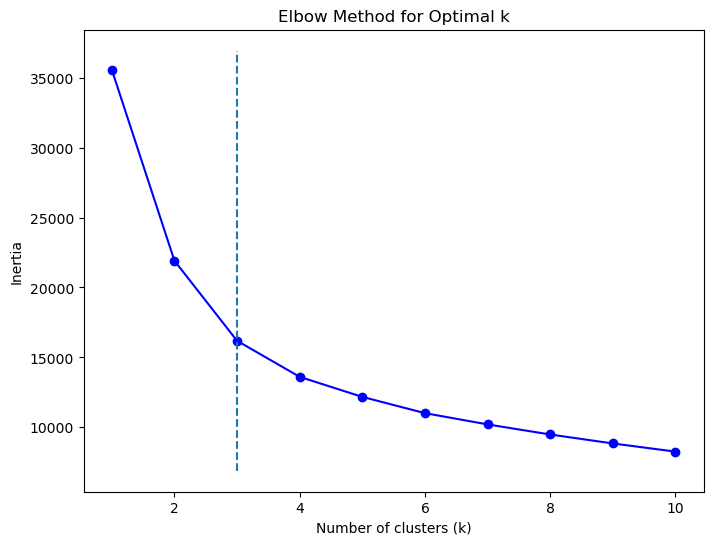

The optimal number of clusters is 3.


In [82]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

X_scaled_numeric = X_train_scaled.drop(columns=datetime_cols)

# Elbow method to find the optimal amount of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_numeric)
    inertia.append(kmeans.inertia_)

knee = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-')
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_k = knee.knee
print(f"The optimal number of clusters is {optimal_k}.")

To best visualize the data for K-Means Clustering, we use a scatter plot between VIX and EV_to_EBITDA while using the optimal number of clusters found from the above code. The centroids of the clusters can be seen with the ‘x’ symbol, while the data points are colored to the clusters they’ve been assigned to. What can be seen when implementing the plot is the purple clusters show density in how the values are packed together meaning the grouping has more ‘EV_to_EBITDA’ values than ‘VIX’ ones. The teal on the other hand shows a mix between the two pieces of data with moderate correlation from our features. Finally, the yellow shows opposite behavior from the purple in which there’s lower values for ‘EV_to_EBITDA’ compared with ‘VIX’. While K-Means does separate the data, there's a lot of overlap that occurs for teal, along with additional outliers for purple which may impact the models performance.

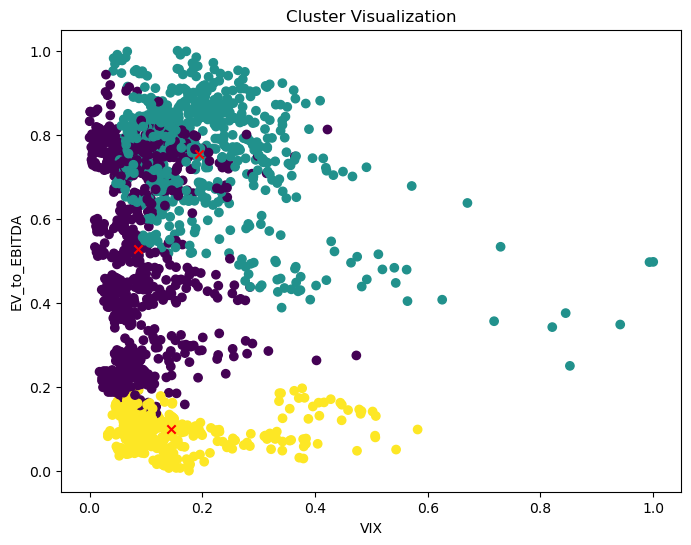

In [84]:
feature_1_name = X_scaled_numeric.columns[0]
feature_2_name = X_scaled_numeric.columns[1]

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled_numeric)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_numeric.iloc[:, 0], X_scaled_numeric.iloc[:, 1], c=y_kmeans, cmap='viridis', marker='o')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.title('Cluster Visualization')
plt.show()

Finally, we analyze the statistical components of the clusters by seeing the features mean and standard deviation (std) given the clusters. The use of these metrics is to help understand which features have a stronger contribution between clusters. The higher the differences in mean values between clusters as an example, the more important they are. While it’s not practical to scatter plot all features, the below numerical relations are a good overview to further transparency on how the model is behaving.

In [86]:
X_scaled_numeric['cluster'] = y_kmeans + 1

feature_stats = X_scaled_numeric.groupby('cluster').agg(['mean', 'std']).transpose()

feature_stats

cluster                        1         2         3
VIX               mean  0.085317  0.194459  0.145001
                  std   0.060374  0.127259  0.110132
EV_to_EBITDA      mean  0.528911  0.754674  0.098355
                  std   0.214204  0.130711  0.045805
Price_to_CashFlow mean  0.425906  0.446564  0.131832
...                          ...       ...       ...
TE_LB_CDS_400     std   0.151484  0.109024  0.231738
upper_BB_CDS_400  mean  0.159206  0.412800  0.789309
                  std   0.185927  0.167977  0.191049
lower_BB_CDS_400  mean  0.328463  0.353030  0.603403
                  std   0.125896  0.158639  0.312025

[964 rows x 3 columns]

# Long Short-Term Memory Models

Long Short-Term Memory (LSTM) model is a type of recurrent neural network (RNN). These are created to properly operate with sequential data and overcome issues that other RNN’s have such as handling long-term dependencies. LSTM was created by Hochreiter and Schmidhuber in 1997 with the design to being able to learn order dependence in sequence prediction problems. One critical component this RNN has is feedback connections, which allows them to maintain and update a cell state. With feedback connections embedded into the model, it makes it more effective for operations such as time series forecasting which we are using in this paper. How the LSTM network works is it’s composed of memory cells where each contains a ‘gate’ that allows the control of information flow.  There are 3 gates: Input gate, forget gate and output gate. These determine the type of information to either add or remove from the cell state which controls how much past data will impact the current output. We use two different LSTM architecture for this report. One limitation faced is hardware used to run these models which will later be specified.

**Model Architecture**

1. **Sequential Model Instantiation:**
   
   - The model is initialized as a sequential model, which allows for the stacking of layers in a linear fashion.

2. **Hyperparameter Configuration:**
   
   - We will use these models later on for hyperparameters (hp). When it’s provided, the code will set the number of units, activation functions, dropout rates and learning rates. However, if no hyperparameter is specified, we use default parameters. For the LSTM layers, the following are defined in the code output. The number of units are noted as ‘unit #’, activation functions are ‘activation #’, dropout rates are ‘dropout#’, and for the adam optimizer we have the learning rate defined as ‘learning_rate’. As an overview for what these parameters mean:
    - **Unit #** is the number of neurons in the LSTM layer. While a higher number does lead to the model being able to capture more complexity, that also can lead to overfitting as well.
      
    - **Activation #** adds non-linearity to the model and is applied to the output of each LSTM cell.
     
    - **Dropout Rate** supports in reducing overfitting and is the fraction of the units to drop during training.
      
    - **Learning Rate** is the step size for every iteration while solving for the minimum of the loss function.  

The compilation of the model is done from Adam optimizer using a learning rate which is specified, while the loss function uses binary cross-entropy for binary classifications. The mathematical framework on LSTM can be found below to further detail this process:

1. **Forget Gate:**

   $
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $
   
where $ f_t $ is the forget gate, $ \sigma $ is the sigmoid function, $ W_f $ is the weight matrix, $ h_{t-1} $ is the previous hidden state, $ x_t $ is the input at the current time step, and $ b_f $ is the bias.

2. **Input Gate:**

   $
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $
   
   where $ i_t $ is the input gate.

3. **Cell State Update:**

   $
   \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
   $
   
   $
   C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
   $
   
   where $ \tilde{C}_t $ is the candidate cell state, $ C_t $ is the new cell state, and $ C_{t-1} $ is the previous cell state.

4. **Output Gate :**

   $
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $
   
   $
   h_t = o_t \cdot \tanh(C_t)
   $
   
   where $ o_t $ is the output gate and $ h_t $ is the hidden state at the current time step.

**Dropout**

To prevent overfitting, dropout has a fraction of the input units set to zero randomly during the training process. This operation can be mathematically seen as:

$
\text{Dropout}(x) = x \cdot \text{mask}
$

where $ x $ is the input and $ \text{mask} $ is a binary vector with the same shape as $ x $. In this instance, we have every element as 0 with the probability $ p $ and 1 with probability $ 1 - p $.

**Binary Cross-Entropy Loss**

The loss function used is binary cross-entropy. The binary cross-entropy loss is given by:

$
\text{Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$

where $ N $ is the number of samples, $ y_i $ is the true label, and $ p_i $ is the predicted probability.

**Optimizer - Adam**

The Adam optimizer is used for training the model which uses gradient descent. 

$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$

$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$

$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$

$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$

$
\theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$

where $ m_t $ and $ v_t $ are the first and second moment estimates, $ \beta_1 $ and $ \beta_2 $ are the decay rates for these moment estimates, $ g_t $ is the gradient at time step $ t $, $ \alpha $ is the learning rate, and $ \theta_t $ is the parameter vector.


Lets look at the first LSTM model we'll create. The first layer is added with the designated number of units and activation functions. These are set to return sequences. In order to prevent overfitting, a dropout layer is added to the first LSTM layer. The second layer is then added also providing sequences which is again, followed by another dropout layer. Finally, the third LSTM layer is added though not to return a sequence, but instead to feed into the dense output layer. The dense layer is used to produce the final classification output. Embedded is a single unit along with the sigmoid activation function. 

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall

def LSTM_Model_1(hp=None):
    model = Sequential()
    
    units1 = hp.Int('units1', min_value=32, max_value=256, step=32) if hp else 128
    activation1 = hp.Choice('activation1', values=['relu', 'elu']) if hp else 'relu'
    dropout1 = hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1) if hp else 0.3
    units2 = hp.Int('units2', min_value=32, max_value=256, step=32) if hp else 64
    activation2 = hp.Choice('activation2', values=['relu', 'elu']) if hp else 'relu'
    dropout2 = hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1) if hp else 0.3
    units3 = hp.Int('units3', min_value=32, max_value=256, step=32) if hp else 32
    activation3 = hp.Choice('activation3', values=['relu', 'elu']) if hp else 'relu'
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) if hp else 1e-3
    
    model.add(LSTM(units=units1, input_shape=(lookback, 3), activation=activation1, return_sequences=True, name='LSTM1'))
    model.add(Dropout(dropout1, name='Dropout1'))
    model.add(LSTM(units=units2, activation=activation2, return_sequences=True, name='LSTM2'))
    model.add(Dropout(dropout2, name='Dropout2'))
    model.add(LSTM(units=units3, activation=activation3, return_sequences=False, name='LSTM3'))
    model.add(Dense(units=1, activation='sigmoid', name='Output'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy', Precision(), Recall()])
    
    return model

In the next version of the LSTM model designated as ‘LSTM_Model_2’, we modify the architecture to only have two LSTM layers, followed by a dense layer. While the model will be less complex in terms of the layers, the complexity increases with the dense layer. This is because when adding the dense layer before the final output layer, the model allows additional learning and transformations before the final classification. In turn, it’ll help in collecting more complex patterns from the data at hand. As the dataset is a strong size, there may be improvement in the performance given this adjustment.

In [90]:
def LSTM_Model_2(hp=None):
    model = Sequential()
    
    units1 = hp.Int('units1', min_value=32, max_value=256, step=32) if hp else 64
    activation1 = hp.Choice('activation1', values=['relu', 'elu']) if hp else 'relu'
    dropout1 = hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1) if hp else 0.2
    units2 = hp.Int('units2', min_value=32, max_value=256, step=32) if hp else 32
    activation2 = hp.Choice('activation2', values=['relu', 'elu']) if hp else 'relu'
    dense_units = hp.Int('dense_units', min_value=16, max_value=64, step=16) if hp else 16
    dense_activation = hp.Choice('dense_activation', values=['relu', 'elu']) if hp else 'relu'
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) if hp else 1e-3
    
    model.add(LSTM(units=units1, input_shape=(lookback, 3), activation=activation1, return_sequences=True, name='LSTM1'))
    model.add(Dropout(dropout1, name='Dropout1'))
    model.add(LSTM(units=units2, activation=activation2, return_sequences=False, name='LSTM2'))
    model.add(Dense(units=dense_units, activation=dense_activation, name='Dense1'))
    model.add(Dense(units=1, activation='sigmoid', name='Output'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy', Precision(), Recall()])
    
    return model

# Prepare the Data with Dimensionality Reduction

As a pre-processing step for the LSTM model, we perform dimensionality reduction using UMAP, SOM, and k-means clustering. Self-Organizing Maps is adjusted to produce three components so that there’s an alternative spatial structure for the model to work off of.

In [92]:
# UMAP
X_train_umap = umap_reducer.fit_transform(X_train_scaled[numeric_cols])
X_dev_umap = umap_reducer.transform(X_dev_scaled[numeric_cols])
X_test_umap = umap_reducer.transform(X_test_scaled[numeric_cols])

# SOM
X_train_som = np.array([som.winner(x) for x in X_train_scaled[numeric_cols].values])
X_dev_som = np.array([som.winner(x) for x in X_dev_scaled[numeric_cols].values])
X_test_som = np.array([som.winner(x) for x in X_test_scaled[numeric_cols].values])

# Adjust SOM to produce 3 components (Required)
X_train_som_adjusted = np.hstack([X_train_som, np.arange(len(X_train_som)).reshape(-1, 1)])
X_dev_som_adjusted = np.hstack([X_dev_som, np.arange(len(X_dev_som)).reshape(-1, 1)])
X_test_som_adjusted = np.hstack([X_test_som, np.arange(len(X_test_som)).reshape(-1, 1)])

# K-means clustering
X_train_kmeans = kmeans.fit_transform(X_train_scaled[numeric_cols])
X_dev_kmeans = kmeans.transform(X_dev_scaled[numeric_cols])
X_test_kmeans = kmeans.transform(X_test_scaled[numeric_cols])

An additional step required before modeling is to transform the preprocessed data into sequences for the LSTM itself. Thus, we created the defined function ‘create_sequences’. The function will take the data, labels and lookback period to produce sequences of inputs. This is an iterative process creating overlapping arrangements where each one has a lookback number of timesteps. The function is then applied to each reduced method. Here, it’s a design choice to use a lookback of 60 which means that sequentially, each iteration will have 60-time steps of data. The impact this has is increasing the predictive power as this ensures the model has enough information to understand recent trends.

In [94]:
def create_sequences(data, labels, lookback):
    xs, ys = [], []
    for i in range(len(data) - lookback):
        x = data[i:i+lookback]
        y = labels[i+lookback]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

lookback = 60

# UMAP sequences
x_train_umap, y_train_umap = create_sequences(X_train_umap, y_train.values, lookback)
x_val_umap, y_val_umap = create_sequences(X_dev_umap, y_dev.values, lookback)
x_test_umap, y_test_umap = create_sequences(X_test_umap, y_test.values, lookback)

# SOM sequences
x_train_som, y_train_som = create_sequences(X_train_som_adjusted, y_train.values, lookback)
x_val_som, y_val_som = create_sequences(X_dev_som_adjusted, y_dev.values, lookback)
x_test_som, y_test_som = create_sequences(X_test_som_adjusted, y_test.values, lookback)

# K-means sequences
x_train_kmeans, y_train_kmeans = create_sequences(X_train_kmeans, y_train.values, lookback)
x_val_kmeans, y_val_kmeans = create_sequences(X_dev_kmeans, y_dev.values, lookback)
x_test_kmeans, y_test_kmeans = create_sequences(X_test_kmeans, y_test.values, lookback)

# Train the Models with Dimensionality-Reduced Data

We train LSTM_Model_1 and LSTM_Model_2 with UMAP, SOM, and k-means data for 50 epochs. Epoch is the complete pass through of the entire training dataset for the training process on the model. During this process, it goes through 3 steps: Forward pass, backward pass, and evaluation. First, the model processes all the training data once to make some prediction. Next, we calculate the loss (also known as error) between prediction and true value. This is done to update the weights so loss is minimized. Finally, there’s validation of the dataset to observe the performance. ‘EarlyStopping’ and ‘patience=5’ is used such that if improvement on the validation performance does not have any changes for 5 consecutive runs, the training is stopped early. Finally, during the training process, we specify class_weight using the defined function at the beginning of the paper to ensure that there’s class balancing.

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

# Train LSTM_Model_1 with UMAP
LSTM_Model_1_umap = LSTM_Model_1()
LSTM_Model_1_umap.fit(x_train_umap, y_train_umap, epochs=50, validation_data=(x_val_umap, y_val_umap), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights, verbose=0)

# Train LSTM_Model_2 with UMAP
LSTM_Model_2_umap = LSTM_Model_2()
LSTM_Model_2_umap.fit(x_train_umap, y_train_umap, epochs=50, validation_data=(x_val_umap, y_val_umap), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights, verbose=0)

# Train LSTM_Model_1 with SOM
LSTM_Model_1_som = LSTM_Model_1()
LSTM_Model_1_som.fit(x_train_som, y_train_som, epochs=50, validation_data=(x_val_som, y_val_som), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights, verbose=0)

# Train LSTM_Model_2 with SOM
LSTM_Model_2_som = LSTM_Model_2()
LSTM_Model_2_som.fit(x_train_som, y_train_som, epochs=50, validation_data=(x_val_som, y_val_som), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights, verbose=0)

# Train LSTM_Model_1 with K-means
LSTM_Model_1_kmeans = LSTM_Model_1()
LSTM_Model_1_kmeans.fit(x_train_kmeans, y_train_kmeans, epochs=50, validation_data=(x_val_kmeans, y_val_kmeans), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights, verbose=0)

# Train LSTM_Model_2 with K-means
LSTM_Model_2_kmeans = LSTM_Model_2()
LSTM_Model_2_kmeans.fit(x_train_kmeans, y_train_kmeans, epochs=50, validation_data=(x_val_kmeans, y_val_kmeans), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights, verbose=0)

# Base Models

Now that LSTM model 1 and model 2 are trained, we produce and compare the base model results before proceeding with hyperparameter tuning. Upon inspection, SOM produces larger losses and lower accuracy when compared to it's counterparts. In addition, models which have a recall value of '1' are giving the same accuracy and precision valuations. This indicates the models are correctly identifying all positive samples, but also implies there are no false positives/negatives. Reasons for that to happen could stem from either the model being too simplistic, the dataset being small or the dataset having perfect balance. As we proceed with hyperparameter turning, these will be points to note and observe.

In [98]:
# Function to evaluate the base model without printing results
def evaluate_base_model(model, x_test, y_test):
    results = model.evaluate(x_test, y_test, verbose=0)
    return results

# Evaluate base LSTM_Model_1 with UMAP
results_base_LSTM_Model_1_umap = evaluate_base_model(LSTM_Model_1_umap, x_test_umap, y_test_umap)

# Evaluate base LSTM_Model_2 with UMAP
results_base_LSTM_Model_2_umap = evaluate_base_model(LSTM_Model_2_umap, x_test_umap, y_test_umap)

# Evaluate base LSTM_Model_1 with SOM
results_base_LSTM_Model_1_som = evaluate_base_model(LSTM_Model_1_som, x_test_som, y_test_som)

# Evaluate base LSTM_Model_2 with SOM
results_base_LSTM_Model_2_som = evaluate_base_model(LSTM_Model_2_som, x_test_som, y_test_som)

# Evaluate base LSTM_Model_1 with K-means
results_base_LSTM_Model_1_kmeans = evaluate_base_model(LSTM_Model_1_kmeans, x_test_kmeans, y_test_kmeans)

# Evaluate base LSTM_Model_2 with K-means
results_base_LSTM_Model_2_kmeans = evaluate_base_model(LSTM_Model_2_kmeans, x_test_kmeans, y_test_kmeans)

# Get all the base model results
base_results = [
    ['LSTM_Model_1', 'Base', 'UMAP', *results_base_LSTM_Model_1_umap],
    ['LSTM_Model_2', 'Base', 'UMAP', *results_base_LSTM_Model_2_umap],
    ['LSTM_Model_1', 'Base', 'SOM', *results_base_LSTM_Model_1_som],
    ['LSTM_Model_2', 'Base', 'SOM', *results_base_LSTM_Model_2_som],
    ['LSTM_Model_1', 'Base', 'K-means', *results_base_LSTM_Model_1_kmeans],
    ['LSTM_Model_2', 'Base', 'K-means', *results_base_LSTM_Model_2_kmeans]
]

# Compare the performance of the Base models
def compare_model_performance(results):
    comparison_df = pd.DataFrame(results, columns=['Model', 'Tuning Method', 'Dimensionality Reduction', 'Loss', 'Accuracy', 'Precision', 'Recall'])
    return comparison_df

base_comparison_df = compare_model_performance(base_results)
base_comparison_df

Model Tuning Method Dimensionality Reduction      Loss  Accuracy  \
0  LSTM_Model_1          Base                     UMAP  0.691010  0.532423   
1  LSTM_Model_2          Base                     UMAP  0.706885  0.493174   
2  LSTM_Model_1          Base                      SOM       NaN  0.361775   
3  LSTM_Model_2          Base                      SOM  4.962231  0.549488   
4  LSTM_Model_1          Base                  K-means  0.689913  0.638225   
5  LSTM_Model_2          Base                  K-means  0.690954  0.559727   

   Precision    Recall  
0   0.626263  0.663102  
1   0.617021  0.542781  
2   0.000000  0.000000  
3   0.666667  0.588235  
4   0.638225  1.000000  
5   0.625000  0.775401

# Hyperparameter Tuning: Random Search

As we have compiled the models to be trained using the dimensionally reduced data set, we look to see what parameters yields the highest validation accuracy. During this process, we look at 3 hyperparameter techniques: Random Search, Hyperband and Bayesian optimization. 

**Random search:** Hyperparameters are selected randomly from the defined search criteria (as opposed to being systematically explored). Given hardware limitations, we limit the ‘max_trials’ to 5 which means the tuner will try 5 different sets of hyperparameters. In addition, ‘executions_per_trial’ will also be set to 3 meaning each combination of hyperparameters is tried three times. Increasing both these variables would produce more promising results and would be encouraged if one has access to a more powerful device to run the code. Ultimately, the goal is to find a combination of hyperparameters which will maximize the validation accuracy. The random search process can be described as:

**Search Space Definition**
Let $\mathcal{H}$ be the set of all hyperparameters to be tuned:
$ \mathcal{H} = \{ \text{hp}_1, \text{hp}_2, \ldots, \text{hp}_n \} $

**Random Sampling**
For each trial $ t $:
$ \text{hp}_j^{(t)} \sim \mathcal{U}(\text{hp}_{j, \text{min}}, \text{hp}_{j, \text{max}}) $
where $\mathcal{U}$ denotes the uniform distribution, and $\text{hp}_{j, \text{min}}$ and $\text{hp}_{j, \text{max}}$ are the minimum and maximum values for hyperparameter $ j $.

**Model Training and Evaluation**

For each set of sampled hyperparameters, the model $M(\text{hp}_1, \text{hp}_2, \ldots, \text{hp}_n)$ is trained, and its performance is evaluated:
$$
\text{val\_accuracy} = f(M(\text{hp}_1, \text{hp}_2, \ldots, \text{hp}_n))
$$
where $f$ is the function that computes validation accuracy.

**Objective**

The objective is to find the best hyperparameters that maximize the validation accuracy:
$$
\max_{\text{hp}_1, \text{hp}_2, \ldots, \text{hp}_n} \text{val\_accuracy}
$$



In [100]:
from keras_tuner import RandomSearch

# Define the Random Search tuner for LSTM_Model_1 with UMAP
rstuner_LSTM_Model_1_umap = RandomSearch(
    LSTM_Model_1,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='LSTM_Model_1_umap')

# Run the Random Search for LSTM_Model_1 with UMAP
rstuner_LSTM_Model_1_umap.search(x_train_umap, y_train_umap, epochs=50, validation_data=(x_val_umap, y_val_umap), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Random Search tuner for LSTM_Model_2 with UMAP
rstuner_LSTM_Model_2_umap = RandomSearch(
    LSTM_Model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='LSTM_Model_2_umap')

# Run the Random Search for LSTM_Model_2 with UMAP
rstuner_LSTM_Model_2_umap.search(x_train_umap, y_train_umap, epochs=50, validation_data=(x_val_umap, y_val_umap), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Random Search tuner for LSTM_Model_1 with SOM
rstuner_LSTM_Model_1_som = RandomSearch(
    LSTM_Model_1,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='LSTM_Model_1_som')

# Run the Random Search for LSTM_Model_1 with SOM
rstuner_LSTM_Model_1_som.search(x_train_som, y_train_som, epochs=50, validation_data=(x_val_som, y_val_som), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Random Search tuner for LSTM_Model_2 with SOM
rstuner_LSTM_Model_2_som = RandomSearch(
    LSTM_Model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='LSTM_Model_2_som')

# Run the Random Search for LSTM_Model_2 with SOM
rstuner_LSTM_Model_2_som.search(x_train_som, y_train_som, epochs=50, validation_data=(x_val_som, y_val_som), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Random Search tuner for LSTM_Model_1 with k-means
rstuner_LSTM_Model_1_kmeans = RandomSearch(
    LSTM_Model_1,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='LSTM_Model_1_kmeans')

# Run the Random Search for LSTM_Model_1 with k-means
rstuner_LSTM_Model_1_kmeans.search(x_train_kmeans, y_train_kmeans, epochs=50, validation_data=(x_val_kmeans, y_val_kmeans), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Random Search tuner for LSTM_Model_2 with k-means
rstuner_LSTM_Model_2_kmeans = RandomSearch(
    LSTM_Model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='LSTM_Model_2_kmeans')

# Run the Random Search for LSTM_Model_2 with k-means
rstuner_LSTM_Model_2_kmeans.search(x_train_kmeans, y_train_kmeans, epochs=50, validation_data=(x_val_kmeans, y_val_kmeans), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

Reloading Tuner from random_search\LSTM_Model_1_umap\tuner0.json
Reloading Tuner from random_search\LSTM_Model_2_umap\tuner0.json
Reloading Tuner from random_search\LSTM_Model_1_som\tuner0.json
Reloading Tuner from random_search\LSTM_Model_2_som\tuner0.json
Reloading Tuner from random_search\LSTM_Model_1_kmeans\tuner0.json
Reloading Tuner from random_search\LSTM_Model_2_kmeans\tuner0.json


# Hyperparameter Tuning: Hyperband

**Hyperband** is another technique that will be used for hyper-parameterization. Here, it’ll find the best combination of parameters and distribute additional resources to ones which appear to be most promising. During the epoch process, it takes a larger set of hyperparameters and slowly eliminates the poorly performing configurations. The process is iterative until the best configuration is found. One of the core features of using hyperband is the technique’s ability to balance exploration of the parameter space with exploitation for the best configuration. Much like random search, there's hardware limitations which will result in less accurate modeling. Nevertheless, the mathematical representation can be found as:

1. **Define the Hyperparameters Space**:
   Let $\mathcal{H}$ be the set of all hyperparameters to be tuned:
   
   $
   \mathcal{H} = \{ \text{hp}_1, \text{hp}_2, \ldots, \text{hp}_n \}
   $

2. **Total Resources**:
   Define the total resources $R$ and the reduction factor $\eta$ (typically $\eta = 3$). The maximum amount of resources allocated to any single configuration is $R$.

3. **Bracket Definition**:
   Hyperband divides $R$ into smaller brackets. Each bracket $i$ has different configurations $n_i$ and resources per configuration $r_i$:
   
   $
   r_i = \frac{R}{\eta^i}
   $
   $
   n_i = \eta^i
   $

4. **Algorithm Steps for Each Bracket**:
   For each bracket $i$:
   1. Sample $n_i$ hyperparameter configurations.
   2. Allocate $r_i$ resources to each configuration.
   3. Evaluate the performance of each configuration.
   4. Keep the top $\frac{n_i}{\eta}$ configurations based on their performance.
   5. Repeat steps 2-4 with increased resources until a single configuration remains.

In [102]:
from keras_tuner import Hyperband

# Define the Hyperband tuner for LSTM_Model_1 with UMAP
hbtuner_LSTM_Model_1_umap = Hyperband(
    LSTM_Model_1,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='hyperband',
    project_name='LSTM_Model_1_umap')

# Run the Hyperband for LSTM_Model_1 with UMAP
hbtuner_LSTM_Model_1_umap.search(x_train_umap, y_train_umap, epochs=50, validation_data=(x_val_umap, y_val_umap), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Hyperband tuner for LSTM_Model_2 with UMAP
hbtuner_LSTM_Model_2_umap = Hyperband(
    LSTM_Model_2,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='hyperband',
    project_name='LSTM_Model_2_umap')

# Run the Hyperband for LSTM_Model_2 with UMAP
hbtuner_LSTM_Model_2_umap.search(x_train_umap, y_train_umap, epochs=50, validation_data=(x_val_umap, y_val_umap), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Hyperband tuner for LSTM_Model_1 with SOM
hbtuner_LSTM_Model_1_som = Hyperband(
    LSTM_Model_1,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='hyperband',
    project_name='LSTM_Model_1_som')

# Run the Hyperband for LSTM_Model_1 with SOM
hbtuner_LSTM_Model_1_som.search(x_train_som, y_train_som, epochs=50, validation_data=(x_val_som, y_val_som), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Hyperband tuner for LSTM_Model_2 with SOM
hbtuner_LSTM_Model_2_som = Hyperband(
    LSTM_Model_2,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='hyperband',
    project_name='LSTM_Model_2_som')

# Run the Hyperband for LSTM_Model_2 with SOM
hbtuner_LSTM_Model_2_som.search(x_train_som, y_train_som, epochs=50, validation_data=(x_val_som, y_val_som), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Hyperband tuner for LSTM_Model_1 with k-means
hbtuner_LSTM_Model_1_kmeans = Hyperband(
    LSTM_Model_1,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='hyperband',
    project_name='LSTM_Model_1_kmeans')

# Run the Hyperband for LSTM_Model_1 with k-means
hbtuner_LSTM_Model_1_kmeans.search(x_train_kmeans, y_train_kmeans, epochs=50, validation_data=(x_val_kmeans, y_val_kmeans), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Hyperband tuner for LSTM_Model_2 with k-means
hbtuner_LSTM_Model_2_kmeans = Hyperband(
    LSTM_Model_2,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='hyperband',
    project_name='LSTM_Model_2_kmeans')

# Run the Hyperband for LSTM_Model_2 with k-means
hbtuner_LSTM_Model_2_kmeans.search

Reloading Tuner from hyperband\LSTM_Model_1_umap\tuner0.json
Reloading Tuner from hyperband\LSTM_Model_2_umap\tuner0.json
Reloading Tuner from hyperband\LSTM_Model_1_som\tuner0.json
Reloading Tuner from hyperband\LSTM_Model_2_som\tuner0.json
Reloading Tuner from hyperband\LSTM_Model_1_kmeans\tuner0.json


<bound method BaseTuner.search of <keras_tuner.src.tuners.hyperband.Hyperband object at 0x00000241A3ABE950>>

# Hyperparameter Tuning: Bayesian Optimization

**Bayesian Optimization** is the final tuning technique that will be used and cross compared. In this tuner, it uses a probabilistic model to predict the performances of various hyperparameters. Additionally, it refines the model in an iterative fashion based on the observed results. Much like hyperband, the method balances exploration (which can be thought of trying new configurations) and exploitation (focusing on promising areas for the parameters). 

Let $\mathcal{H}$ be the set of hyperparameters, and $f(\mathbf{h})$ be the objective function to be maximized.

1. **Probabilistic Model**:
   Construct a probabilistic model $\mathcal{M}$ to estimate $f(\mathbf{h})$.

   $
   \mathcal{M}(\mathbf{h}) = \mathbb{E}[f(\mathbf{h})] \pm \sigma(\mathbf{h})
   $

2. **Acquisition Function**:
   Define an acquisition function $\alpha(\mathbf{h})$ to balance exploration and exploitation. A common choice is the Expected Improvement (EI):
   
   $
   \alpha(\mathbf{h}) = \mathbb{E}[\max(0, f(\mathbf{h}) - f(\mathbf{h}^+))]
   $

   where $f(\mathbf{h}^+)$ is the current best observation.

3. **Optimization**:
   Iteratively optimize $\alpha(\mathbf{h})$ to select the next set of hyperparameters to evaluate:
   
   $
   \mathbf{h}_{\text{next}} = \arg \max_{\mathbf{h} \in \mathcal{H}} \alpha(\mathbf{h})
   $

4. **Update**:
   Evaluate $f(\mathbf{h}_{\text{next}})$ and update the model $\mathcal{M}$ with the new observation. Repeat until the maximum number of trials is reached.


In [104]:
from keras_tuner import BayesianOptimization

# Define the Bayesian Optimization tuner for LSTM_Model_1 with UMAP
botuner_LSTM_Model_1_umap = BayesianOptimization(
    LSTM_Model_1,
    objective='val_accuracy',
    max_trials=5,
    directory='bayesian',
    project_name='LSTM_Model_1_umap')

# Run the Bayesian Optimization for LSTM_Model_1 with UMAP
botuner_LSTM_Model_1_umap.search(x_train_umap, y_train_umap, epochs=50, validation_data=(x_val_umap, y_val_umap), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Bayesian Optimization tuner for LSTM_Model_2 with UMAP
botuner_LSTM_Model_2_umap = BayesianOptimization(
    LSTM_Model_2,
    objective='val_accuracy',
    max_trials=5,
    directory='bayesian',
    project_name='LSTM_Model_2_umap')

# Run the Bayesian Optimization for LSTM_Model_2 with UMAP
botuner_LSTM_Model_2_umap.search(x_train_umap, y_train_umap, epochs=50, validation_data=(x_val_umap, y_val_umap), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Bayesian Optimization tuner for LSTM_Model_1 with SOM
botuner_LSTM_Model_1_som = BayesianOptimization(
    LSTM_Model_1,
    objective='val_accuracy',
    max_trials=5,
    directory='bayesian',
    project_name='LSTM_Model_1_som')

# Run the Bayesian Optimization for LSTM_Model_1 with SOM
botuner_LSTM_Model_1_som.search(x_train_som, y_train_som, epochs=50, validation_data=(x_val_som, y_val_som), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Bayesian Optimization tuner for LSTM_Model_2 with SOM
botuner_LSTM_Model_2_som = BayesianOptimization(
    LSTM_Model_2,
    objective='val_accuracy',
    max_trials=5,
    directory='bayesian',
    project_name='LSTM_Model_2_som')

# Run the Bayesian Optimization for LSTM_Model_2 with SOM
botuner_LSTM_Model_2_som.search(x_train_som, y_train_som, epochs=50, validation_data=(x_val_som, y_val_som), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Bayesian Optimization tuner for LSTM_Model_1 with k-means
botuner_LSTM_Model_1_kmeans = BayesianOptimization(
    LSTM_Model_1,
    objective='val_accuracy',
    max_trials=5,
    directory='bayesian',
    project_name='LSTM_Model_1_kmeans')

# Run the Bayesian Optimization for LSTM_Model_1 with k-means
botuner_LSTM_Model_1_kmeans.search(x_train_kmeans, y_train_kmeans, epochs=50, validation_data=(x_val_kmeans, y_val_kmeans), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

# Define the Bayesian Optimization tuner for LSTM_Model_2 with k-means
botuner_LSTM_Model_2_kmeans = BayesianOptimization(
    LSTM_Model_2,
    objective='val_accuracy',
    max_trials=5,
    directory='bayesian',
    project_name='LSTM_Model_2_kmeans')

# Run the Bayesian Optimization for LSTM_Model_2 with k-means
botuner_LSTM_Model_2_kmeans.search(x_train_kmeans, y_train_kmeans, epochs=50, validation_data=(x_val_kmeans, y_val_kmeans), callbacks=[EarlyStopping(patience=5)], class_weight=class_weights)

Reloading Tuner from bayesian\LSTM_Model_1_umap\tuner0.json
Reloading Tuner from bayesian\LSTM_Model_2_umap\tuner0.json
Reloading Tuner from bayesian\LSTM_Model_1_som\tuner0.json
Reloading Tuner from bayesian\LSTM_Model_2_som\tuner0.json
Reloading Tuner from bayesian\LSTM_Model_1_kmeans\tuner0.json
Reloading Tuner from bayesian\LSTM_Model_2_kmeans\tuner0.json


# Final Evaluation: Base & Tuned Comparison
After performing the hyperparameter tuning using Random Search, Hyperband, and Bayesian Optimization for all three dimensionality reduction methods (UMAP, SOM, k-means), we compare them to the base. To do this, we aggregate all model results and display them in a pandas DataFrame to see their 'loss', 'accuracy','precision' and 'recall' values. Simply, we are retrieving and evaluating the best model from each tuner. To do this, I created 'evaluate_hyperparam_model' to help with the process. Given the large output, I also created ‘supress_stdout’ and added additional suppressor warnings to ensure the output is easier to read.

After the data is displayed, we find the best model based on highest accuracy and lowest loss. A point to note for the comparison of the models is in every case, when recall is ‘1’, the accuracy and precision are the same across all events. For this reason, when creating a code block to find the best model, it’ll purposely exclude when recall is 1. The best model will then be stored as 'best_model.h5' so that it can be called later for performance investigations and backtesting.

In [106]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime
import os
import logging
import sys
from contextlib import contextmanager
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization

# Suppress warnings
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Suppress warnings and info
logging.getLogger('keras_tuner').setLevel(logging.ERROR)

@contextmanager
def suppress_stdout():
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

def evaluate_hyperparam_model(tuner, x_test, y_test, model_name, tuning_method, dim_reduction):
    best_models = tuner.get_best_models(num_models=1)
    if not best_models:
        print(f"No best models found for {model_name} with {tuning_method} and {dim_reduction}.")
        return [model_name, tuning_method, dim_reduction, None, None, None, None, None]
    
    best_model = best_models[0]
    results = best_model.evaluate(x_test, y_test, verbose=0) 
    return [model_name, tuning_method, dim_reduction, *results, best_model]

base_models = [
    (LSTM_Model_1_umap, x_test_umap, y_test_umap, 'LSTM_Model_1_UMAP'),
    (LSTM_Model_2_umap, x_test_umap, y_test_umap, 'LSTM_Model_2_UMAP'),
    (LSTM_Model_1_som, x_test_som, y_test_som, 'LSTM_Model_1_SOM'),
    (LSTM_Model_2_som, x_test_som, y_test_som, 'LSTM_Model_2_SOM'),
    (LSTM_Model_1_kmeans, x_test_kmeans, y_test_kmeans, 'LSTM_Model_1_KMeans'),
    (LSTM_Model_2_kmeans, x_test_kmeans, y_test_kmeans, 'LSTM_Model_2_KMeans')
]

base_results = [
    [model_name, 'Base', 'None', *evaluate_base_model(model, x_test, y_test)]
    for model, x_test, y_test, model_name in base_models
]

base_results_df = pd.DataFrame(base_results, columns=['Model', 'Tuning Method', 'Dimensionality Reduction', 'Loss', 'Accuracy', 'Precision', 'Recall'])

# RandomSearch Tuning
with suppress_stdout():
    rstuner_LSTM_Model_1_umap = RandomSearch(LSTM_Model_1, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='random_search', project_name='LSTM_Model_1_umap')
    rstuner_LSTM_Model_2_umap = RandomSearch(LSTM_Model_2, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='random_search', project_name='LSTM_Model_2_umap')
    rstuner_LSTM_Model_1_som = RandomSearch(LSTM_Model_1, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='random_search', project_name='LSTM_Model_1_som')
    rstuner_LSTM_Model_2_som = RandomSearch(LSTM_Model_2, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='random_search', project_name='LSTM_Model_2_som')
    rstuner_LSTM_Model_1_kmeans = RandomSearch(LSTM_Model_1, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='random_search', project_name='LSTM_Model_1_kmeans')
    rstuner_LSTM_Model_2_kmeans = RandomSearch(LSTM_Model_2, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='random_search', project_name='LSTM_Model_2_kmeans')

# Hyperband Tuning
with suppress_stdout():
    hbtuner_LSTM_Model_1_umap = Hyperband(LSTM_Model_1, objective='val_accuracy', max_epochs=5, hyperband_iterations=3, directory='hyperband', project_name='LSTM_Model_1_umap')
    hbtuner_LSTM_Model_2_umap = Hyperband(LSTM_Model_2, objective='val_accuracy', max_epochs=5, hyperband_iterations=3, directory='hyperband', project_name='LSTM_Model_2_umap')
    hbtuner_LSTM_Model_1_som = Hyperband(LSTM_Model_1, objective='val_accuracy', max_epochs=5, hyperband_iterations=3, directory='hyperband', project_name='LSTM_Model_1_som')
    hbtuner_LSTM_Model_2_som = Hyperband(LSTM_Model_2, objective='val_accuracy', max_epochs=5, hyperband_iterations=3, directory='hyperband', project_name='LSTM_Model_2_som')
    hbtuner_LSTM_Model_1_kmeans = Hyperband(LSTM_Model_1, objective='val_accuracy', max_epochs=5, hyperband_iterations=3, directory='hyperband', project_name='LSTM_Model_1_kmeans')
    hbtuner_LSTM_Model_2_kmeans = Hyperband(LSTM_Model_2, objective='val_accuracy', max_epochs=5, hyperband_iterations=3, directory='hyperband', project_name='LSTM_Model_2_kmeans')

# BayesianOptimization Tuning
with suppress_stdout():
    botuner_LSTM_Model_1_umap = BayesianOptimization(LSTM_Model_1, objective='val_accuracy', max_trials=5, directory='bayesian', project_name='LSTM_Model_1_umap')
    botuner_LSTM_Model_2_umap = BayesianOptimization(LSTM_Model_2, objective='val_accuracy', max_trials=5, directory='bayesian', project_name='LSTM_Model_2_umap')
    botuner_LSTM_Model_1_som = BayesianOptimization(LSTM_Model_1, objective='val_accuracy', max_trials=5, directory='bayesian', project_name='LSTM_Model_1_som')
    botuner_LSTM_Model_2_som = BayesianOptimization(LSTM_Model_2, objective='val_accuracy', max_trials=5, directory='bayesian', project_name='LSTM_Model_2_som')
    botuner_LSTM_Model_1_kmeans = BayesianOptimization(LSTM_Model_1, objective='val_accuracy', max_trials=5, directory='bayesian', project_name='LSTM_Model_1_kmeans')
    botuner_LSTM_Model_2_kmeans = BayesianOptimization(LSTM_Model_2, objective='val_accuracy', max_trials=5, directory='bayesian', project_name='LSTM_Model_2_kmeans')

# Evaluate hyperparameter-tuned models
hyperparam_results = [
    evaluate_hyperparam_model(rstuner_LSTM_Model_1_umap, x_test_umap, y_test_umap, 'LSTM_Model_1_UMAP', 'RandomSearch', 'UMAP'),
    evaluate_hyperparam_model(rstuner_LSTM_Model_2_umap, x_test_umap, y_test_umap, 'LSTM_Model_2_UMAP', 'RandomSearch', 'UMAP'),
    evaluate_hyperparam_model(rstuner_LSTM_Model_1_som, x_test_som, y_test_som, 'LSTM_Model_1_SOM', 'RandomSearch', 'SOM'),
    evaluate_hyperparam_model(rstuner_LSTM_Model_2_som, x_test_som, y_test_som, 'LSTM_Model_2_SOM', 'RandomSearch', 'SOM'),
    evaluate_hyperparam_model(rstuner_LSTM_Model_1_kmeans, x_test_kmeans, y_test_kmeans, 'LSTM_Model_1_KMeans', 'RandomSearch', 'KMeans'),
    evaluate_hyperparam_model(rstuner_LSTM_Model_2_kmeans, x_test_kmeans, y_test_kmeans, 'LSTM_Model_2_KMeans', 'RandomSearch', 'KMeans'),
    evaluate_hyperparam_model(hbtuner_LSTM_Model_1_umap, x_test_umap, y_test_umap, 'LSTM_Model_1_UMAP', 'Hyperband', 'UMAP'),
    evaluate_hyperparam_model(hbtuner_LSTM_Model_2_umap, x_test_umap, y_test_umap, 'LSTM_Model_2_UMAP', 'Hyperband', 'UMAP'),
    evaluate_hyperparam_model(hbtuner_LSTM_Model_1_som, x_test_som, y_test_som, 'LSTM_Model_1_SOM', 'Hyperband', 'SOM'),
    evaluate_hyperparam_model(hbtuner_LSTM_Model_2_som, x_test_som, y_test_som, 'LSTM_Model_2_SOM', 'Hyperband', 'SOM'),
    evaluate_hyperparam_model(hbtuner_LSTM_Model_1_kmeans, x_test_kmeans, y_test_kmeans, 'LSTM_Model_1_KMeans', 'Hyperband', 'KMeans'),
    evaluate_hyperparam_model(hbtuner_LSTM_Model_2_kmeans, x_test_kmeans, y_test_kmeans, 'LSTM_Model_2_KMeans', 'Hyperband', 'KMeans'),
    evaluate_hyperparam_model(botuner_LSTM_Model_1_umap, x_test_umap, y_test_umap, 'LSTM_Model_1_UMAP', 'BayesianOptimization', 'UMAP'),
    evaluate_hyperparam_model(botuner_LSTM_Model_2_umap, x_test_umap, y_test_umap, 'LSTM_Model_2_UMAP', 'BayesianOptimization', 'UMAP'),
    evaluate_hyperparam_model(botuner_LSTM_Model_1_som, x_test_som, y_test_som, 'LSTM_Model_1_SOM', 'BayesianOptimization', 'SOM'),
    evaluate_hyperparam_model(botuner_LSTM_Model_2_som, x_test_som, y_test_som, 'LSTM_Model_2_SOM', 'BayesianOptimization', 'SOM'),
    evaluate_hyperparam_model(botuner_LSTM_Model_1_kmeans, x_test_kmeans, y_test_kmeans, 'LSTM_Model_1_KMeans', 'BayesianOptimization', 'KMeans'),
    evaluate_hyperparam_model(botuner_LSTM_Model_2_kmeans, x_test_kmeans, y_test_kmeans, 'LSTM_Model_2_KMeans', 'BayesianOptimization', 'KMeans')
]

hyperparam_results_df = pd.DataFrame(hyperparam_results, columns=['Model', 'Tuning Method', 'Dimensionality Reduction', 'Loss', 'Accuracy', 'Precision', 'Recall', 'Best_Model'])

# Combine and compare results
comparison_df = pd.concat([base_results_df, hyperparam_results_df.drop(columns=['Best_Model'])], ignore_index=True)
sorted_comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

sorted_comparison_df


No best models found for LSTM_Model_2_KMeans with Hyperband and KMeans.


Model         Tuning Method Dimensionality Reduction  \
6     LSTM_Model_1_UMAP          RandomSearch                     UMAP   
19    LSTM_Model_2_UMAP  BayesianOptimization                     UMAP   
11  LSTM_Model_2_KMeans          RandomSearch                   KMeans   
16  LSTM_Model_1_KMeans             Hyperband                   KMeans   
22  LSTM_Model_1_KMeans  BayesianOptimization                   KMeans   
21     LSTM_Model_2_SOM  BayesianOptimization                      SOM   
4   LSTM_Model_1_KMeans                  Base                     None   
20     LSTM_Model_1_SOM  BayesianOptimization                      SOM   
9      LSTM_Model_2_SOM          RandomSearch                      SOM   
10  LSTM_Model_1_KMeans          RandomSearch                   KMeans   
12    LSTM_Model_1_UMAP             Hyperband                     UMAP   
18    LSTM_Model_1_UMAP  BayesianOptimization                     UMAP   
7     LSTM_Model_2_UMAP          RandomSearch                     UMAP   
13    LSTM_Model_2_UMAP             Hyperband                     UMAP   
8      LSTM_Model_1_SOM          RandomSearch                      SOM   
23  LSTM_Model_2_KMeans  BayesianOptimization                   KMeans   
14     LSTM_Model_1_SOM             Hyperband                      SOM   
5   LSTM_Model_2_KMeans                  Base                     None   
3      LSTM_Model_2_SOM                  Base                     None   
0     LSTM_Model_1_UMAP                  Base                     None   
15     LSTM_Model_2_SOM             Hyperband                      SOM   
1     LSTM_Model_2_UMAP                  Base                     None   
2      LSTM_Model_1_SOM                  Base                     None   
17  LSTM_Model_2_KMeans             Hyperband                   KMeans   

            Loss  Accuracy  Precision    Recall  
6   6.852821e-01  0.643345   0.643478  0.989305  
19  6.744053e-01  0.643345   0.641997  0.997326  
11  6.817781e-01  0.638225   0.638225  1.000000  
16  6.901391e-01  0.638225   0.638225  1.000000  
22  6.910446e-01  0.638225   0.638225  1.000000  
21  9.224193e+03  0.638225   0.638225  1.000000  
4   6.899131e-01  0.638225   0.638225  1.000000  
20  6.916729e-01  0.638225   0.638225  1.000000  
9   6.858881e-01  0.638225   0.638225  1.000000  
10  6.894503e-01  0.638225   0.638225  1.000000  
12  6.734157e-01  0.638225   0.638225  1.000000  
18  6.872548e-01  0.638225   0.638225  1.000000  
7   3.130423e+02  0.636519   0.637607  0.997326  
13  6.818823e-01  0.626280   0.636204  0.967914  
8   1.063546e+08  0.621160   0.656379  0.852941  
23  6.810600e-01  0.614334   0.632616  0.943850  
14  4.307221e+03  0.595563   0.651885  0.786096  
5   6.909540e-01  0.559727   0.625000  0.775401  
3   4.962231e+00  0.549488   0.666667  0.588235  
0   6.910104e-01  0.532423   0.626263  0.663102  
15  2.492986e+01  0.513652   0.622590  0.604278  
1   7.068852e-01  0.493174   0.617021  0.542781  
2            NaN  0.361775   0.000000  0.000000  
17           NaN       NaN        NaN       NaN

In [107]:
filtered_hyperparam_results_df = hyperparam_results_df[hyperparam_results_df['Recall'] != 1]

# Find the best model on highest accuracy and lowest loss
best_model_row = filtered_hyperparam_results_df.sort_values(by=['Accuracy', 'Loss'], ascending=[False, True]).iloc[0]
best_model = best_model_row['Best_Model']

# Save the best model to use later on
best_model.save('best_model.h5')

print("\nBest Model:")
print(f"Model: {best_model_row['Model']}")
print(f"Tuning Method: {best_model_row['Tuning Method']}")
print(f"Dimensionality Reduction: {best_model_row['Dimensionality Reduction']}")
print(f"Loss: {best_model_row['Loss']}")
print(f"Accuracy: {best_model_row['Accuracy']}")
print(f"Precision: {best_model_row['Precision']}")
print(f"Recall: {best_model_row['Recall']}")



Best Model:
Model: LSTM_Model_2_UMAP
Tuning Method: BayesianOptimization
Dimensionality Reduction: UMAP
Loss: 0.6744053363800049
Accuracy: 0.6433447003364563
Precision: 0.6419965624809265
Recall: 0.9973261952400208


# Tensorboard

An added feature of TensorFlow is TensorBoard which tracks and visualizes metrics for, in this case, the best model. Some strengths around using this tool is the tracking and visualizations provided. Scalar values such as loss and accuracy can be graphed over time to better know how the model performed. In addition, during the hyperparameter tuning process, visuals for the effects of different parameters on the performance can also be seen. This in turn provides a unique means of understanding the underlying relationships between data points in visualization as we used dimensional reduction techniques. Ultimately, the ability to dive deep into every aspect of the model from TensorBoard allows one to also diagnose issues such as overfitting or underfitting in a streamlined manner. 

When viewing histograms from the results of the best model, we do see some biases appear. As an example, a wider spread shows that there’s a larger variability in bias values. This is not necessarily a bad component and could be betteTr for the model if it needs to adapt to diverse and complex patterns. It tells us that the model is actively changing the Activision function for different neurons which is what we want. Saying that, if the spread is very wide and it appears to be constantly growing through the iterations, then this indicates training instability. Likewise, a smaller spread in the histogram will show that bias values are more similar to each other. A beneficial implication here is that the model is stabilizing and the neurons and activations both have similar adjustments. One of the problems however is if in the histogram the model has a very narrow spread, then this suggests underfitting.  

When viewing the models’ histograms, there’s a few metrics that are very narrow, but even more metrics having a wider spread. This tells us that the LSTM model is having issues from overfitting. Tensorboard will not be interactive through HTML or PDF. For this reason, a few screenshots will be provided at the end of the code. It's encouraged to run these tests on your personal device to see a deeper level of insight that cannot be obtained through limitations in exporting this paper.

In [109]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import datetime

# Log directory for TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

# Determine the best model
best_model_row = hyperparam_results_df.sort_values(by=['Accuracy', 'Loss'], ascending=[False, True]).iloc[0]
best_model_name = best_model_row['Model']
best_model_tuning_method = best_model_row['Tuning Method']
best_model_dim_reduction = best_model_row['Dimensionality Reduction']

# Select the best model data to make the code dynamic
if best_model_dim_reduction == 'UMAP':
    x_train_best = x_train_umap
    y_train_best = y_train_umap
    x_val_best = x_val_umap
    y_val_best = y_val_umap
elif best_model_dim_reduction == 'SOM':
    x_train_best = x_train_som
    y_train_best = y_train_som
    x_val_best = x_val_som
    y_val_best = y_val_som
elif best_model_dim_reduction == 'KMeans':
    x_train_best = x_train_kmeans
    y_train_best = y_train_kmeans
    x_val_best = x_val_kmeans
    y_val_best = y_val_kmeans

if best_model_name == 'LSTM_Model_1':
    best_model = LSTM_Model_1()
elif best_model_name == 'LSTM_Model_2':
    best_model = LSTM_Model_2()

# Train the best model with TensorBoard callback so that it can be displayed
history = best_model.fit(
    x_train_best, y_train_best, 
    epochs=50,
    validation_data=(x_val_best, y_val_best), 
    callbacks=[EarlyStopping(patience=5), tensorboard_callback], 
    class_weight=class_weights, 
    verbose=0
)

# Launch TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/fit --port 6201


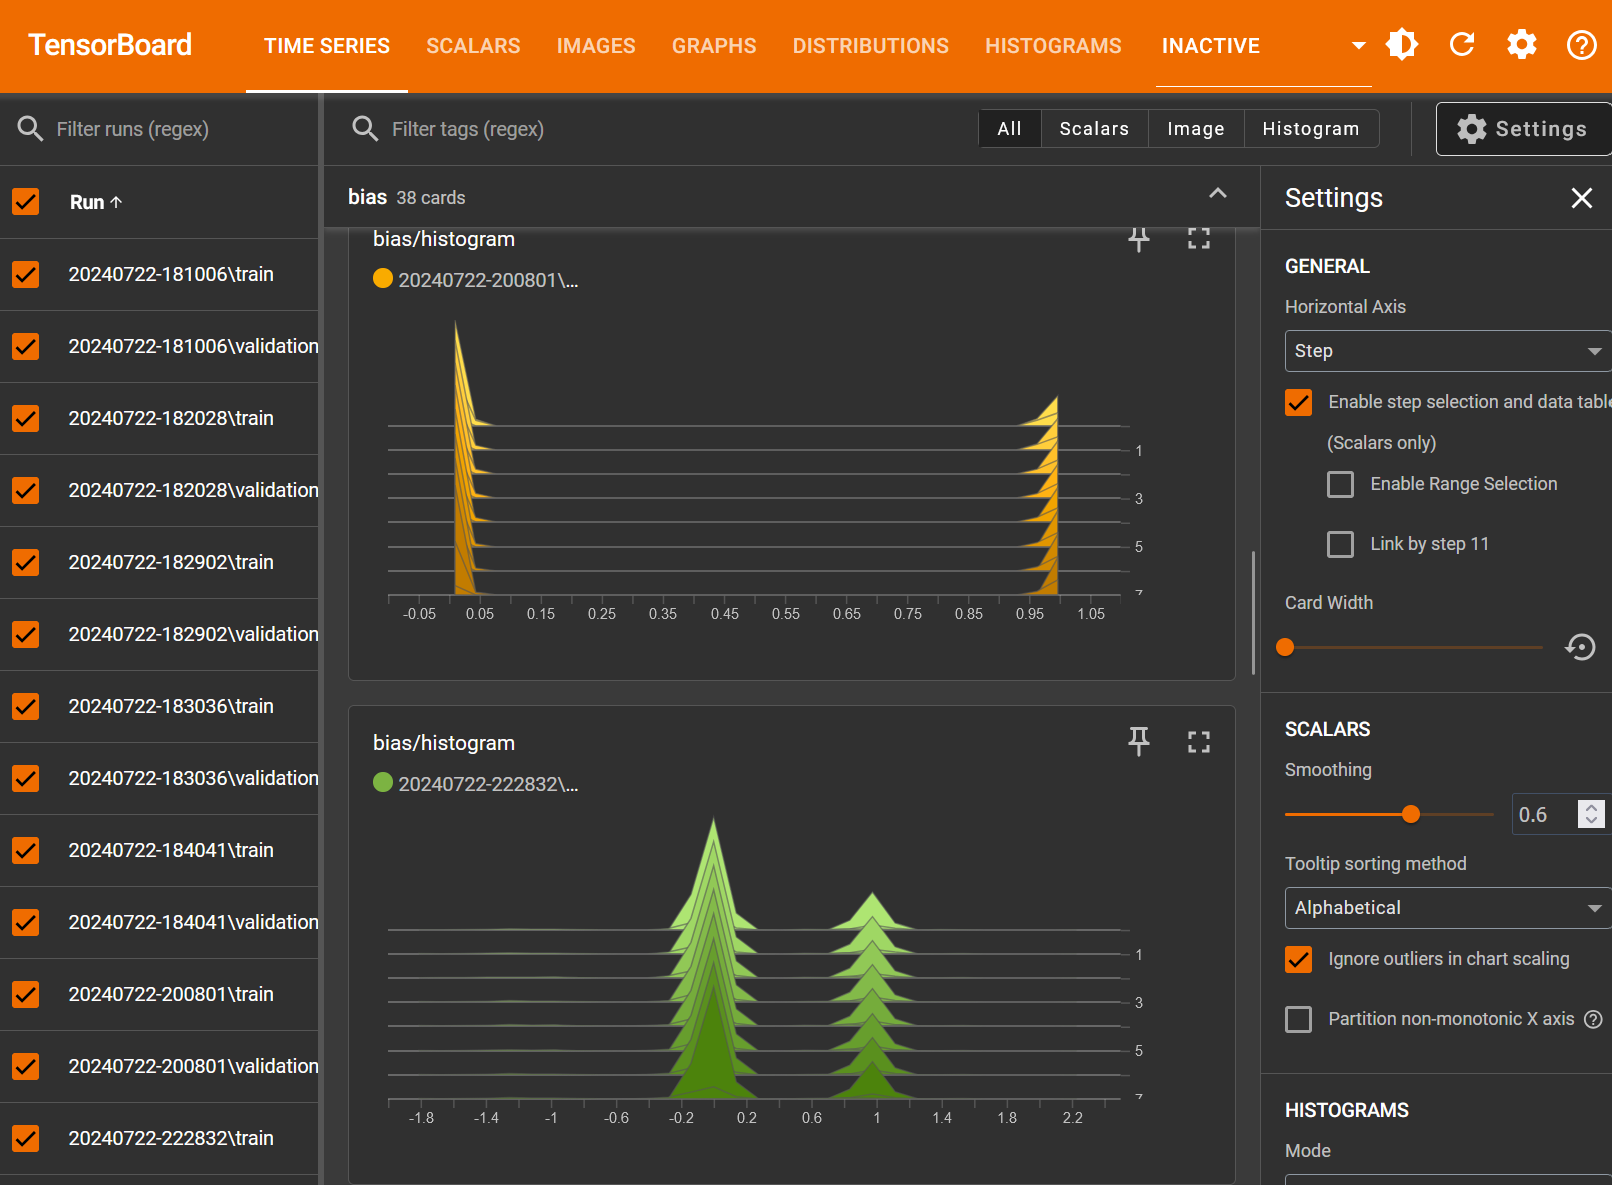

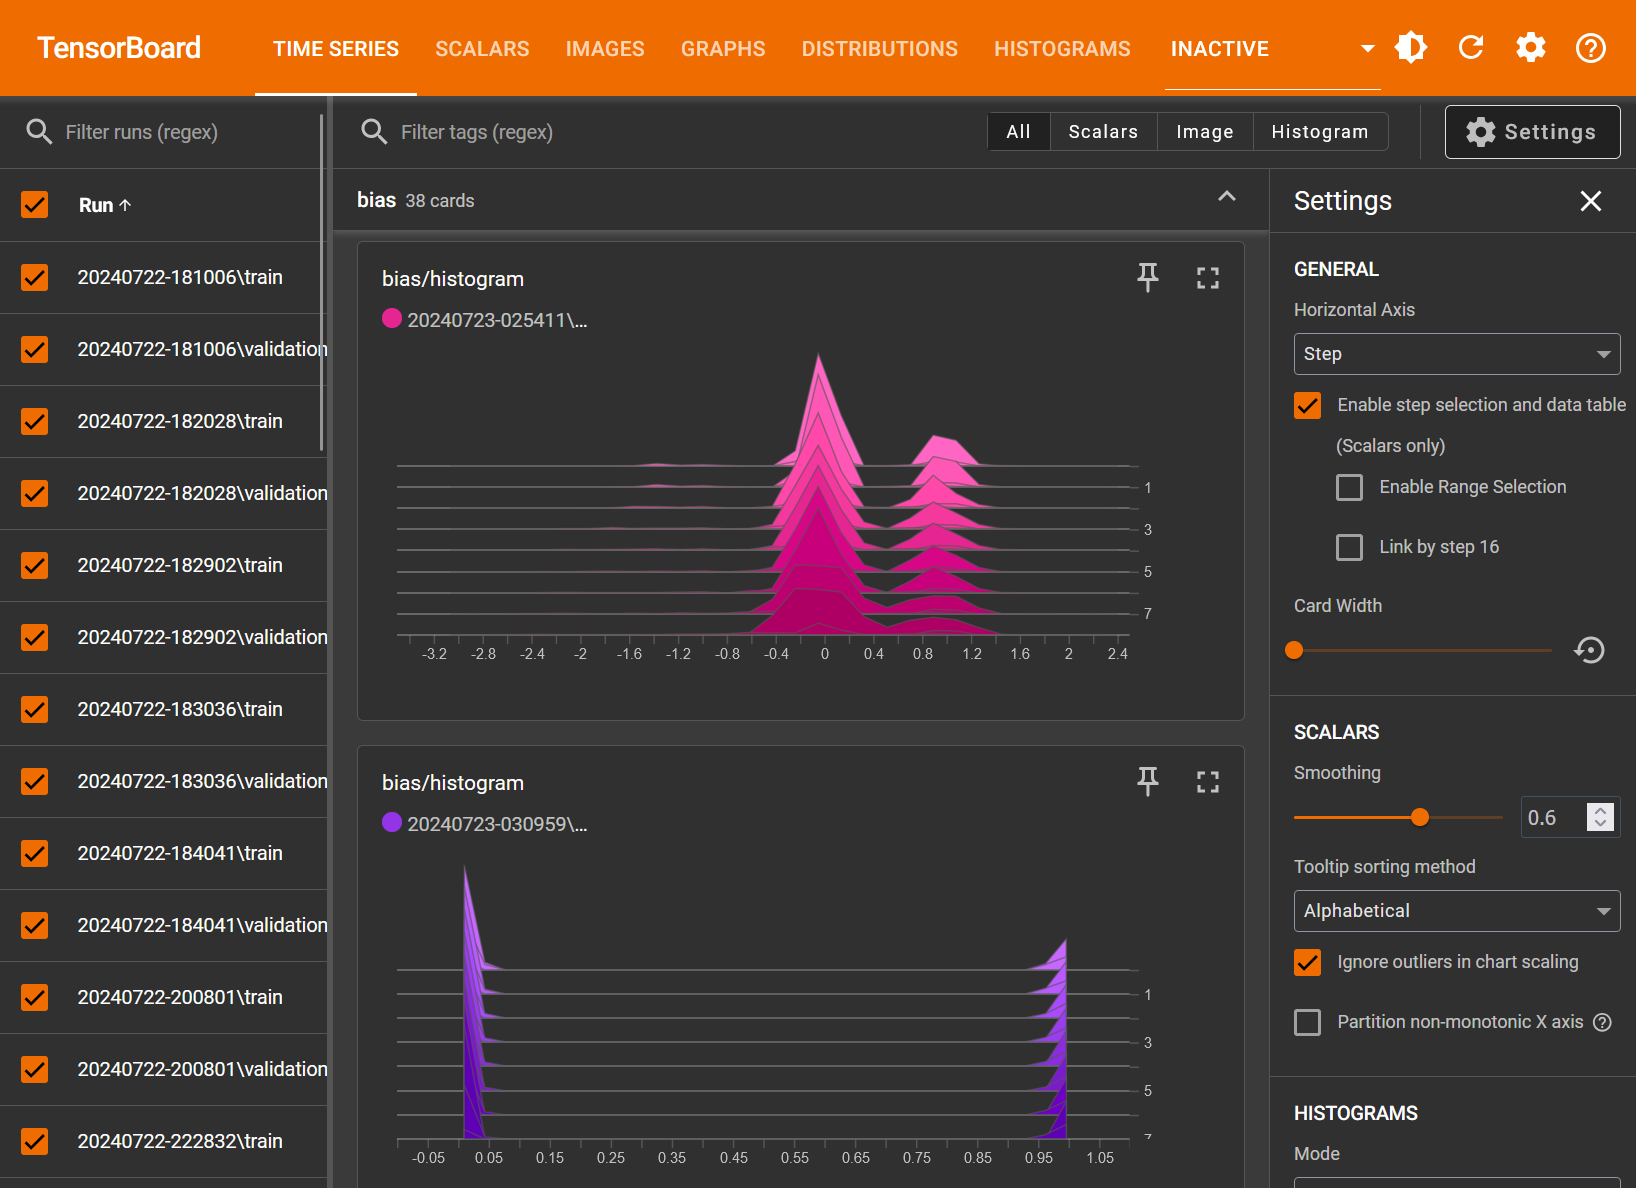

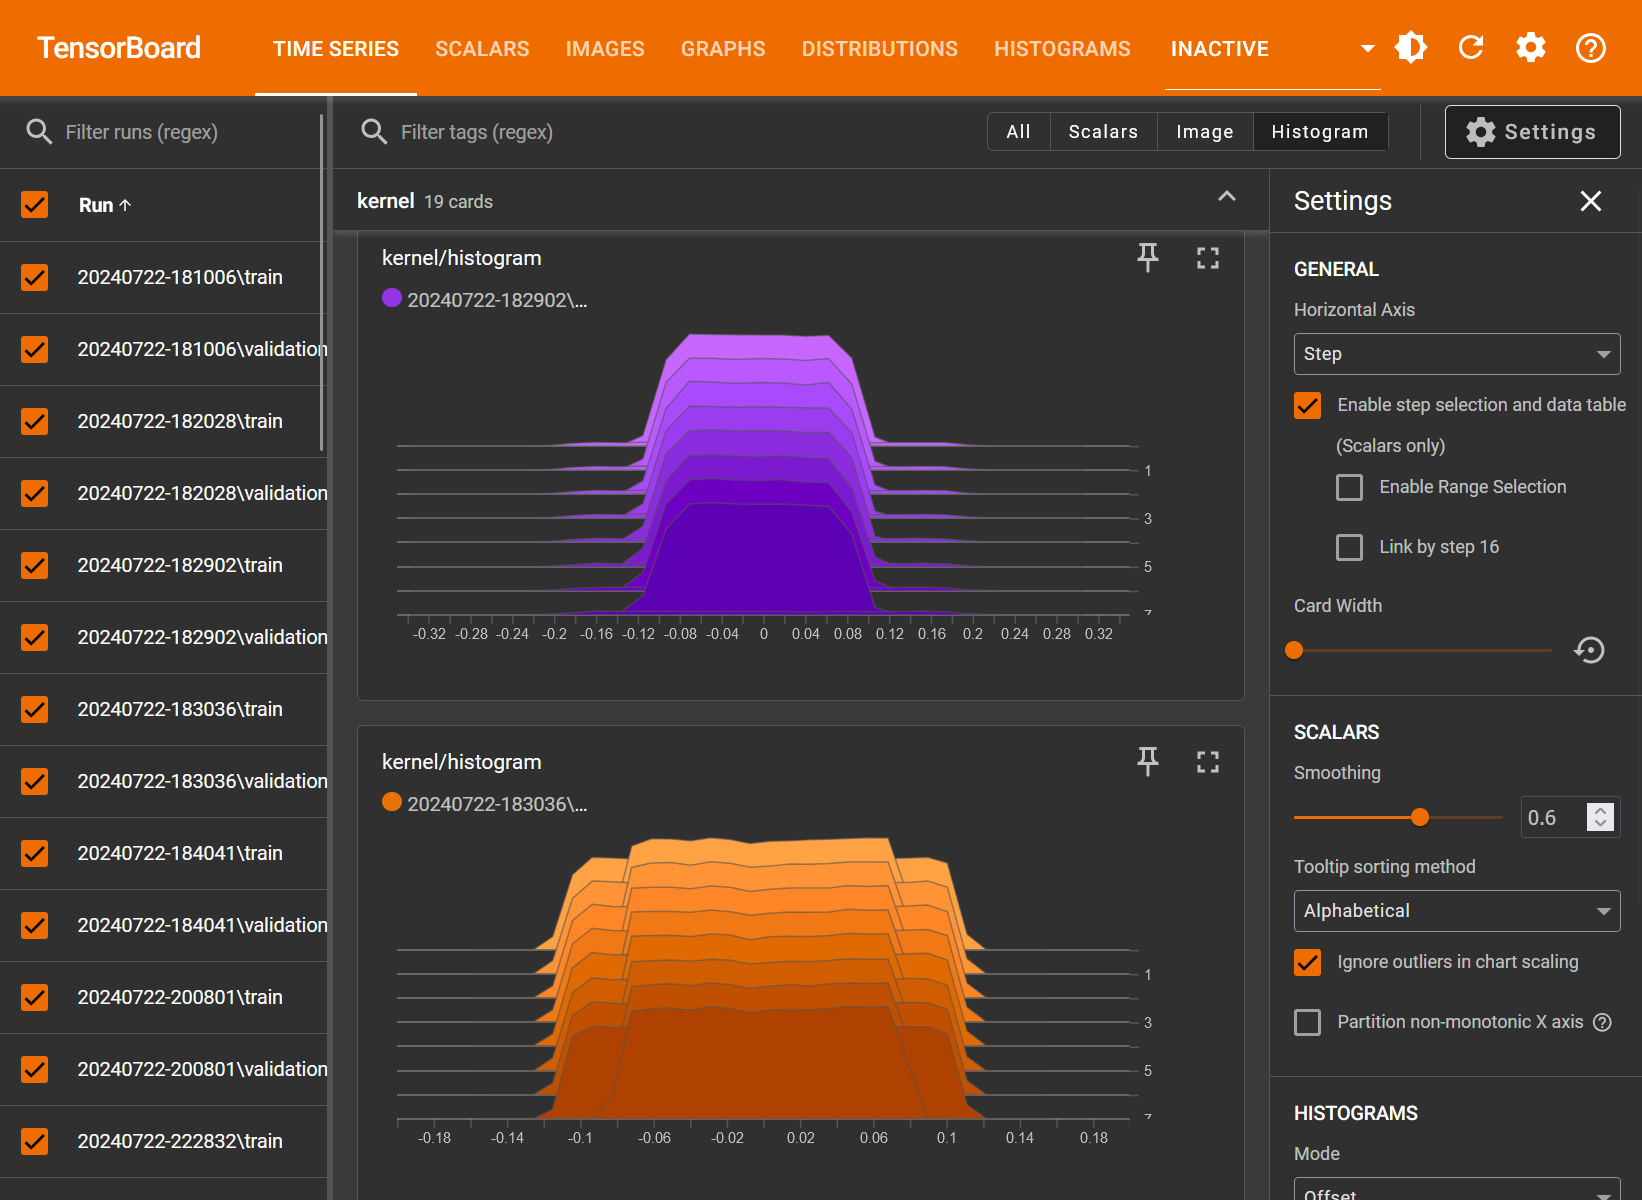

# Performance Classifiers

 To investigate the performance on the best model, we need to look at key metrics such as classification report, balanced accuracy, confusion matrix, and prediction quality using AUC. 
 
**classification report** looks at the performance of a classification model. Some of the metrics are: Precision, Recall, F1-Score, and support.

-	**Precision** is the ratio of the correctly observed predicted values, to the total predicted positives. In this instance, a higher precision tells us that there’s fewer false positives.
  
    $ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $

-	**Recall** is the opposite to precision as it’s the ratio of correctly observed predicted values, to the total predicted positives. Here, a higher recall states that there’s less false negatives.
  
    $ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $

-	**F1-Score** takes precision and recall, then performs a weighted average. Here, F1 balances the two metrics to provide a single one for evaluations on the model.
  
    $ \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $

-	**Support** shows the number of samples for reach class.

**Confusion matrix** looks at the predicted results and provides a summary portraying the true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN). True positives are the correctly predicted positive values and is displayed on the bottom right-hand side. True negatives are the correctly predicted negative values and is displayed on the top left. False positives are the wrong predicted positive values and is displayed on the top right. Finally, False negatives are the wrong predicted negative values and are displayed on the bottom left. 

**Balanced Accuracy** is another useful tool we can use which shows imbalanced datasets by taking an average of the recall from each class.

$ \text{Balanced Accuracy} = \frac{1}{2} \left( \frac{\text{TP}}{\text{TP} + \text{FN}} + \frac{\text{TN}}{\text{TN} + \text{FP}} \right) $

Finally, to understand the performance of the model at all thresholds, **Area Under the Curve (AUC)** is used. What the AUC metric demonstrates is how good the model is at predicting. A score of 0.5 indicates that the model is not much better than random guessing while a score higher shows the predictive power being stronger. **Receiver Operating Characteristic (ROC)** shows the difference between recall (true positive rate) and false positive rate. When the ROC curve is on the upper left, that shows stronger performance.


Ultimately, when viewing the metrics for the best model, the performance does not look promising. Starting with the classification report, while the precision for class 0 is high, the metric is misleading as the recall is low showing it fails to recognize most of the true class 0 values. In addition, class 0 is faced with a low F1-Score reflecting poor performance in this area. Saying this, precision, recall and F1-Score for Class 1 are high reflecting strong performance in the class. While there were specifications for class balancing in the model set up, there’s struggle with class 0 showing issues with underfitting. In addition, the AUC score shows that the behaviour of the tuned LSTM model is no better than random guessing. 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.02      0.04       212
           1       0.64      1.00      0.78       374

    accuracy                           0.64       586
   macro avg       0.72      0.51      0.41       586
weighted avg       0.70      0.64      0.51       586

Balanced Accuracy: 0.508097063868429


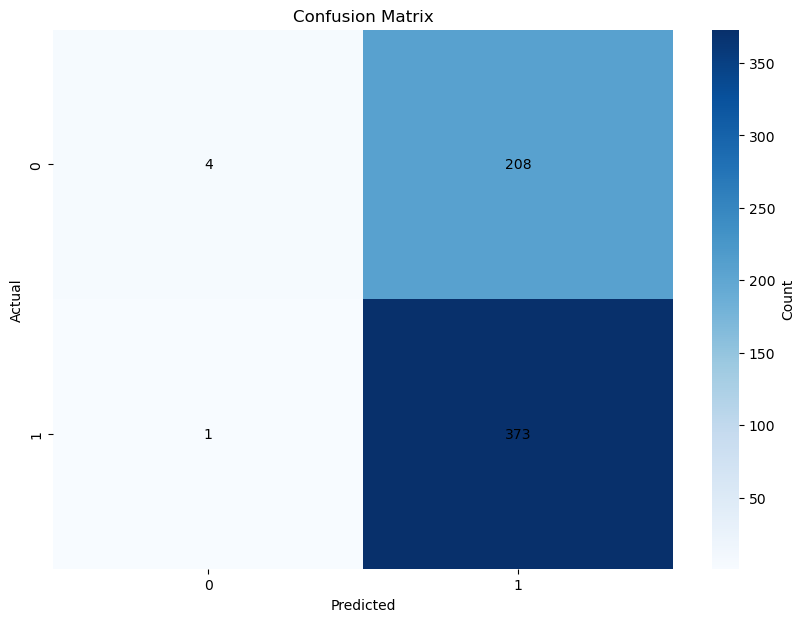

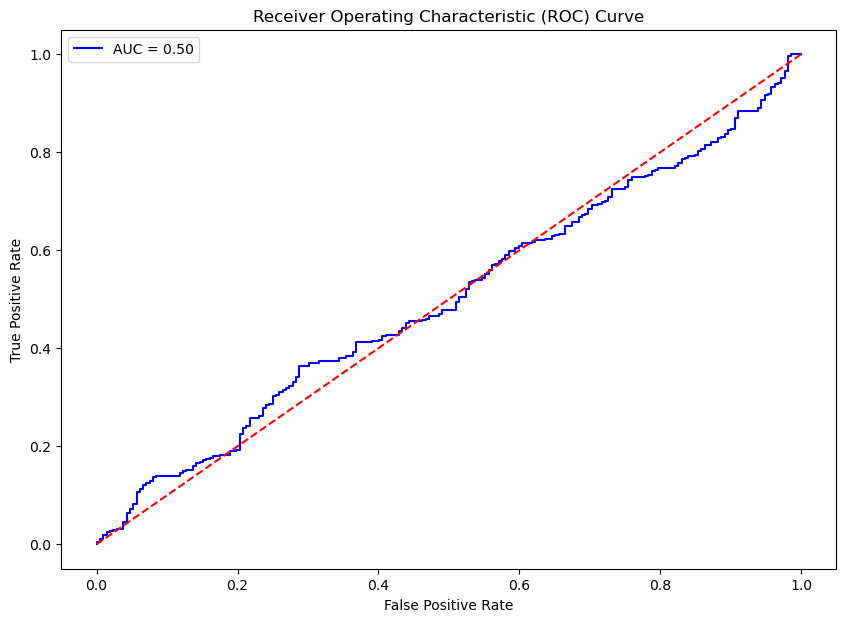

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, balanced_accuracy_score, roc_curve

best_model = tf.keras.models.load_model('best_model.h5')

# Metadata for the best model
best_model_info = sorted_comparison_df.iloc[0]
best_model_name = best_model_info['Model']
dim_reduction = best_model_info['Dimensionality Reduction']

if dim_reduction == 'UMAP':
    x_test_data = x_test_umap
    y_test_data = y_test_umap
elif dim_reduction == 'SOM':
    x_test_data = x_test_som
    y_test_data = y_test_som
elif dim_reduction == 'KMeans':
    x_test_data = x_test_kmeans
    y_test_data = y_test_kmeans
else:
    raise ValueError("Unknown dimensionality reduction technique")

# Predict the test set
y_pred_prob = best_model.predict(x_test_data, verbose=0)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate AUC
auc = roc_auc_score(y_test_data, y_pred_prob)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_data, y_pred)

# Classification Report
class_report = classification_report(y_test_data, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test_data, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=False, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'})

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', color='black', ha='center', va='center')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_data, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Backtest

For financial markets, trading strategies which provides consistent returns while managing risk are always looked for. Given the best model, the code takes the predicted target variable and uses a threshold of 0.5. Trading signals are then generated based on ‘y_pred’ which is binary. Keep in mind, the y_pred during the code set up below is different from ‘y’ used for machine learning purposes. ‘y’ was used for historical price movement thresholds in which a buy signal was created if the next day price was slightly higher than current day. This forms the basis for training the model. The new threshold of 0.5 is used to distinguish between buy or not buy classes. It’s use case is not to look at historical data, but making real time trading decisions based off the model’s output. Positions are shifted within the trading strategy by one period to ensure look-ahead bias is not included. Using packages such as Pyfolio-Reloaded, we’re able to generate a full performance report of the strategy along with key metrics such as market vs strategy returns, annual volatility, Sharpe ratio and many more. While a model may not be strong given performance classifiers, the most sought-after metric of a model is how well does it perform against the markets. The first graph shown looks at a period overtime where the returns of the model are displayed in comparison to Coca Cola stock. From a profit and loss perspective, certainly the model did well with an outperformance. What’s most surprising about this is typically to outperform in the markets, one must take more risk which at times means increasing the volatility as well. Here, the annual volatility is low. In fact, if the metric is converted to daily volatility (annual volatility / 252 trading days), there would be shifts of only ~0.06% which is very good from a risk management perspective. 

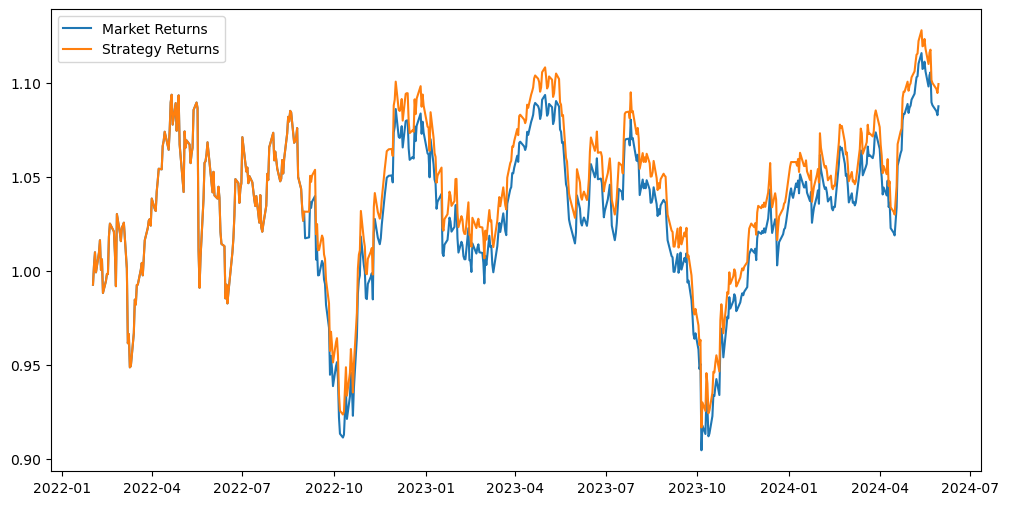

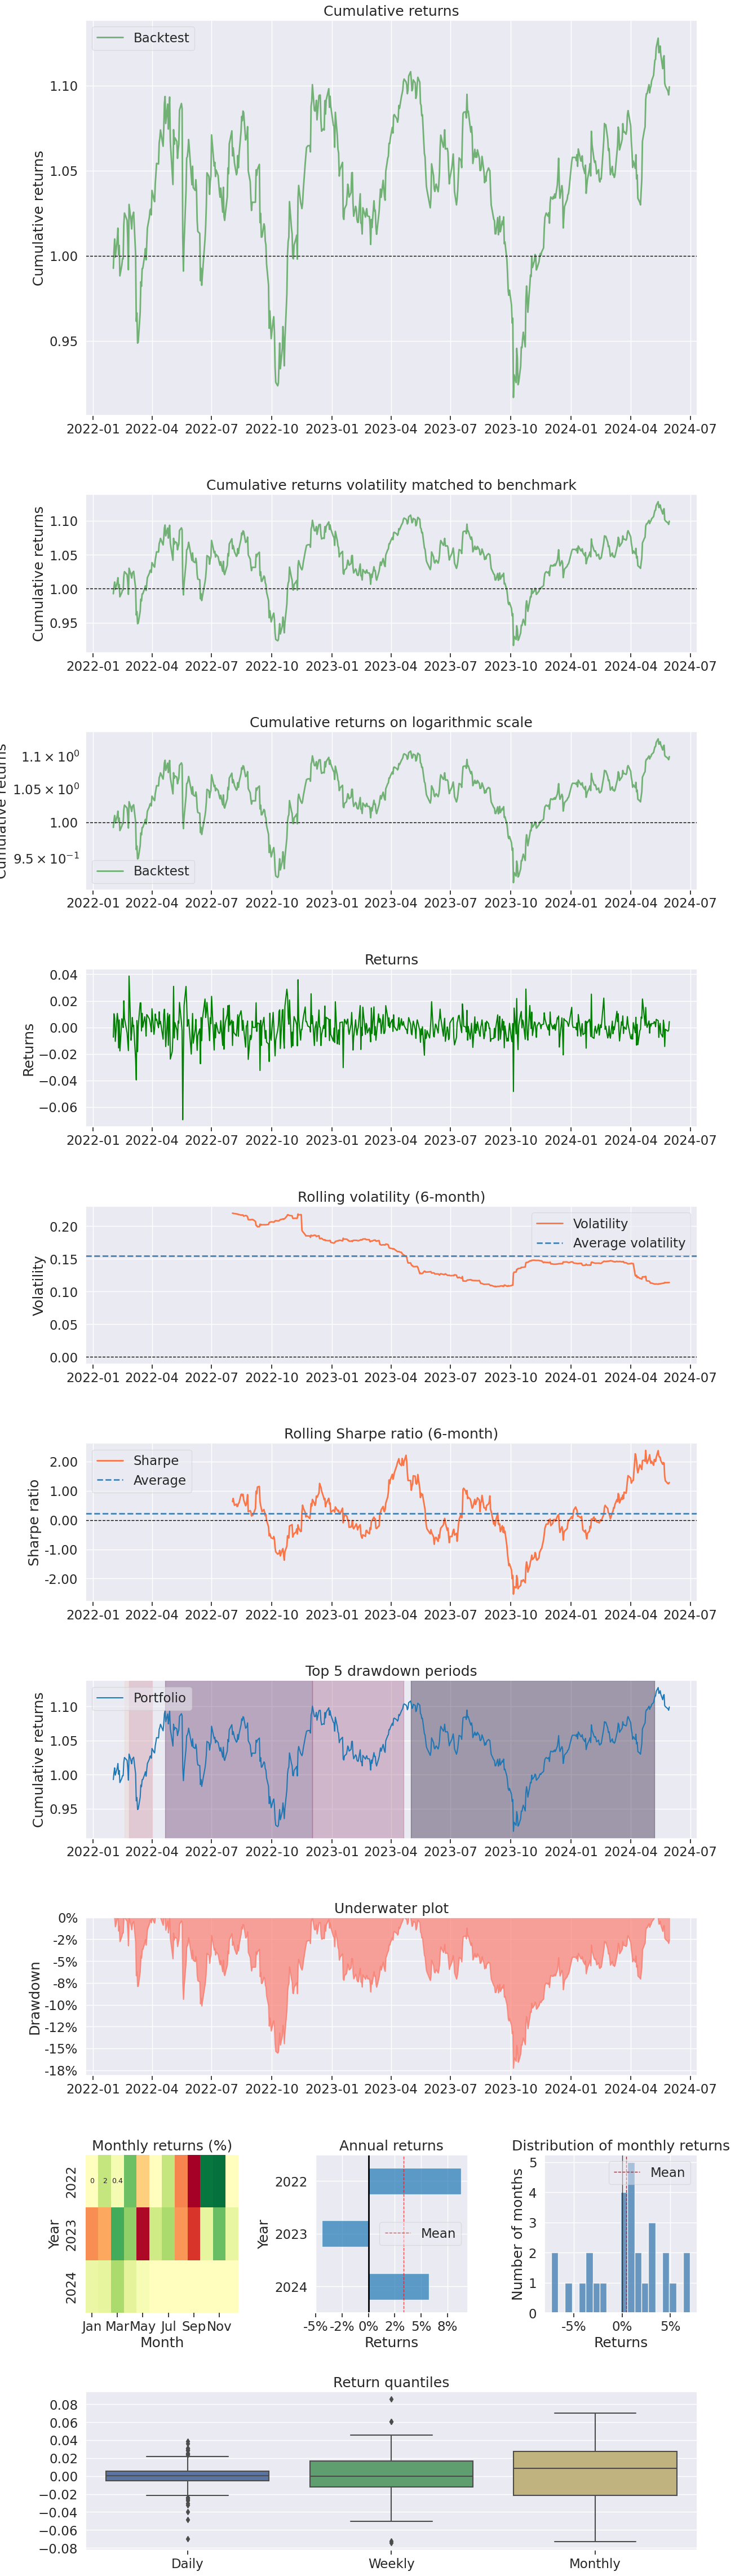

In [113]:
import pyfolio as pf
from sklearn.metrics import accuracy_score

# Step 1: Generate Trading Signals
# Get Best Model
best_model = tf.keras.models.load_model('best_model.h5')

# Predict the target variable on the test set
y_pred_prob = best_model.predict(x_test_umap, verbose=0)
y_pred = (y_pred_prob > 0.5).astype("int32")

y_pred = y_pred[:len(y_test_umap)]

# Get trading signals based on predictions
df_test = df.iloc[len(df) - len(y_test_umap):].copy()

# Adjust df_test and y_pred to have the same length
if len(df_test) != len(y_pred):
    min_len = min(len(df_test), len(y_pred))
    df_test = df_test.iloc[-min_len:]
    y_pred = y_pred[-min_len:]

df_test['signal'] = y_pred

# Step 2: Create a Trading Strategy Based on the Signals
def create_strategy(df, signal_col, price_col='Adj Close'):
    df['positions'] = df[signal_col].shift()
    df['returns'] = df[price_col].pct_change()
    df['strategy_returns'] = df['returns'] * df['positions']
    return df

# Apply the trading strategy to the test set
df_test = create_strategy(df_test, 'signal')

# Step 3: Backtest the Strategy
# Calculate cumulative returns for both the strategy and the market
df_test['cumulative_returns'] = (1 + df_test['returns']).cumprod()
df_test['cumulative_strategy_returns'] = (1 + df_test['strategy_returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df_test['cumulative_returns'], label='Market Returns')
plt.plot(df_test['cumulative_strategy_returns'], label='Strategy Returns')
plt.legend()
plt.show()

# Step 4: Evaluate the Strategy using pyfolio-reloaded
# Calculate returns for pyfolio
strategy_returns = df_test['strategy_returns'].dropna()

# Ensure strategy_returns has the correct datetime index
strategy_returns.index = df_test.loc[strategy_returns.index].index

# Create a tear sheet to evaluate the performance
pf.create_full_tear_sheet(strategy_returns)


# Conclusion

The focus on this paper was to understand and implement Long Short-Term Memory Network to predict upward price movements of an underlying asset. At the beginning of the project, we created Bloomberg defined technical analytics and leveraged both Bloomberg API and Yahoo Finance packages to bring in additional data. After, we underwent Exploratory Data Analysis (EDA) to understand the structure and relationship of the dataset. This was an integral standpoint as depending on the relationship found, appropriate dimensional reduction techniques would need to be deployed. Given the relationship was non-linear, it was understood methods such as Principal Component Analysis (PCA) would not be appropriate and thus SOM, UMAP and K-Means Clustering were used instead. Finally, multiple LSTM architectures were created and studied after exhaustive research. These models were tested based on the three-dimensional reduction techniques and had hyperparameter tuning applied. 

While modelling is important, inspection on how well the model performed is also integral. To observe the underlying behavior, Tensorboard, performance classifiers and a backtest was performed. While the backtest did show outperformance against the market, Tensorboard and performance classifiers proved that the LSTM model was not consistent or accurate enough. Further, AUC scores demonstrated that the accuracy was equivalent to flipping a coin as the score was near 0.5. 

Some causes for lackluster results could be stemmed from balancing of data and hardware used for running these models. While in the first segment of the paper we defined and utilized a definition function for balancing data, the classification report and confusion matrix both showed strong biased towards ‘1’ class. In future iterations of deep learning, many diverse balancing measures should be used and practiced to find stronger results. Additionally, using modern GPU driven hardware would provide more accurate results as epochs can be increased dramatically while also adding more hyperparameters. This would result in finding a more optimal model that may behave more consistently. After extensive research, it is to my belief that LSTM modelling could result in asset trajectory predictions. While this is not easy to implement in a production level manner, applying the technique for securities which have consistently low volatility may be best and easiest to find market exploitations. 

# References

1. Kohonen, T. (1982). Self-organized formation of topologically correct feature maps. *Biological Cybernetics* [SpringerLink](https://link.springer.com/article/10.1007/BF00337288)

2. McInnes, L., Healy, J., & Melville, J. (2018). UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction. [arXiv](https://arxiv.org/abs/1802.03426)

3. MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. In *Proceedings of the fifth Berkeley symposium on mathematical statistics and probability* [Project Euclid](https://projecteuclid.org/euclid.bsmsp/1200512992)

4. Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. *Neural Computation* [MIT Press Journals](https://www.mitpressjournals.org/doi/abs/10.1162/neco.1997.9.8.1735)

5. Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. *Journal of Machine Learning Research* [JMLR](http://jmlr.org/papers/v13/bergstra12a.html)

6. Li, L., Jamieson, K., DeSalvo, G., Rostamizadeh, A., & Talwalkar, A. (2018). Hyperband: A novel bandit-based approach to hyperparameter optimization. *Journal of Machine Learning Research* [JMLR](http://jmlr.org/papers/v18/16-558.html)

7. Snoek, J., Larochelle, H., & Adams, R. P. (2012). Practical Bayesian optimization of machine learning algorithms. In *Advances in neural information processing systems* [NeurIPS Proceedings](https://proceedings.neurips.cc/paper/2012/file/05311655a15b75fab86956663e1819cd-Paper.pdf)

8. TensorFlow Team. (2016). TensorBoard: Visualizing Learning. *TensorFlow*. [TensorFlow](https://www.tensorflow.org/tensorboard)

9. Fama, E. F., & French, K. R. (1993). Common risk factors in the returns on stocks and bonds. *Journal of Financial Economics* [Dartmouth Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)